In [1]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, power_transform
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data =pd.read_csv('Global.csv')
data

country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Solar         NaN         NaN   
1           98.0   24.7663    74.6090         Coal         NaN         NaN   
2           39.2   21.9038    69.3732         Wind         NaN         NaN   
3          135.0   23.8712    91.3602          Gas         NaN         NaN   
4         1800.0   21.9603    82.4091         Coal         Oil         NaN   
..           ...       ...        ...          ...         ...         ...   
902       1600.0   16.2949    77.3568         Coal         Oil         NaN   
903          3.0   12.8932    78.1654        Solar         NaN         NaN   
904         25.5   15.2758    75.5811         Wind         NaN         NaN   
905         80.0   24.3500    73.7477         Coal         NaN         NaN   
906         16.5    9.9344    77.4768         Wind         NaN         NaN   

     ...  year_of_capacity_data  generation_gwh_2013 generation_gwh_2014  \
0    ...                    NaN                  NaN                 NaN   
1    ...                    NaN                  NaN                 NaN   
2    ...                    NaN                  NaN                 NaN   
3    ...                 2019.0                  NaN          617.789264   
4    ...                 2019.0                  NaN         3035.550000   
..   ...                    ...                  ...                 ...   
902  ...                 2019.0                  NaN                 NaN   
903  ...                    NaN                  NaN                 NaN   
904  ...                    NaN                  NaN                 NaN   
905  ...                    NaN                  NaN                 NaN   
906  ...                    NaN                  NaN                 NaN   

    generation_gwh_2015 generation_gwh_2016 generation_gwh_2017  \
0                   NaN                 NaN                 NaN   
1                   NaN                 NaN                 NaN   
2                   NaN                 NaN                 NaN   
3            843.747000          886.004428          663.774500   
4           5916.370000         6243.000000         5385.579736   
..                  ...                 ...                 ...   
902            0.994875          233.596650          865.400000   
903                 NaN                 NaN                 NaN   
904                 NaN                 NaN                 NaN   
905                 NaN                 NaN                 NaN   
906                 NaN                 NaN                 NaN   

     generation_gwh_2018  generation_gwh_2019         generation_data_source  \
0                    NaN                  NaN                            NaN   
1                    NaN                  NaN                            NaN   
2                    NaN                  NaN                            NaN   
3             626.239128                  NaN  Central Electricity Authority   
4            7279.000000                  NaN  Central Electricity Authority   
..                   ...    

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   907 non-null    object 
 1   country_long              907 non-null    object 
 2   name                      907 non-null    object 
 3   gppd_idnr                 907 non-null    object 
 4   capacity_mw               907 non-null    float64
 5   latitude                  861 non-null    float64
 6   longitude                 861 non-null    float64
 7   primary_fuel              907 non-null    object 
 8   other_fuel1               198 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        527 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    907 non-null    object 
 14  url       

Documentation:- 

1. Here I can see that there are few columns having object dtypes and few columns are having float64
2. Here I can clearly see that there are null values present over here.

## Statistical Analysis of the data:

In [4]:
data.describe()

capacity_mw    latitude   longitude  other_fuel3  commissioning_year  \
count   907.000000  861.000000  861.000000          0.0          527.000000   
mean    326.223755   21.197918   77.464907          NaN         1997.091082   
std     590.085456    6.239612    4.939316          NaN           17.082868   
min       0.000000    8.168900   68.644700          NaN         1927.000000   
25%      16.725000   16.773900   74.256200          NaN         1988.000000   
50%      59.200000   21.780000   76.719500          NaN         2001.000000   
75%     385.250000   25.512400   79.440800          NaN         2012.000000   
max    4760.000000   34.649000   95.408000          NaN         2018.000000   

       wepp_id  year_of_capacity_data  generation_gwh_2013  \
count      0.0                  519.0                  0.0   
mean       NaN                 2019.0                  NaN   
std        NaN                    0.0                  NaN   
min        NaN                 2019.0                  NaN   
25%        NaN                 2019.0                  NaN   
50%        NaN                 2019.0                  NaN   
75%        NaN                 2019.0                  NaN   
max        NaN                 2019.0                  NaN   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           398.000000           422.000000           434.000000   
mean           2431.823590          2428.226946          2467.936859   
std            4026.440035          4194.596959          4162.884308   
min               0.000000             0.000000             0.000000   
25%             223.557672           176.381063           188.285252   
50%             801.123775           711.181225           737.205450   
75%            3035.306250          3084.121250          3282.861313   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  generation_gwh_2019  \
count           440.000000           448.000000                  0.0   
mean           2547.759305          2600.804099                  NaN   
std            4196.991169          4314.880456                  NaN   
min               0.000000             0.000000                  NaN   
25%             177.874930           193.378250                  NaN   
50%             817.977250           751.644375                  NaN   
75%            3275.690475          3143.535900                  NaN   
max           35116.000000         35136.000000                  NaN   

       estimated_generation_gwh  
count                       0.0  
mean                        NaN  
std                         NaN  
min                         NaN  
25%                         NaN  
50%                         NaN  
75%                         NaN  
max                         NaN

Documentation :-

1. Here I can see in count, that there are few data missing in each columns and also some columns are having null values.
2. Here I can see in some columns std is more then mean data.

In [5]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [6]:
data = data.drop(columns = ['other_fuel1','other_fuel2','other_fuel3','owner','country_long','country','wepp_id',
                           'estimated_generation_gwh','name','url','gppd_idnr','generation_gwh_2019','generation_gwh_2013'])

Dropping the unrequired columns

In [7]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'year_of_capacity_data', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_data_source'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   capacity_mw             907 non-null    float64
 1   latitude                861 non-null    float64
 2   longitude               861 non-null    float64
 3   primary_fuel            907 non-null    object 
 4   commissioning_year      527 non-null    float64
 5   source                  907 non-null    object 
 6   geolocation_source      888 non-null    object 
 7   year_of_capacity_data   519 non-null    float64
 8   generation_gwh_2014     398 non-null    float64
 9   generation_gwh_2015     422 non-null    float64
 10  generation_gwh_2016     434 non-null    float64
 11  generation_gwh_2017     440 non-null    float64
 12  generation_gwh_2018     448 non-null    float64
 13  generation_data_source  449 non-null    object 
dtypes: float64(10), object(4)
memory usage: 99

In [9]:
data.isnull().sum()

capacity_mw                 0
latitude                   46
longitude                  46
primary_fuel                0
commissioning_year        380
source                      0
geolocation_source         19
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

Checking the null values again.

### Using Iterative Imputer:

Due to more number of null values, I have used iterative imputer on continuous columns 

In [10]:
imputer = IterativeImputer()
data[['latitude', 'longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','commissioning_year','year_of_capacity_data','generation_gwh_2018']] = imputer.fit_transform(data[['latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','commissioning_year','year_of_capacity_data','generation_gwh_2018']])

In [11]:
data.describe()

capacity_mw    latitude   longitude  commissioning_year  \
count   907.000000  907.000000  907.000000          907.000000   
mean    326.223755   21.194946   77.464986         1997.090561   
std     590.085456    6.079239    4.812413           13.016360   
min       0.000000    8.168900   68.644700         1927.000000   
25%      16.725000   17.072000   74.388900         1997.088224   
50%      59.200000   21.302700   76.979200         1997.089807   
75%     385.250000   25.176450   79.206100         2003.000000   
max    4760.000000   34.649000   95.408000         2018.000000   

       year_of_capacity_data  generation_gwh_2014  generation_gwh_2015  \
count                  907.0           907.000000           907.000000   
mean                  2019.0          2212.554416          2313.541746   
std                      0.0          2712.390323          2889.398966   
min                   2019.0          -567.806645          -372.615942   
25%                   2019.0           634.702665           664.038125   
50%                   2019.0          2212.512567          2313.537360   
75%                   2019.0          2213.043995          2313.724098   
max                   2019.0         28127.000000         30539.000000   

       generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  
count           907.000000           907.000000           907.000000  
mean           2394.975514          2497.620994          2594.673067  
std            2891.180028          2931.621376          3031.848413  
min               0.000000             0.000000             0.000000  
25%             703.619225           804.900275           810.733240  
50%            2394.755961          2497.096910          2594.322822  
75%            2395.051676          2497.713676          2594.727663  
max           30015.000000         35116.000000         35136.000000

Documentation :-
1. Here I can see in count all the missing values are filles with the help of Iterative Imputer

### Using LabelEncoder :

Used LabelEncoder for tranforming categorical columns into numerical columns:

In [12]:
Encoder = LabelEncoder()
data['source'] = Encoder.fit_transform(data['source'])
data['primary_fuel'] = Encoder.fit_transform(data['primary_fuel'])
data['geolocation_source'] = Encoder.fit_transform(data['geolocation_source'])
data['generation_data_source'] = Encoder.fit_transform(data['generation_data_source'])

Now, I'm using Iterative Imputer on the same.

In [13]:
cat_impute = IterativeImputer(initial_strategy = 'most_frequent')
data[['primary_fuel','source','geolocation_source','generation_data_source']] = cat_impute.fit_transform(data[['primary_fuel','source','geolocation_source','generation_data_source']])

Having a look in our data :

In [14]:
data

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407           6.0         2011.000000   
1           98.0   24.7663    74.6090           1.0         1997.090003   
2           39.2   21.9038    69.3732           7.0         1997.088306   
3          135.0   23.8712    91.3602           2.0         2004.000000   
4         1800.0   21.9603    82.4091           1.0         2015.000000   
..           ...       ...        ...           ...                 ...   
902       1600.0   16.2949    77.3568           1.0         2016.000000   
903          3.0   12.8932    78.1654           6.0         1997.090167   
904         25.5   15.2758    75.5811           7.0         1997.089601   
905         80.0   24.3500    73.7477           1.0         1997.089728   
906         16.5    9.9344    77.4768           7.0         1997.089759   

     source  geolocation_source  year_of_capacity_data  generation_gwh_2014  \
0     109.0                 1.0                 2019.0          2210.048831   
1     174.0                 2.0                 2019.0          2212.826566   
2      21.0                 2.0                 2019.0          2213.089546   
3      22.0                 2.0                 2019.0           617.789264   
4      22.0                 2.0                 2019.0          3035.550000   
..      ...                 ...                    ...                  ...   
902    22.0                 2.0                 2019.0           134.190337   
903    77.0                 0.0                 2019.0          2212.301373   
904    21.0                 2.0                 2019.0          2212.526373   
905    59.0                 2.0                 2019.0          2212.871196   
906    21.0                 2.0                 2019.0          2212.271191   

     generation_gwh_2015  generation_gwh_2016  generation_gwh_2017  \
0            2313.913869          2398.768784          2503.893113   
1            2313.645184          2394.835496          2497.677403   
2            2313.792701          2394.686900          2497.052518   
3             843.747000           886.004428           663.774500   
4            5916.370000          6243.000000          5385.579736   
..                   ...                  ...                  ...   
902             0.994875           233.596650           865.400000   
903          2313.483035          2395.095061          2497.032336   
904          2313.572863          2394.978142          2497.017687   
905          2313.669696          2394.810425          2497.578833   
906          2313.490858          2395.105165          2496.750271   

     generation_gwh_2018  generation_data_source  
0            2601.690646                     1.0  
1            2594.622723                     1.0  
2            2594.192311                     1.0  
3             626.239128                     0.0  
4            7279.000000                     0.0  
..                   ...                     ...  
902           686.500000                     0.0  
903          2594.418517                     1.0  
904          2594.342473                     1.0  
905          2594.553881                     1.0  
906          2594.269108                     1.0  

[907 rows x 14 columns]

In [15]:
data.isnull().sum()

capacity_mw               0
latitude                  0
longitude                 0
primary_fuel              0
commissioning_year        0
source                    0
geolocation_source        0
year_of_capacity_data     0
generation_gwh_2014       0
generation_gwh_2015       0
generation_gwh_2016       0
generation_gwh_2017       0
generation_gwh_2018       0
generation_data_source    0
dtype: int64

Documentation :
    
1. Here I can see that all the null values have been treated and now I can proceed with our model building.

### Plotting heatmap for null-values:

<AxesSubplot:>

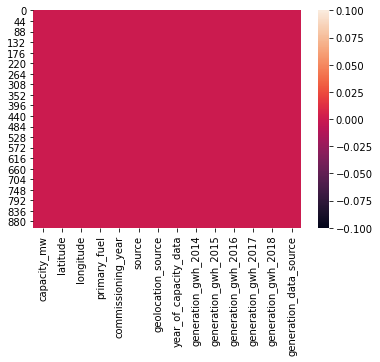

In [16]:
sns.heatmap(data.isnull())

Here no null-vales can be seen even in the heatmap :

## Visualization:
### Univariate Analysis:

#### Capacity_mw:

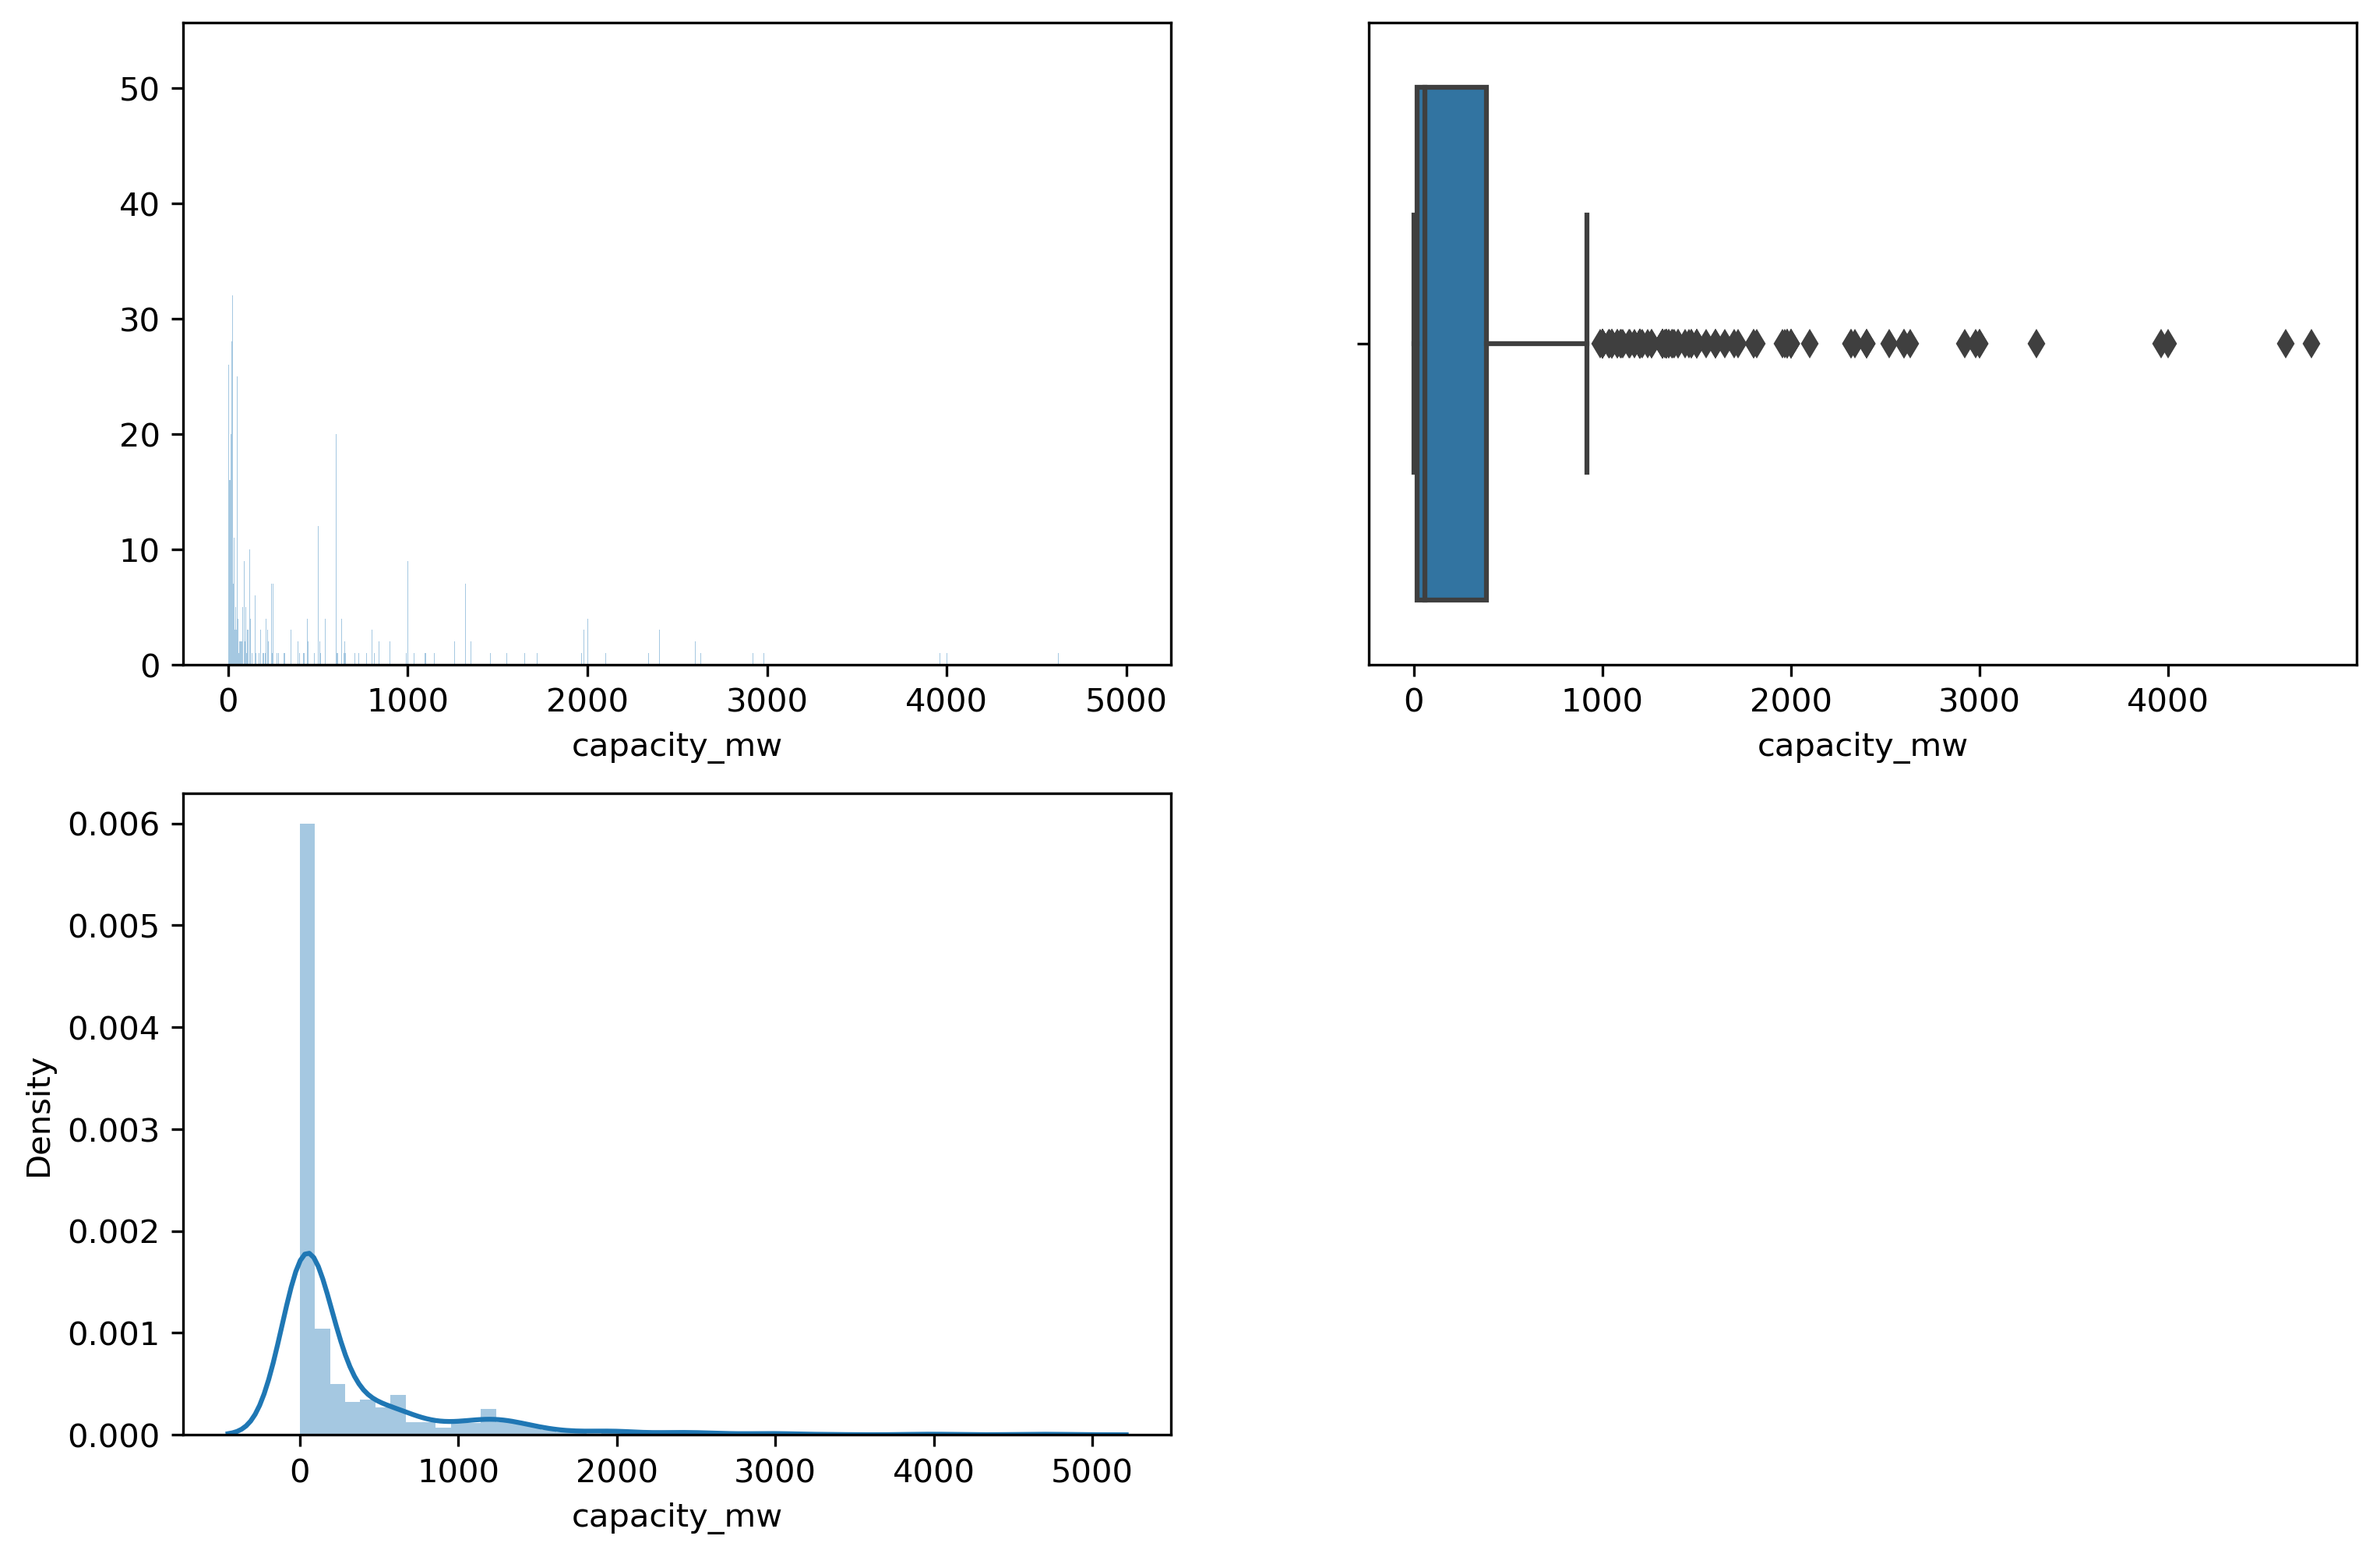

In [17]:
plt.figure(figsize=(12,8),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['capacity_mw'], kde=False, bins=range(0,5000,2));
plt.subplot(2,2,2)
sns.boxplot(data['capacity_mw']);
plt.subplot(2,2,3)
sns.distplot(data['capacity_mw']);

Here I can see that the boxplot has many outliers and the distribution curve also has skewness present and it is skewed towards Right

#### Latitude:

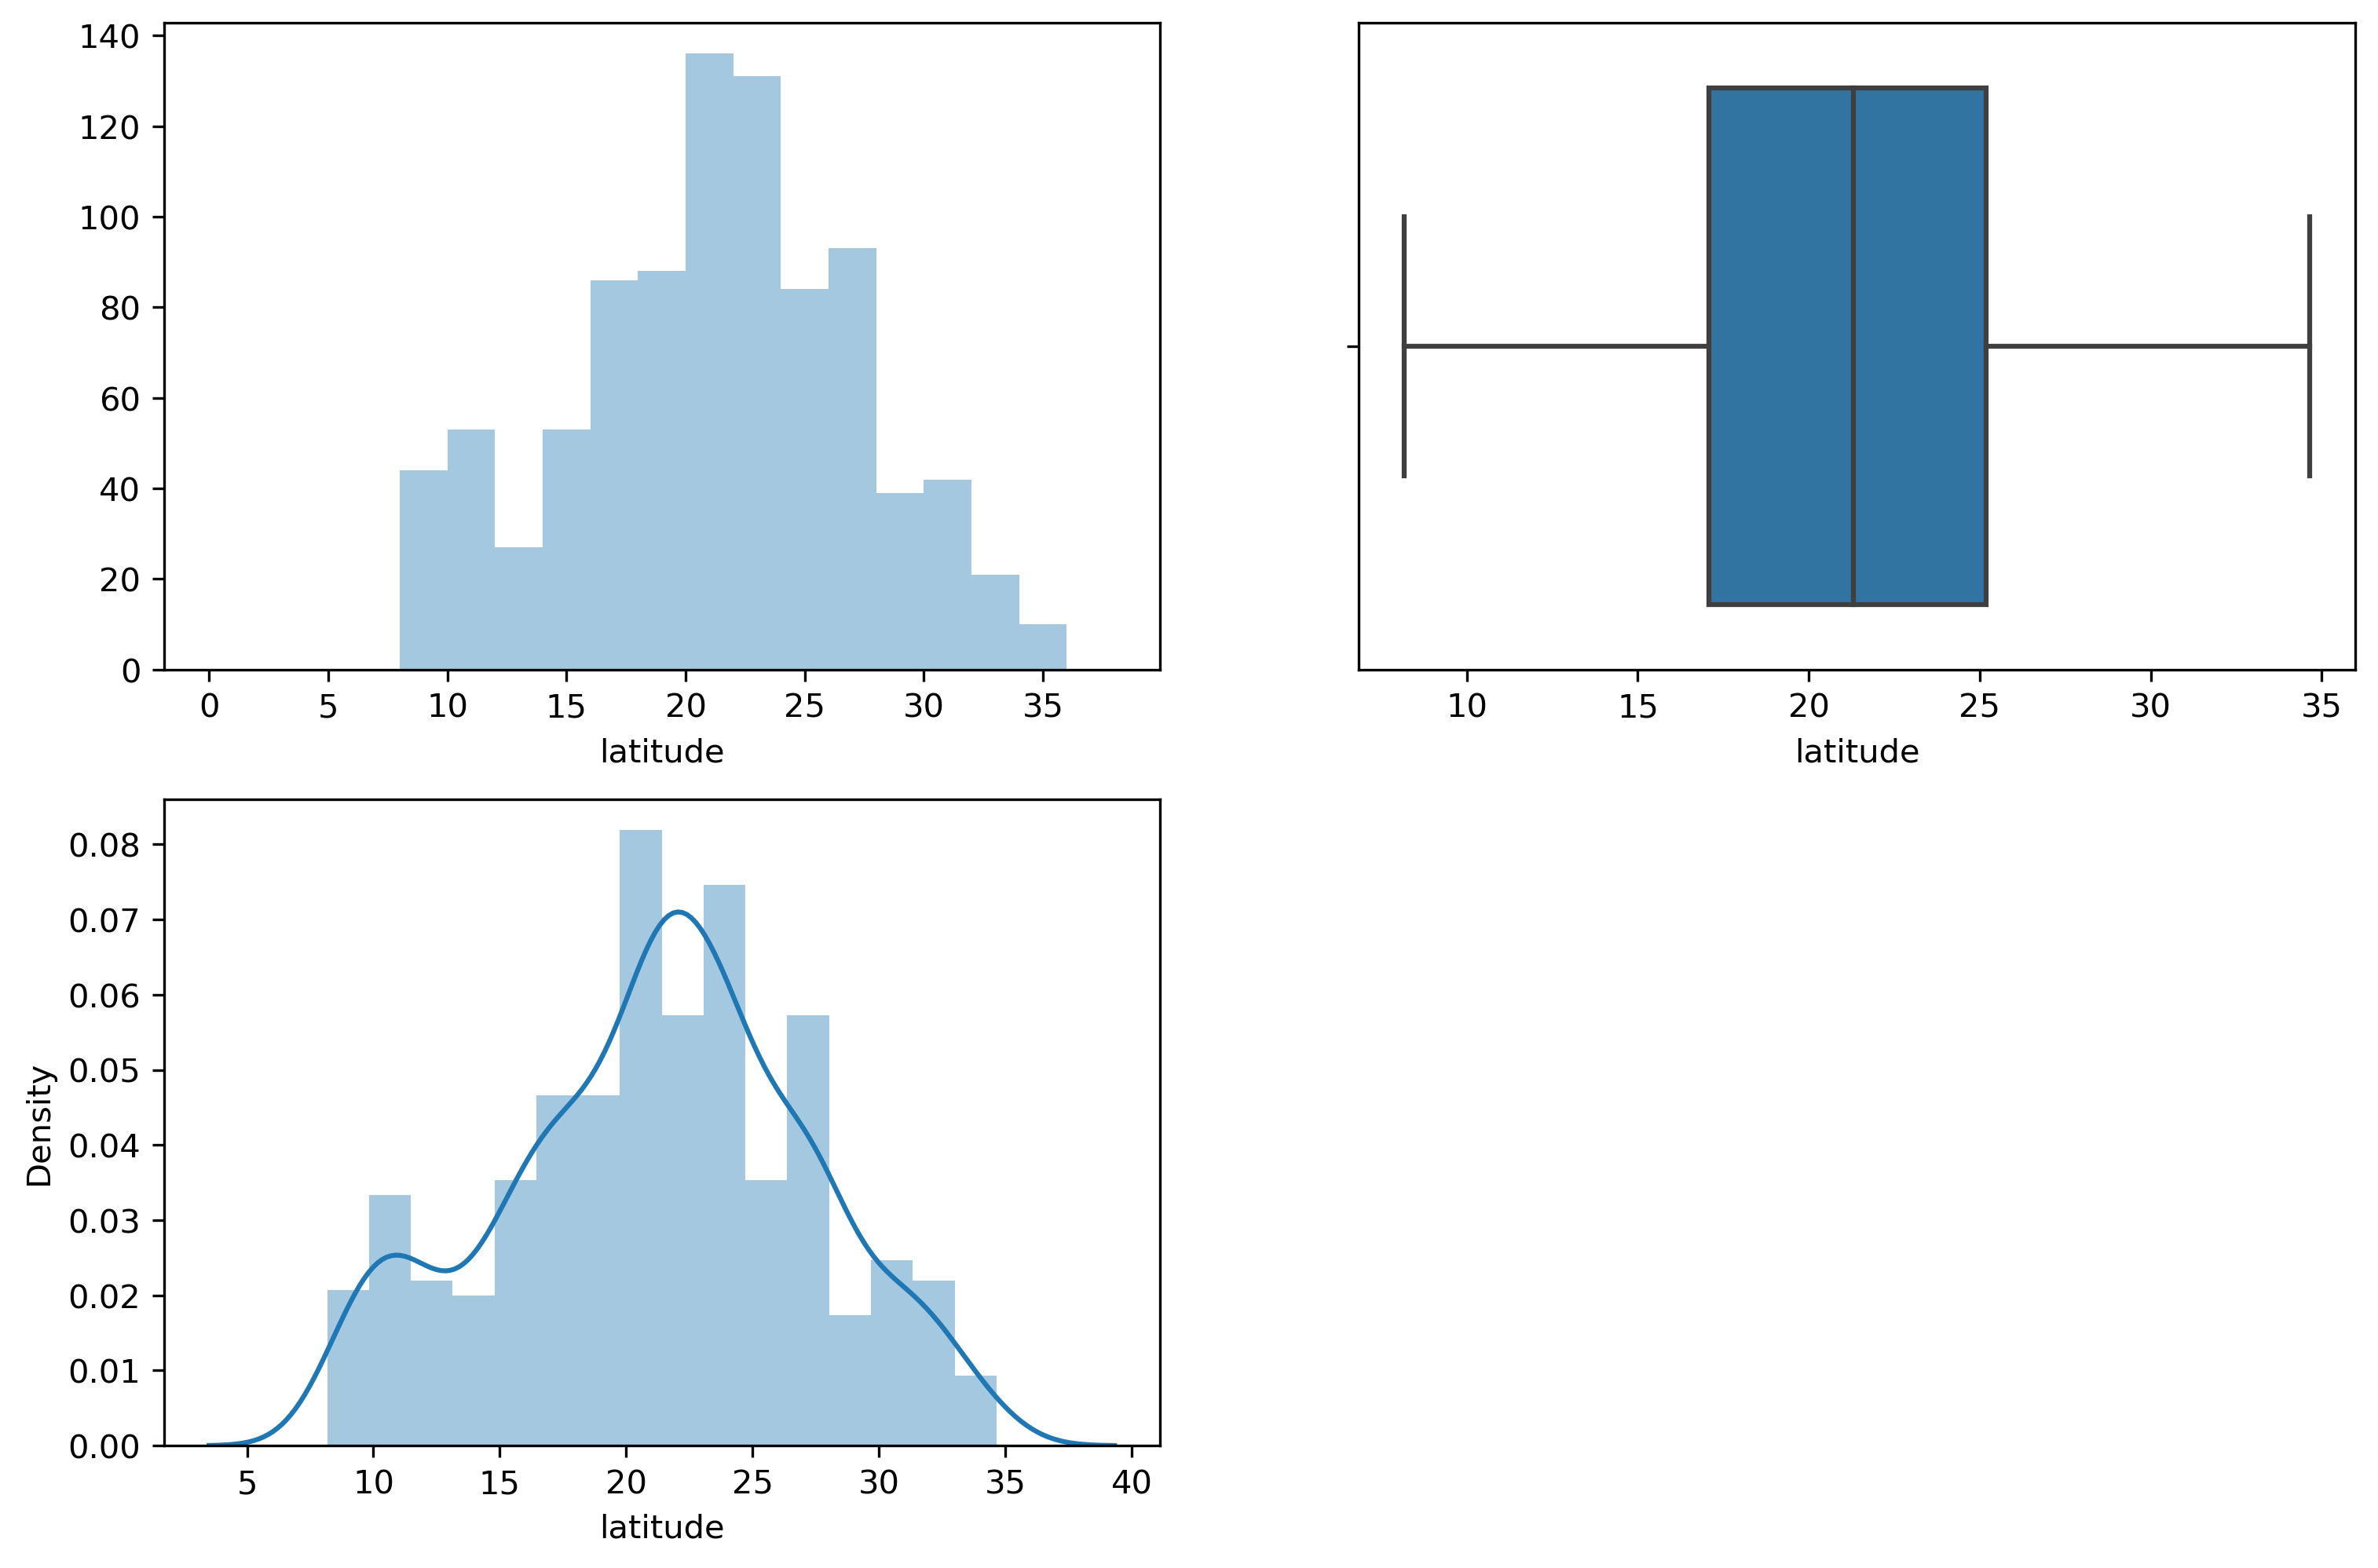

In [18]:
plt.figure(figsize=(12,8),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['latitude'], kde=False, bins=range(0,40,2));
plt.subplot(2,2,2)
sns.boxplot(data['latitude']);
plt.subplot(2,2,3)
sns.distplot(data['latitude']);

Here, No outliers can be seen in the boxplot and the distribution curve has some skewness but it looks somewhat normal.

#### Longitude:

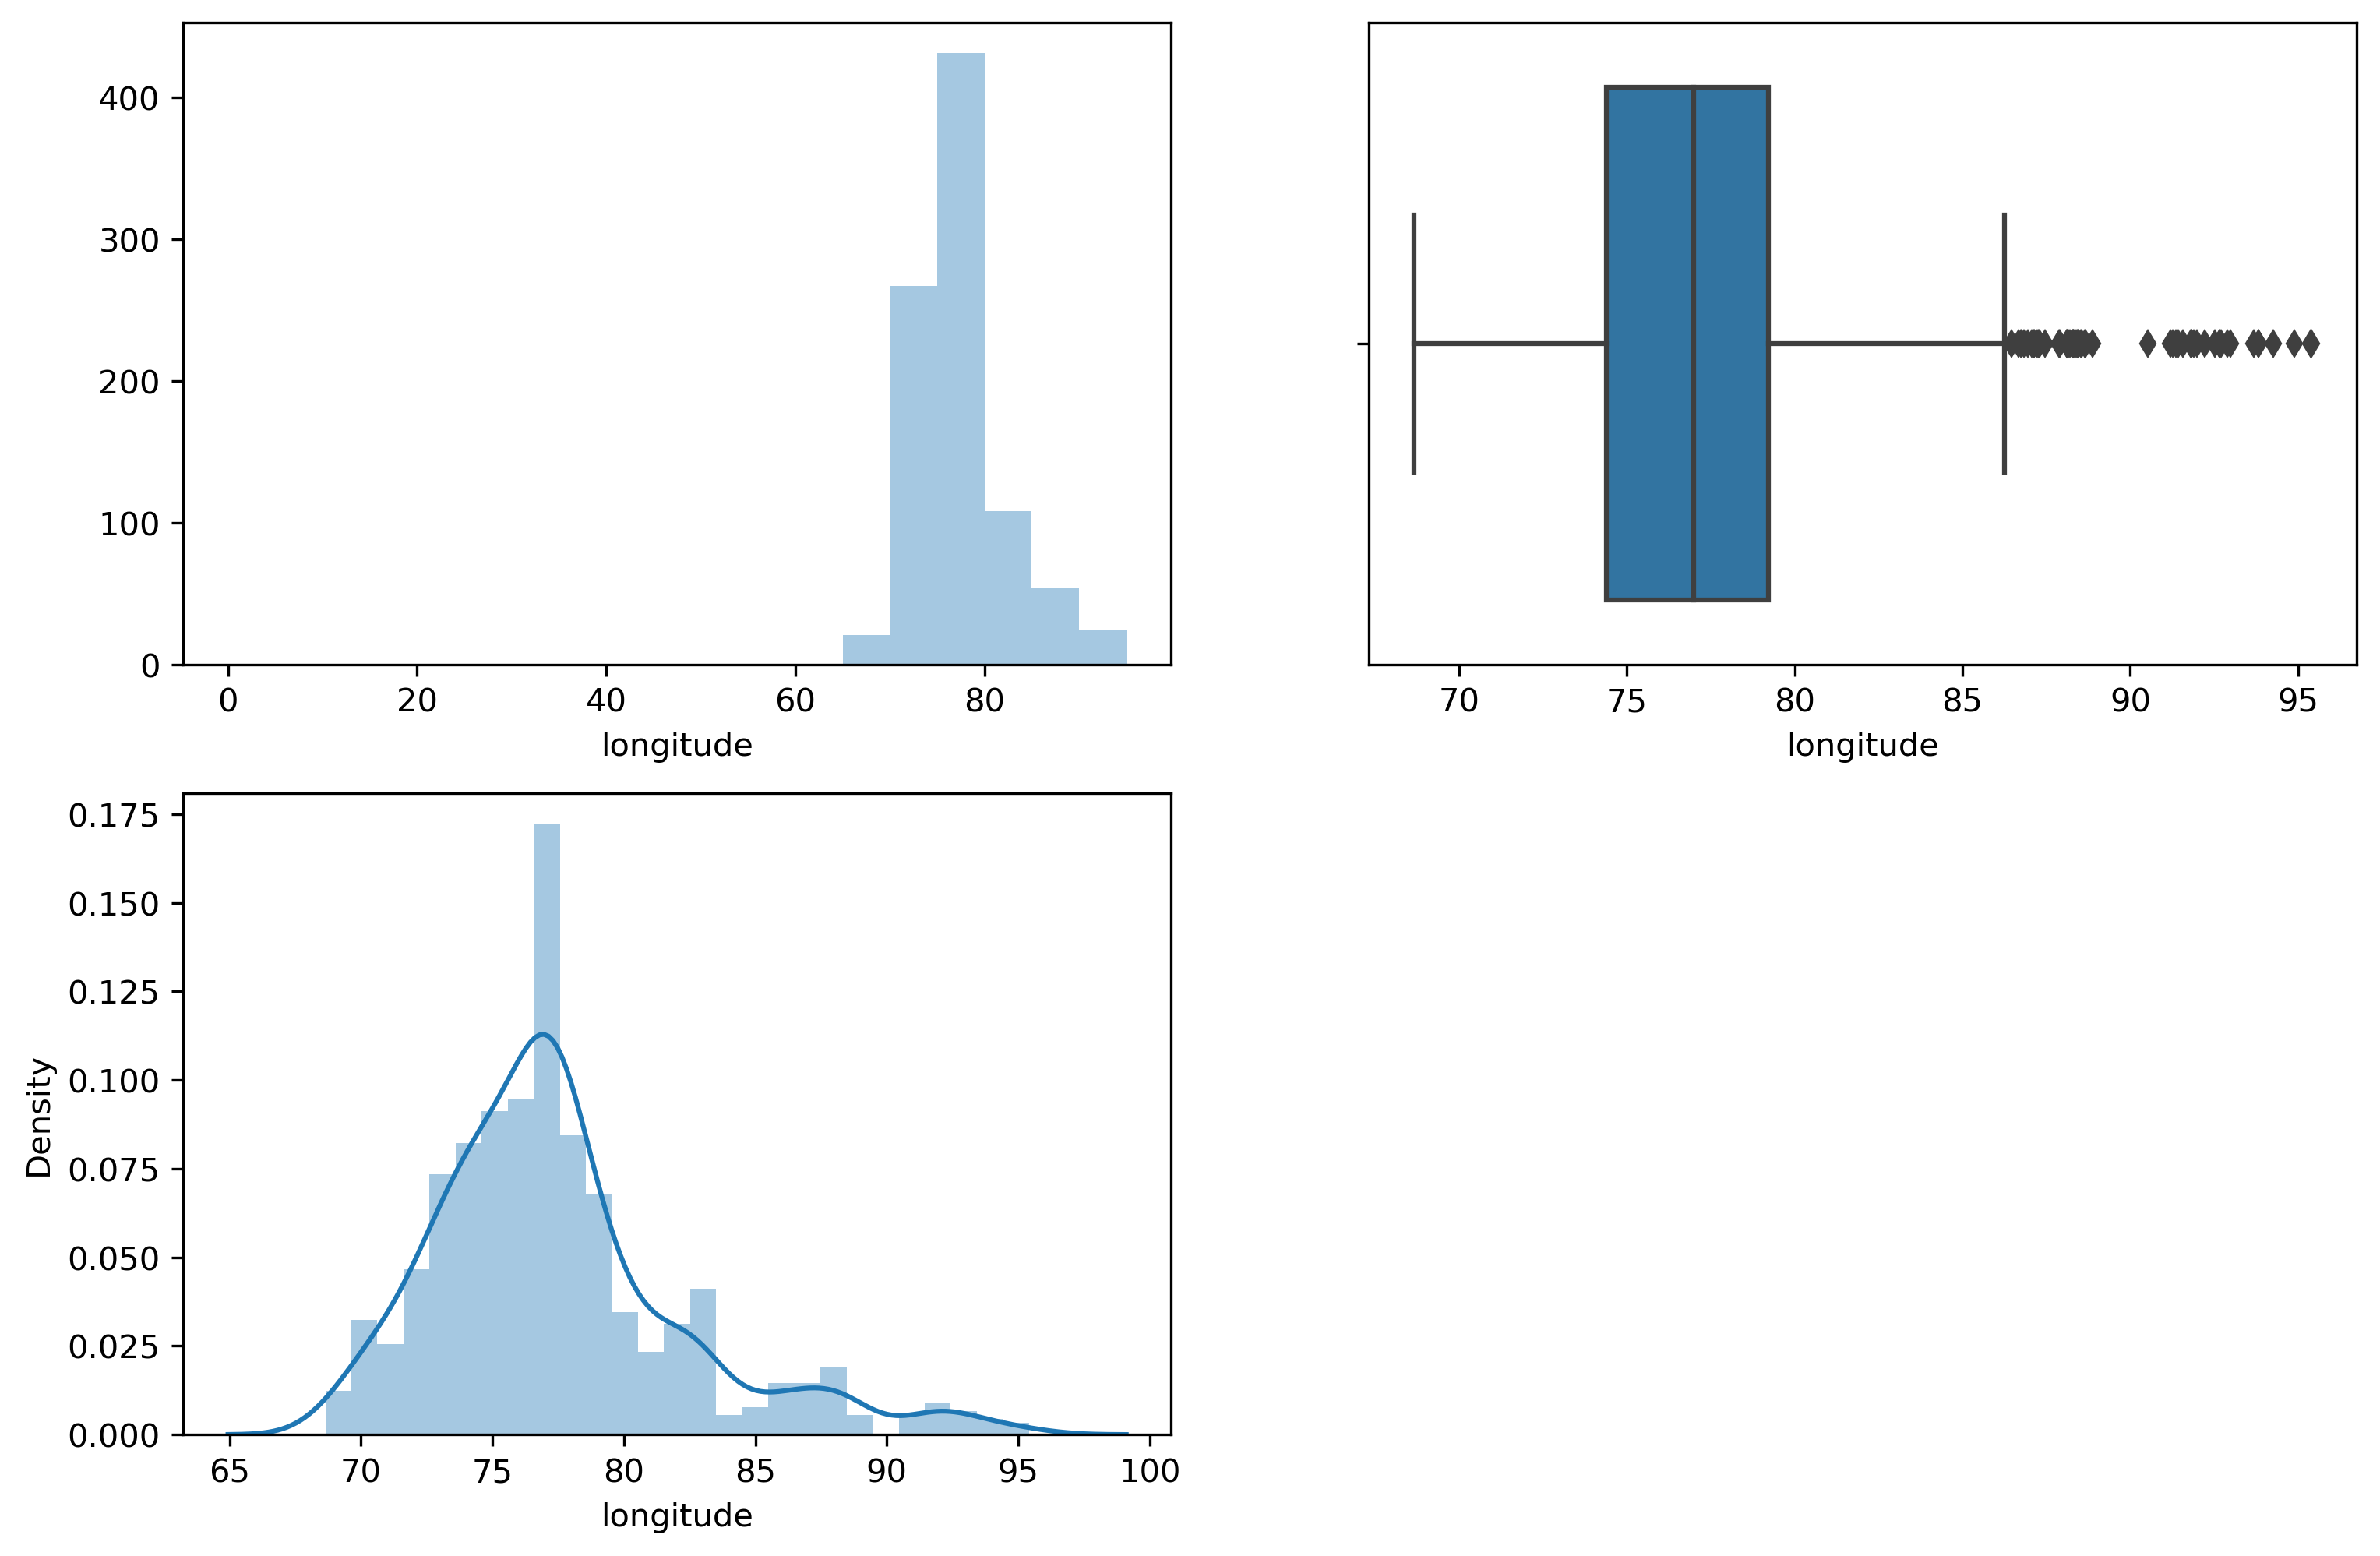

In [19]:
plt.figure(figsize=(12,8),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['longitude'], kde=False, bins=range(0, 100, 5));
plt.subplot(2,2,2)
sns.boxplot(data['longitude']);
plt.subplot(2,2,3)
sns.distplot(data['longitude']);

Here I can see that there are many outliers present in the boxplot and also the Distribution Curve has skewness towards right.

#### Primary_Fuel:

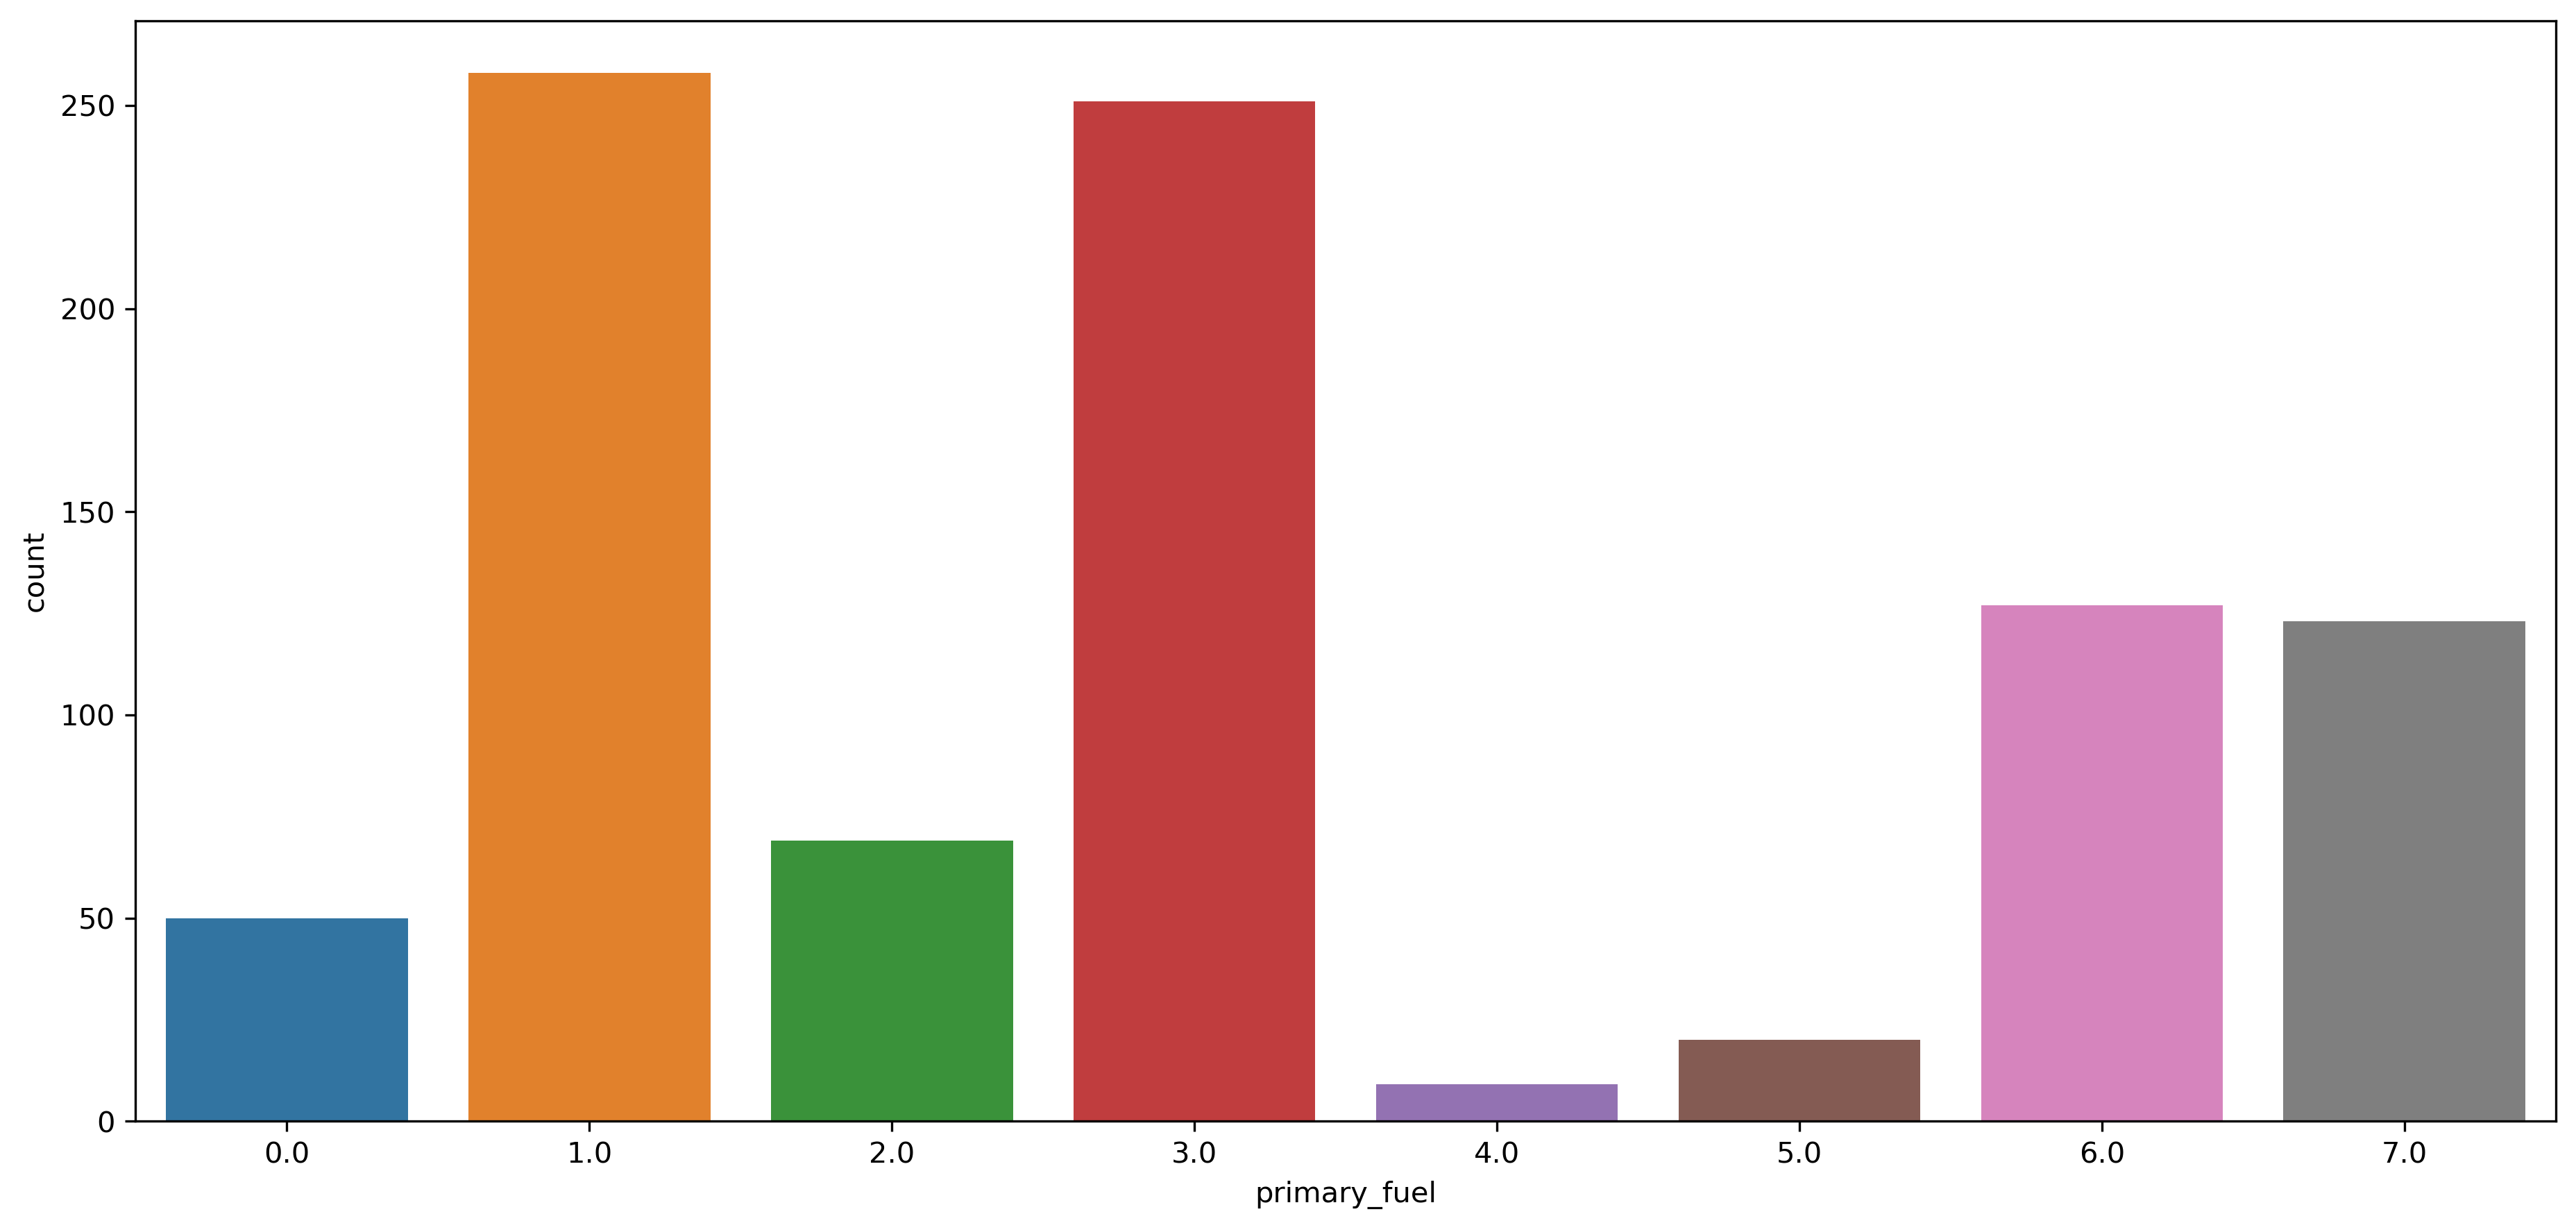

In [20]:
plt.figure(figsize=(15,7),dpi=300)
sns.countplot(data.primary_fuel);

Here I can see that the count and is almost equal in the categories 1 and 3 and the category 4 is with least count.

#### Commissioning_year :

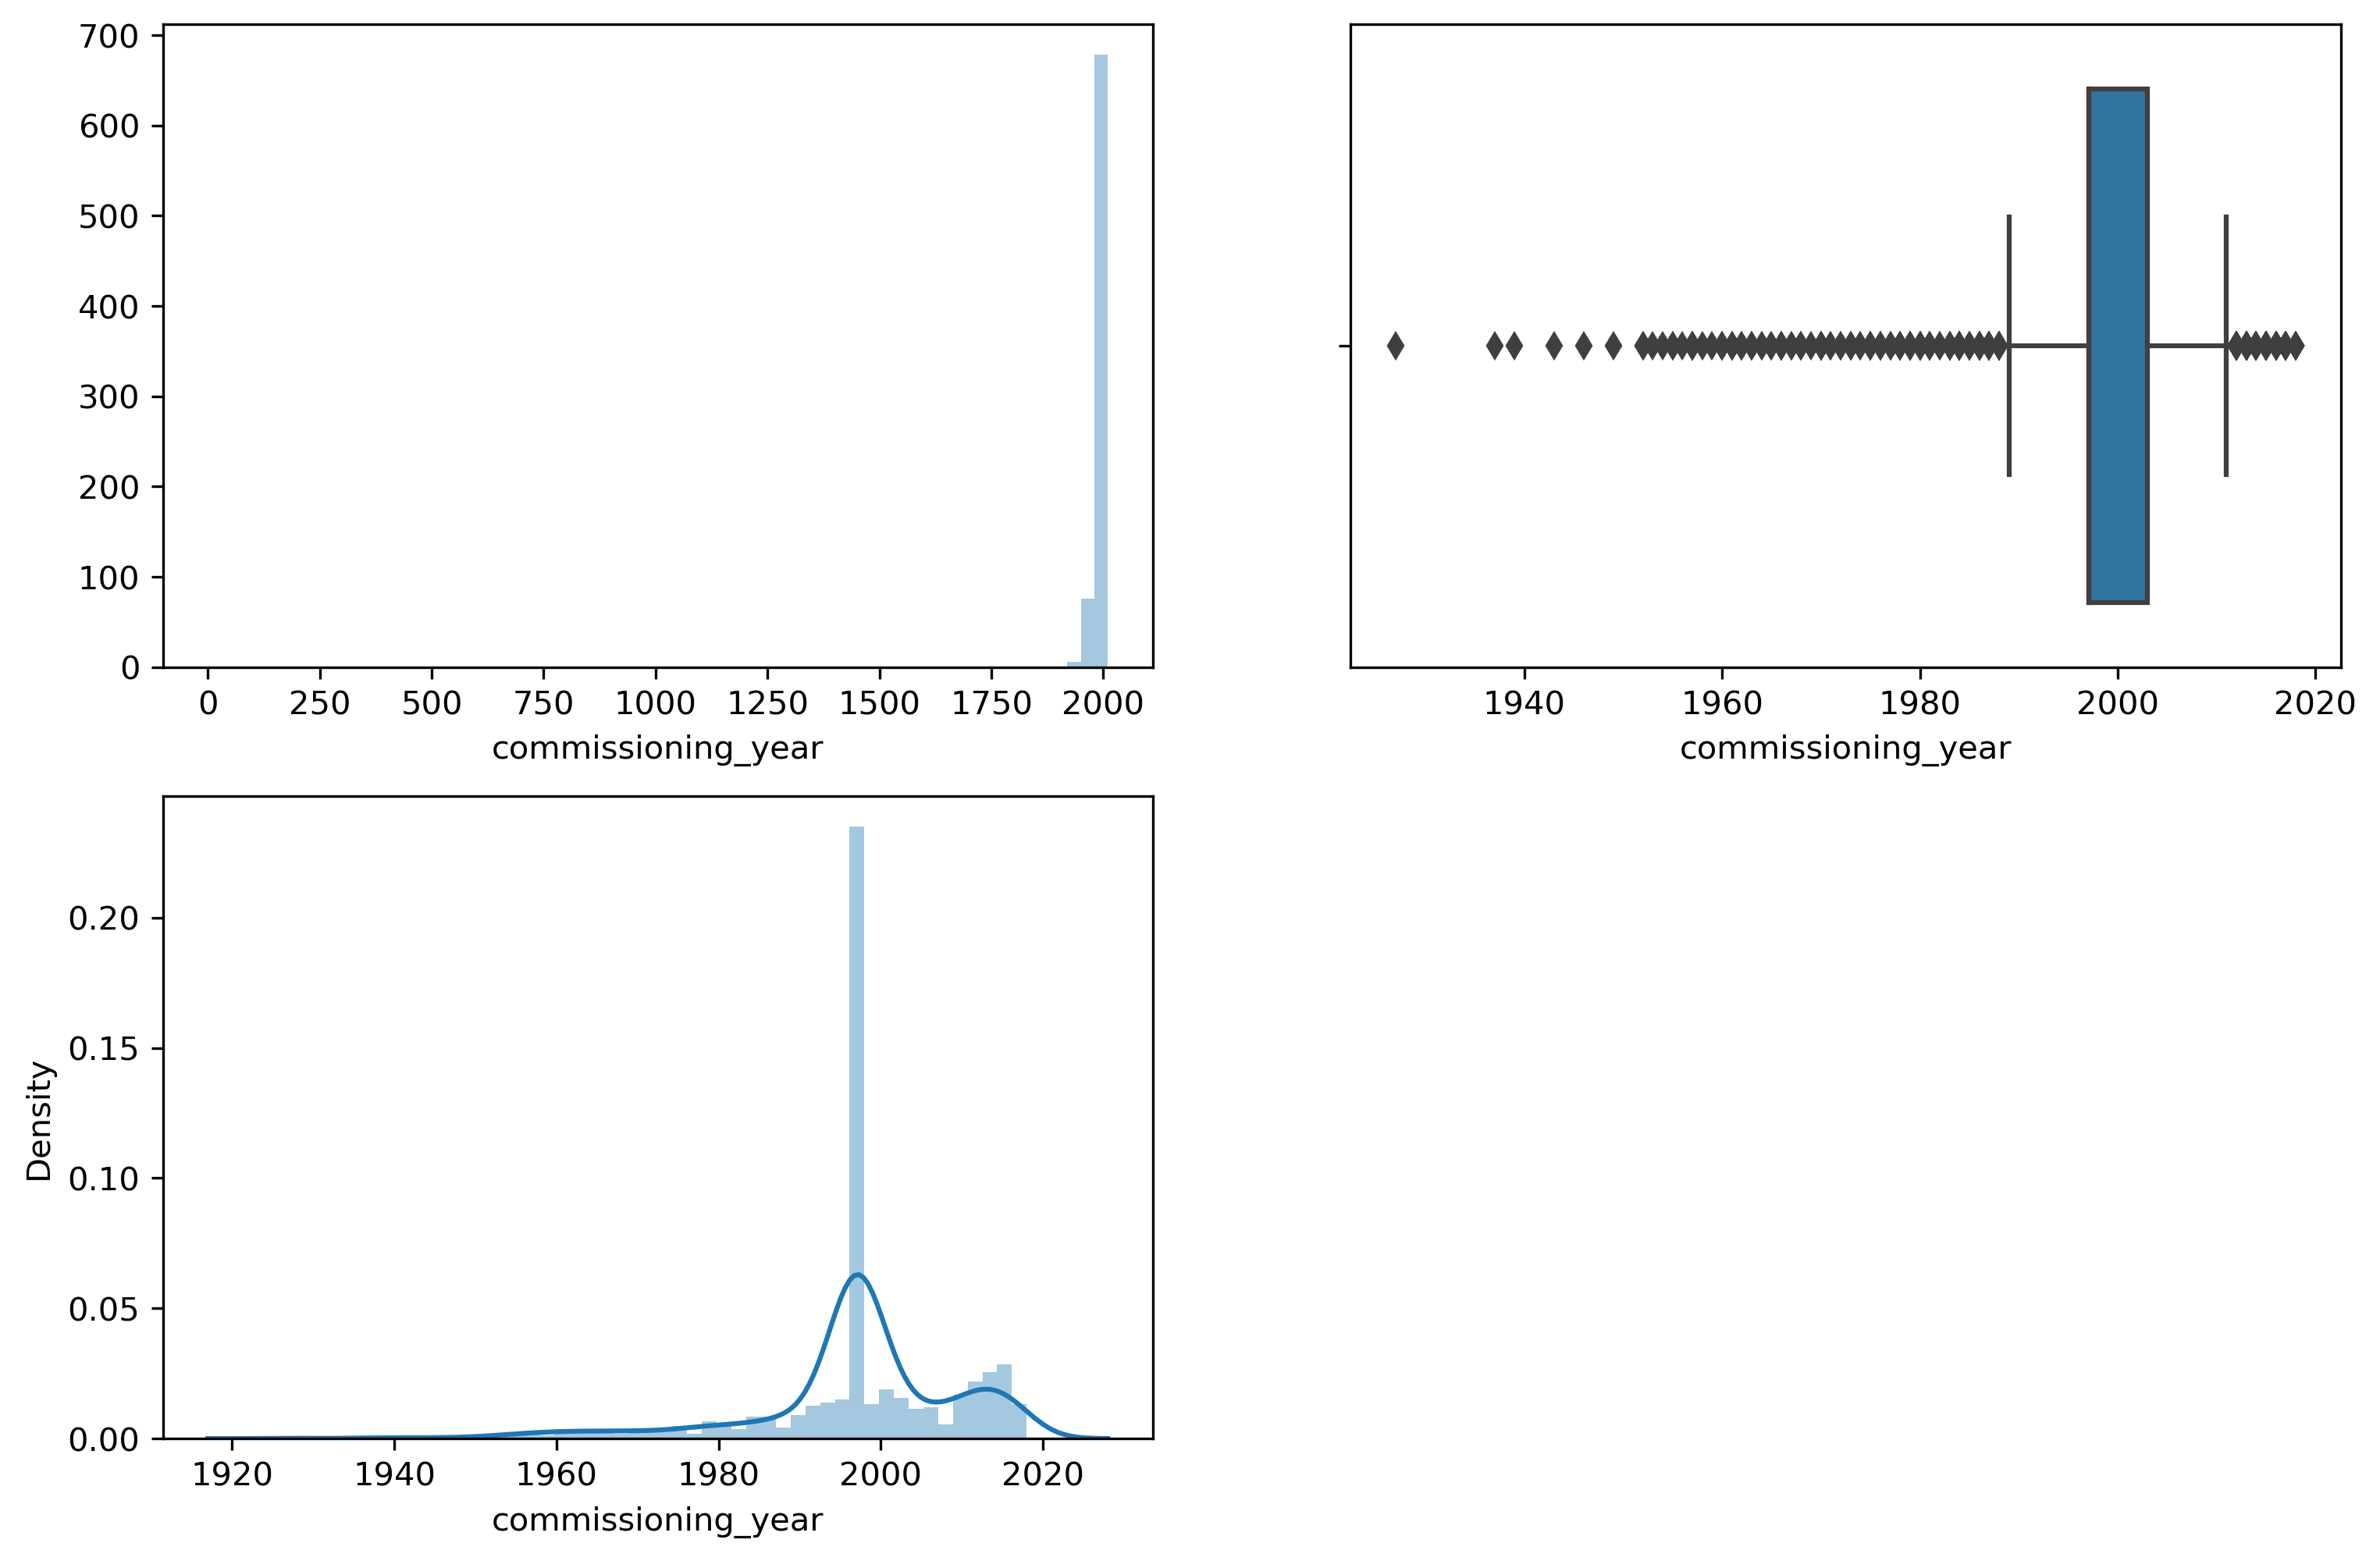

In [21]:
plt.figure(figsize=(12,8),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['commissioning_year'], kde=False, bins=range(0,2020,30));
plt.subplot(2,2,2)
sns.boxplot(data['commissioning_year']);
plt.subplot(2,2,3)
sns.distplot(data['commissioning_year']);

Here I can see that there are many outliers present can be seen in the boxplot and the distribution curve is not at all normal.

#### Source:

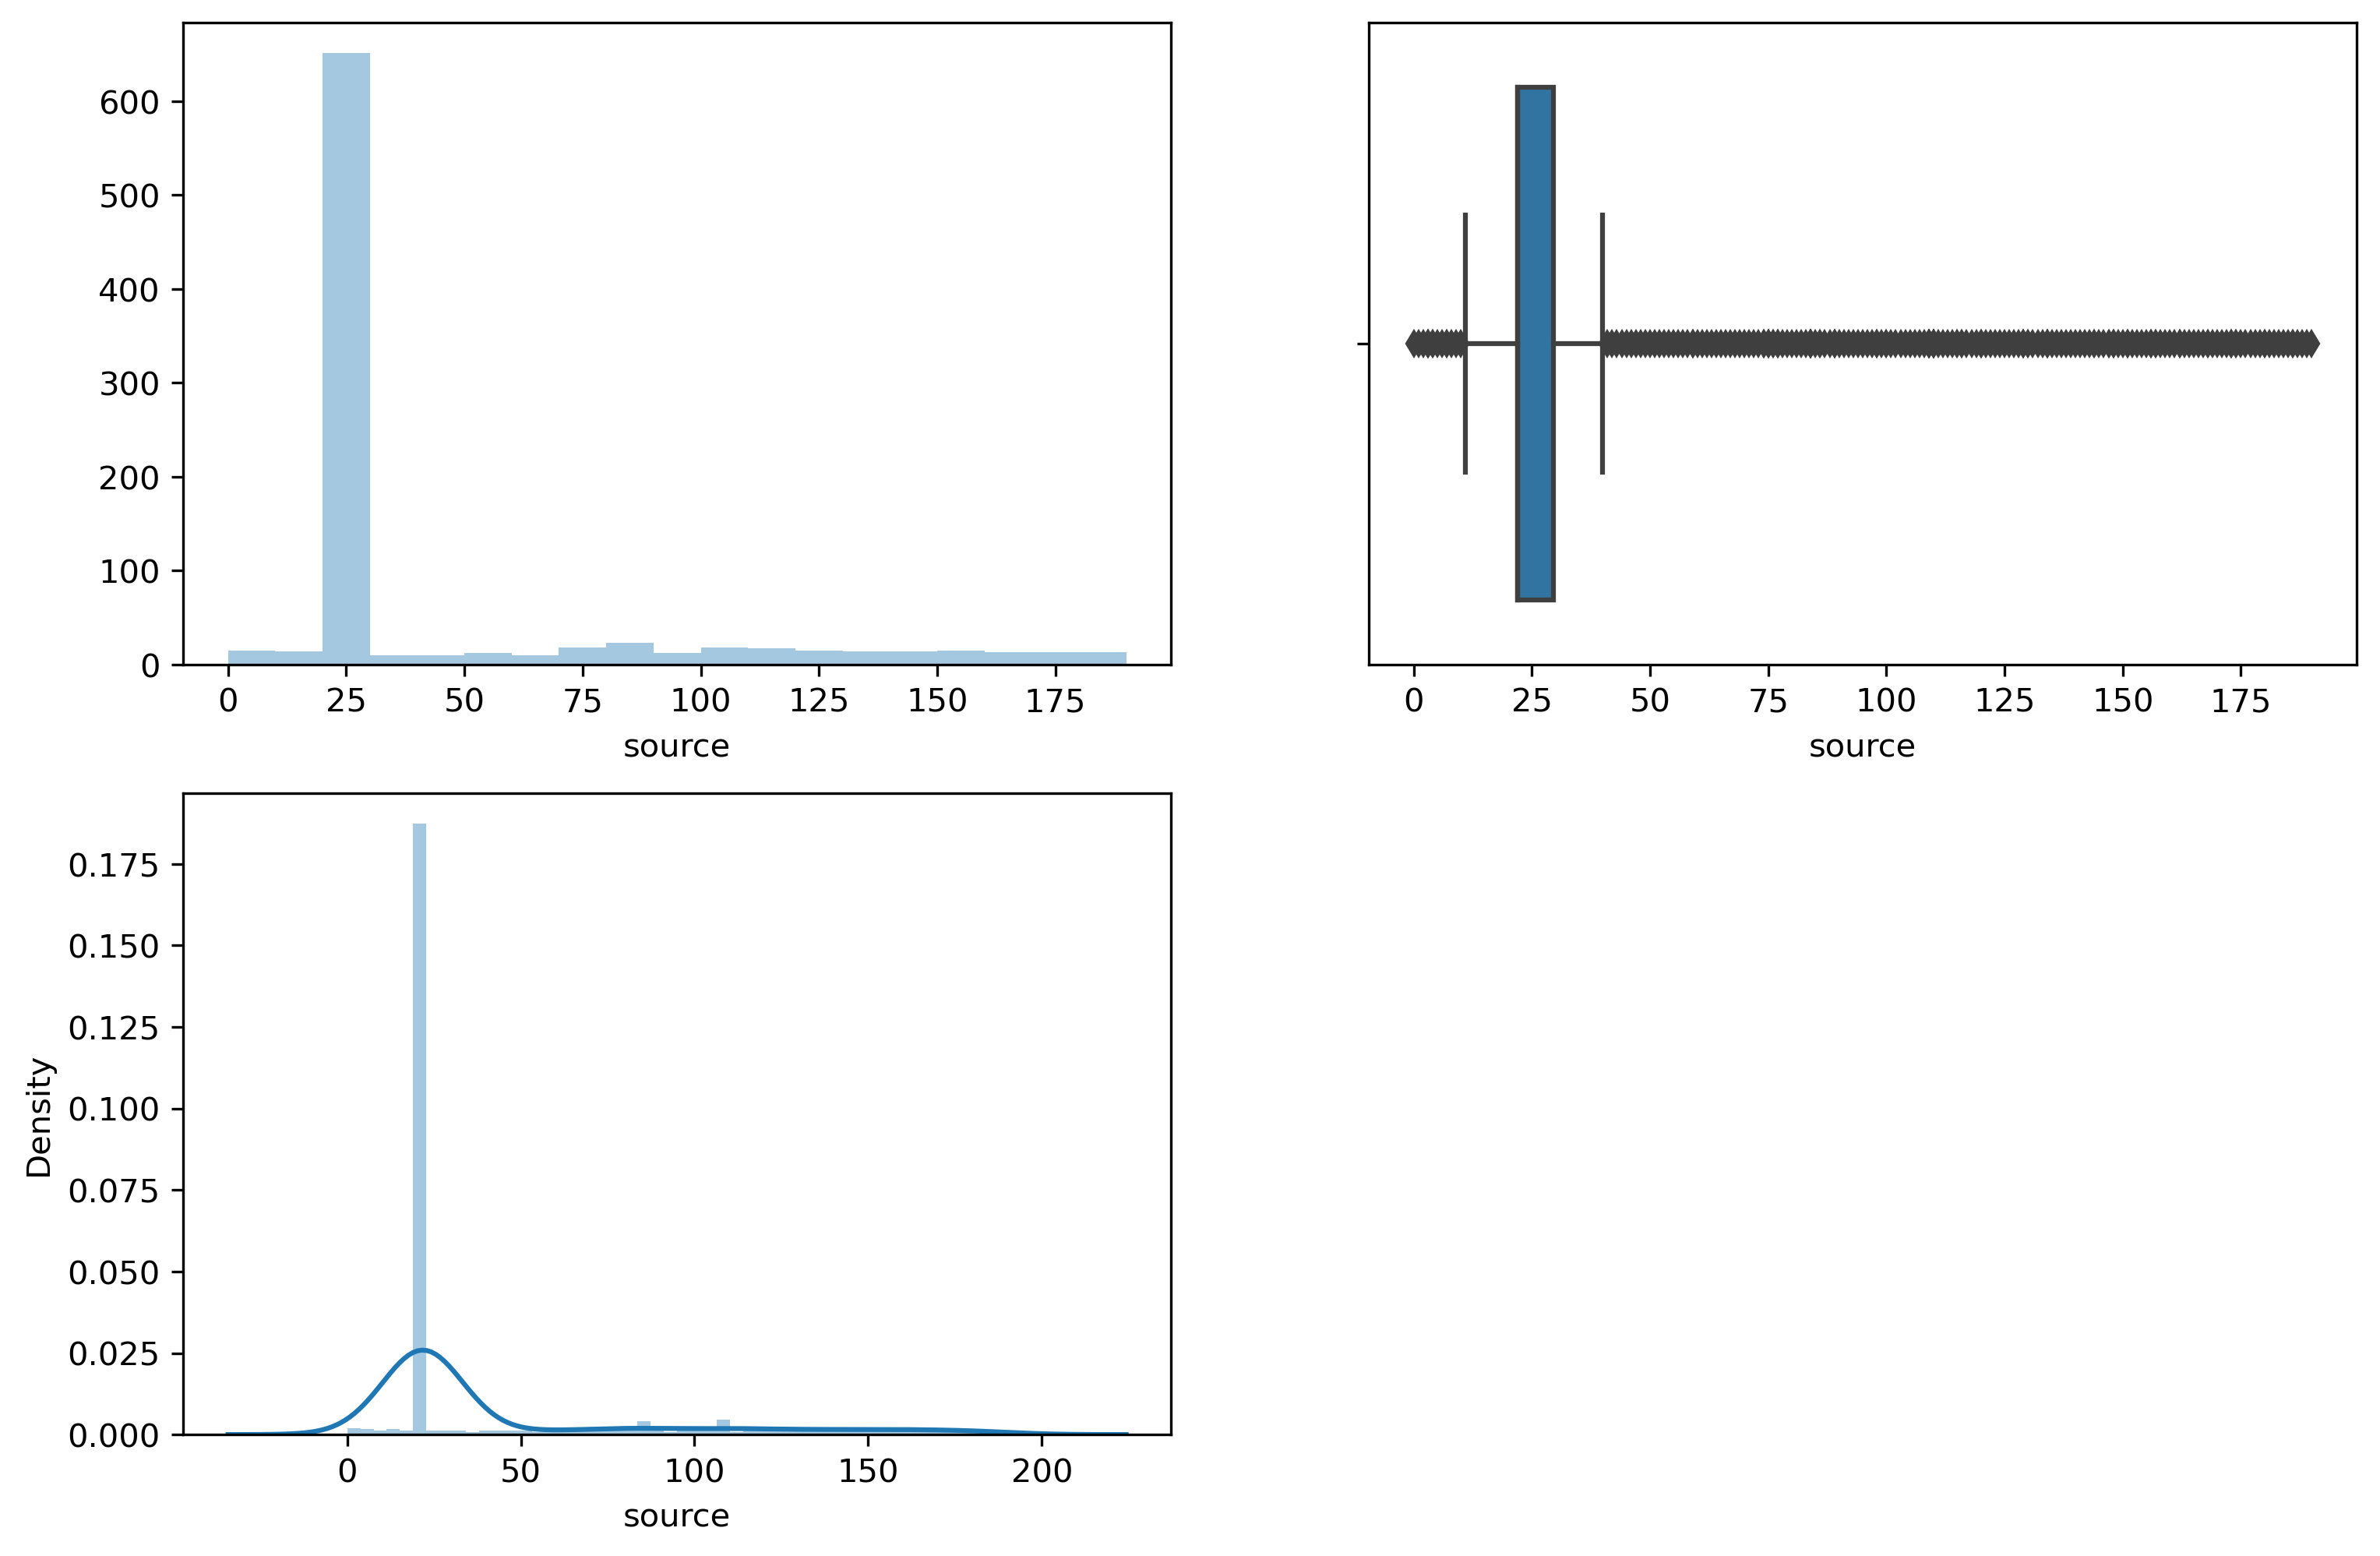

In [22]:
plt.figure(figsize=(12,8),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['source'], kde=False, bins=range(0,200,10));
plt.subplot(2,2,2)
sns.boxplot(data['source']);
plt.subplot(2,2,3)
sns.distplot(data['source']);

Here I can see that there are many outliers present in the boxplot and the distribution is completely skewed towards right.

#### Geolocation_source:

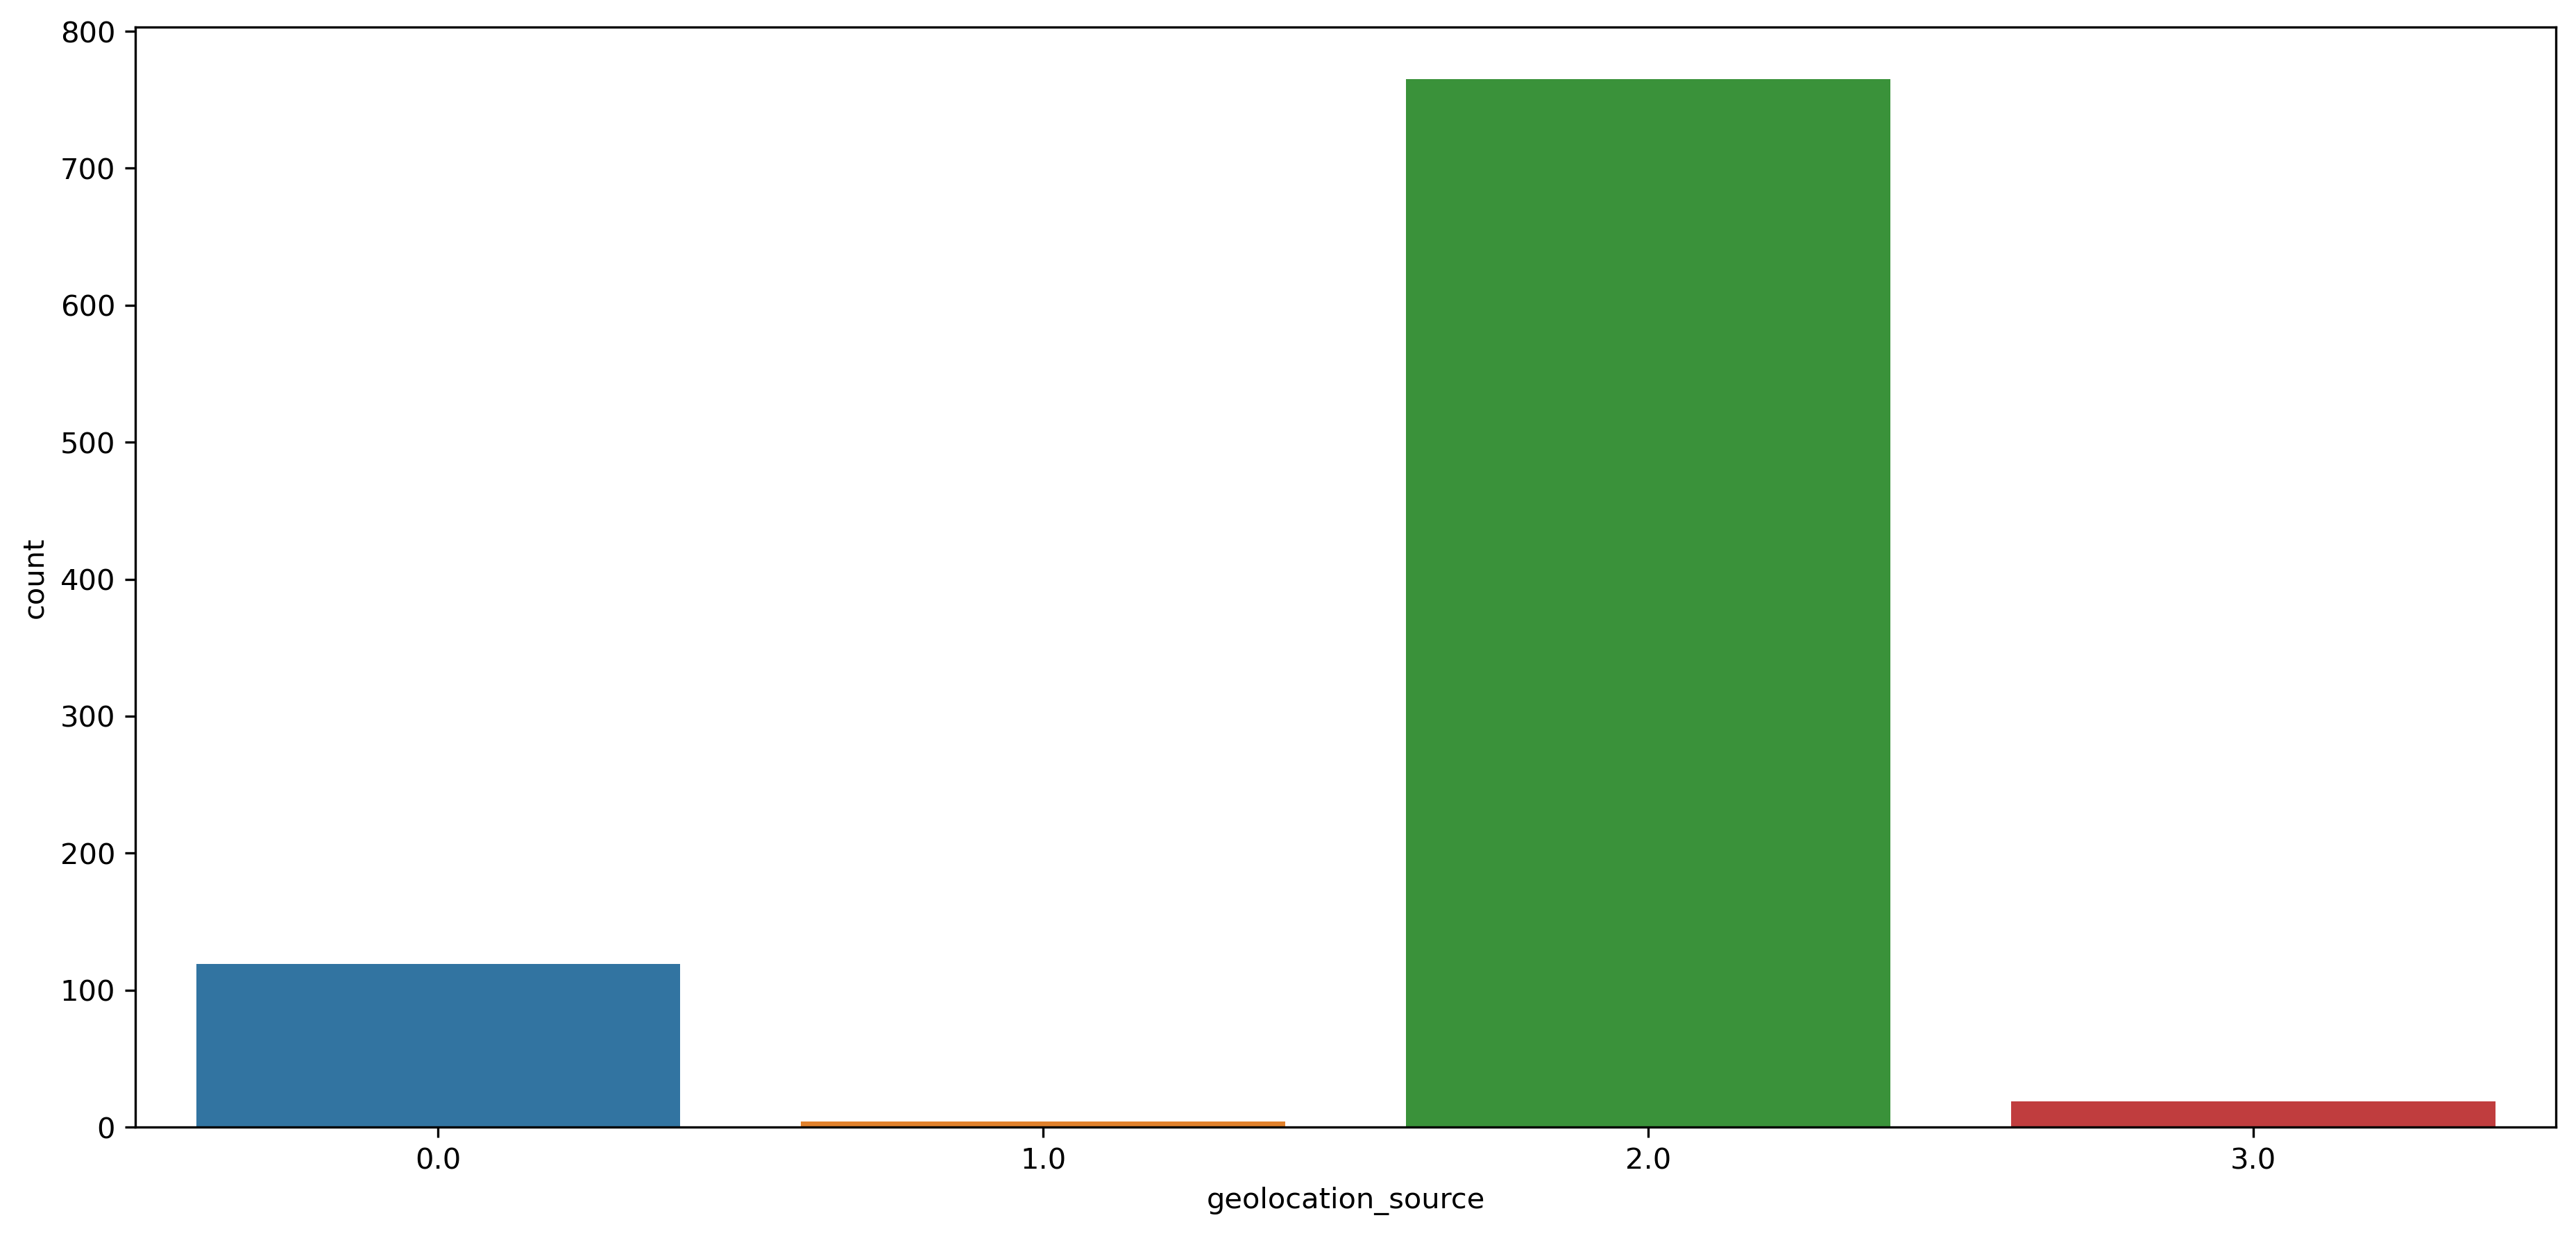

In [23]:
plt.figure(figsize=(15,7),dpi=300)
sns.countplot(data.geolocation_source);

Here I can see that the highest count is for the category-2 and the least count is for category-1.

#### Year_Of_Capacity_Data :

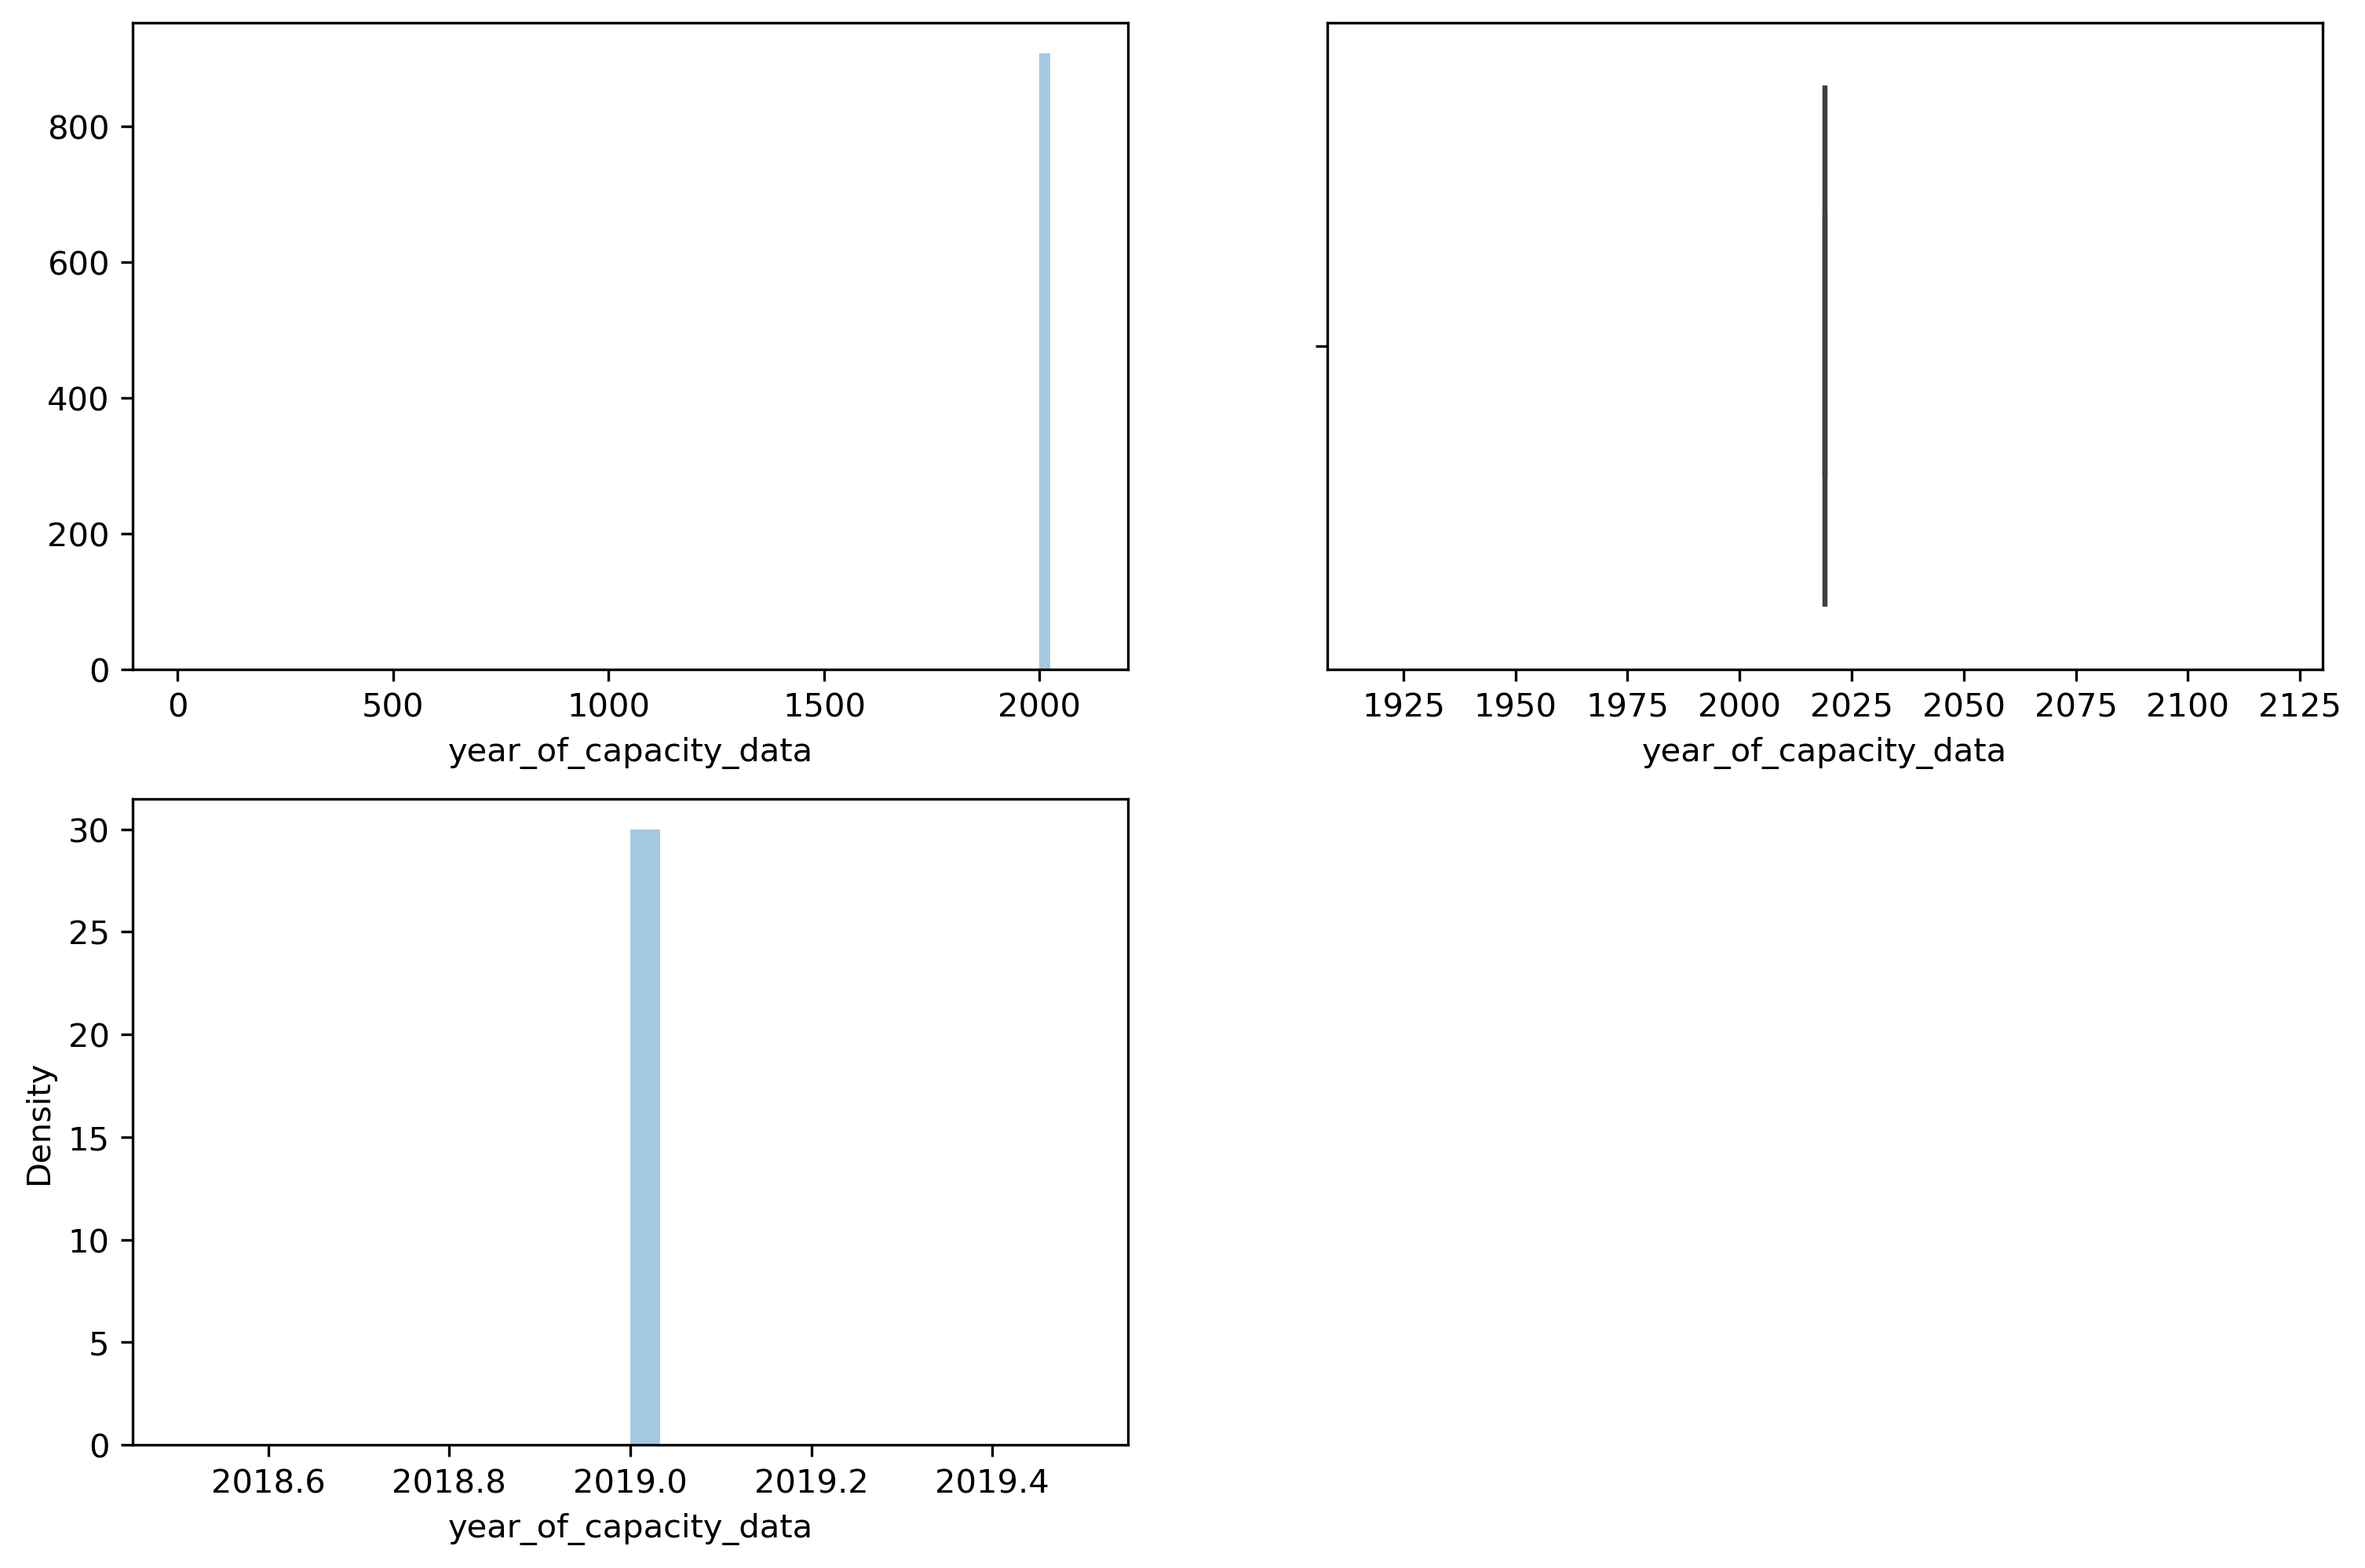

In [24]:
plt.figure(figsize=(12,8),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['year_of_capacity_data'], kde=False, bins=range(0, 2125,25));
plt.subplot(2,2,2)
sns.boxplot(data['year_of_capacity_data']);
plt.subplot(2,2,3)
sns.distplot(data['year_of_capacity_data']);

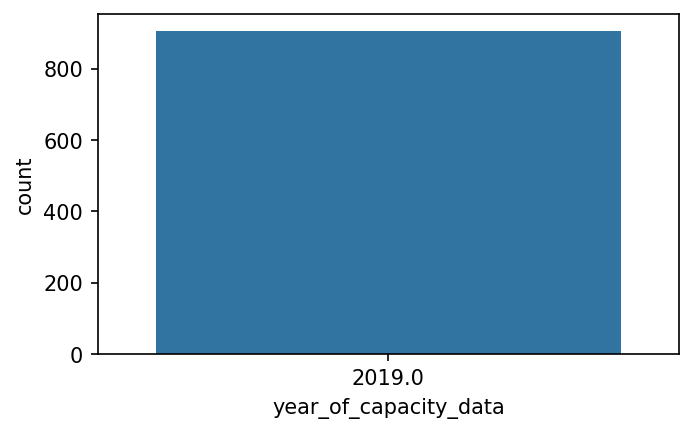

In [25]:
plt.figure(figsize=(5,3),dpi=150)
sns.countplot(data.year_of_capacity_data);

Here I can see that this column has no infuence in boxplot or in distribution curve and it can be said that, there is no influence of this column in our model and so we can drop this column.

#### Generation_gwh_2014:

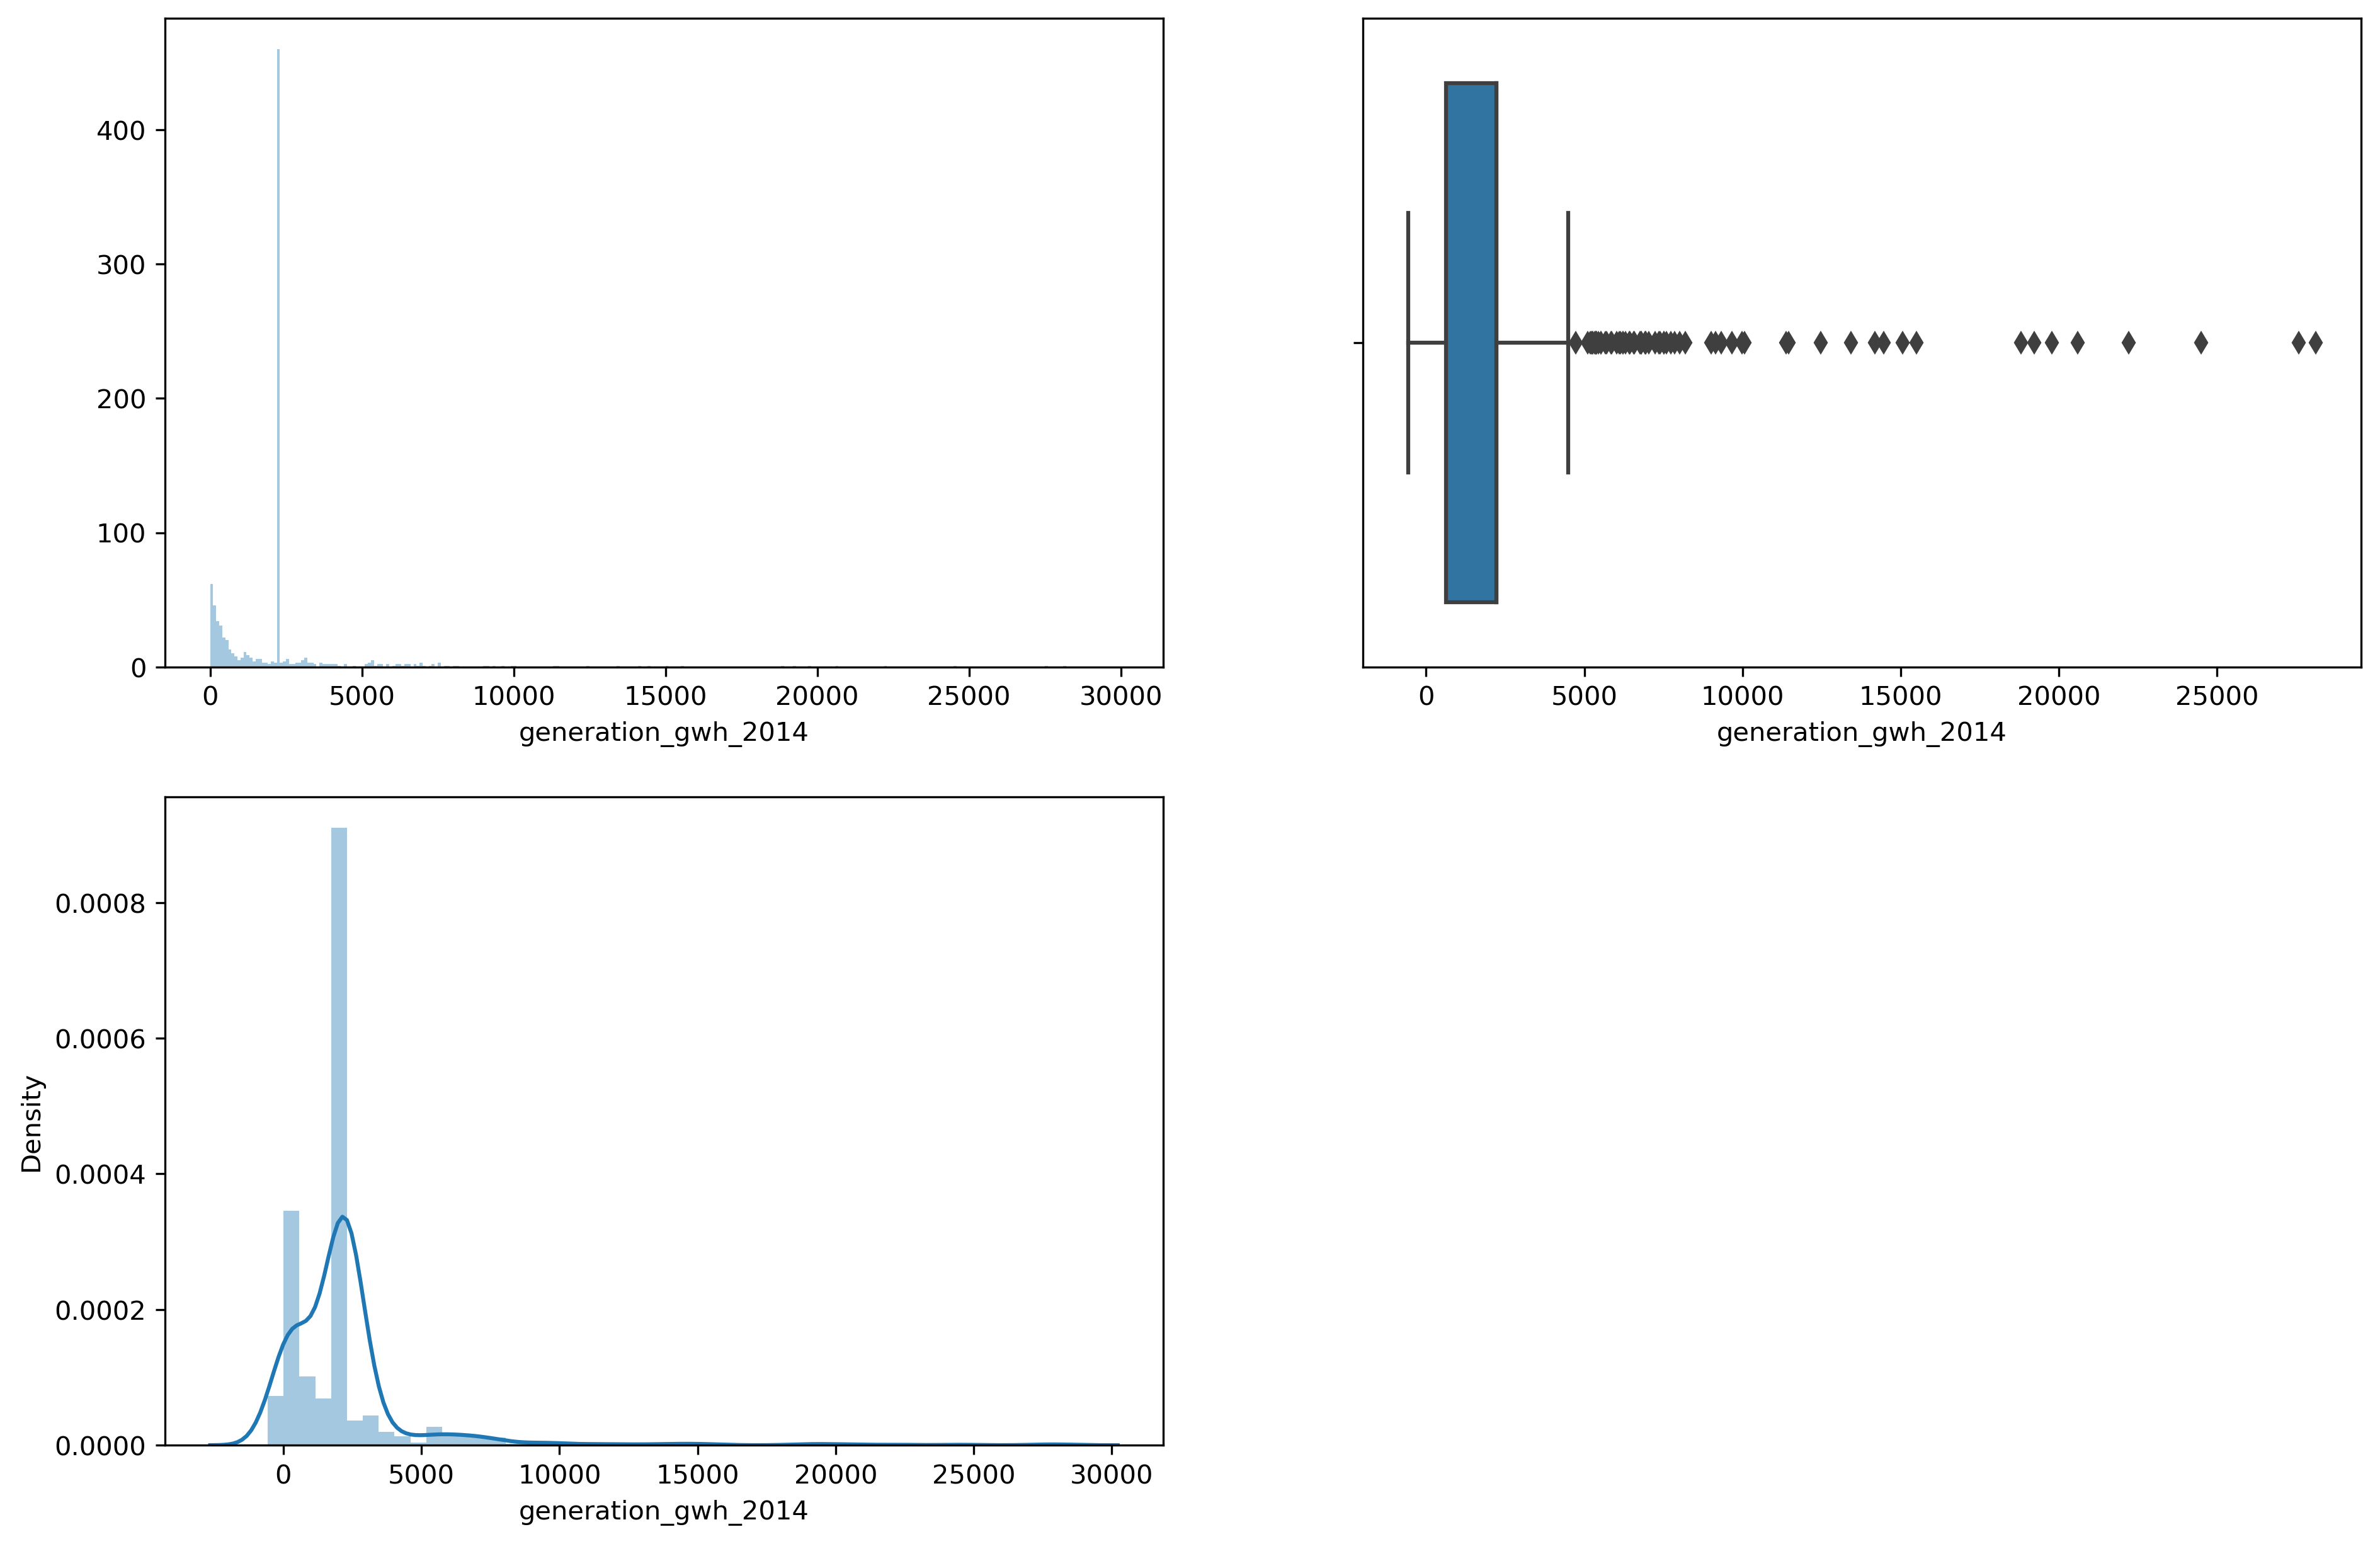

In [26]:
plt.figure(figsize=(15,10),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['generation_gwh_2014'], kde=False, bins=range(0,30000,100));
plt.subplot(2,2,2)
sns.boxplot(data['generation_gwh_2014']);
plt.subplot(2,2,3)
sns.distplot(data['generation_gwh_2014']);

Here I can see that there are many outliers present in the data and the distribution curve is also skewed and it is not normal.

#### Generation_gwh_2015:

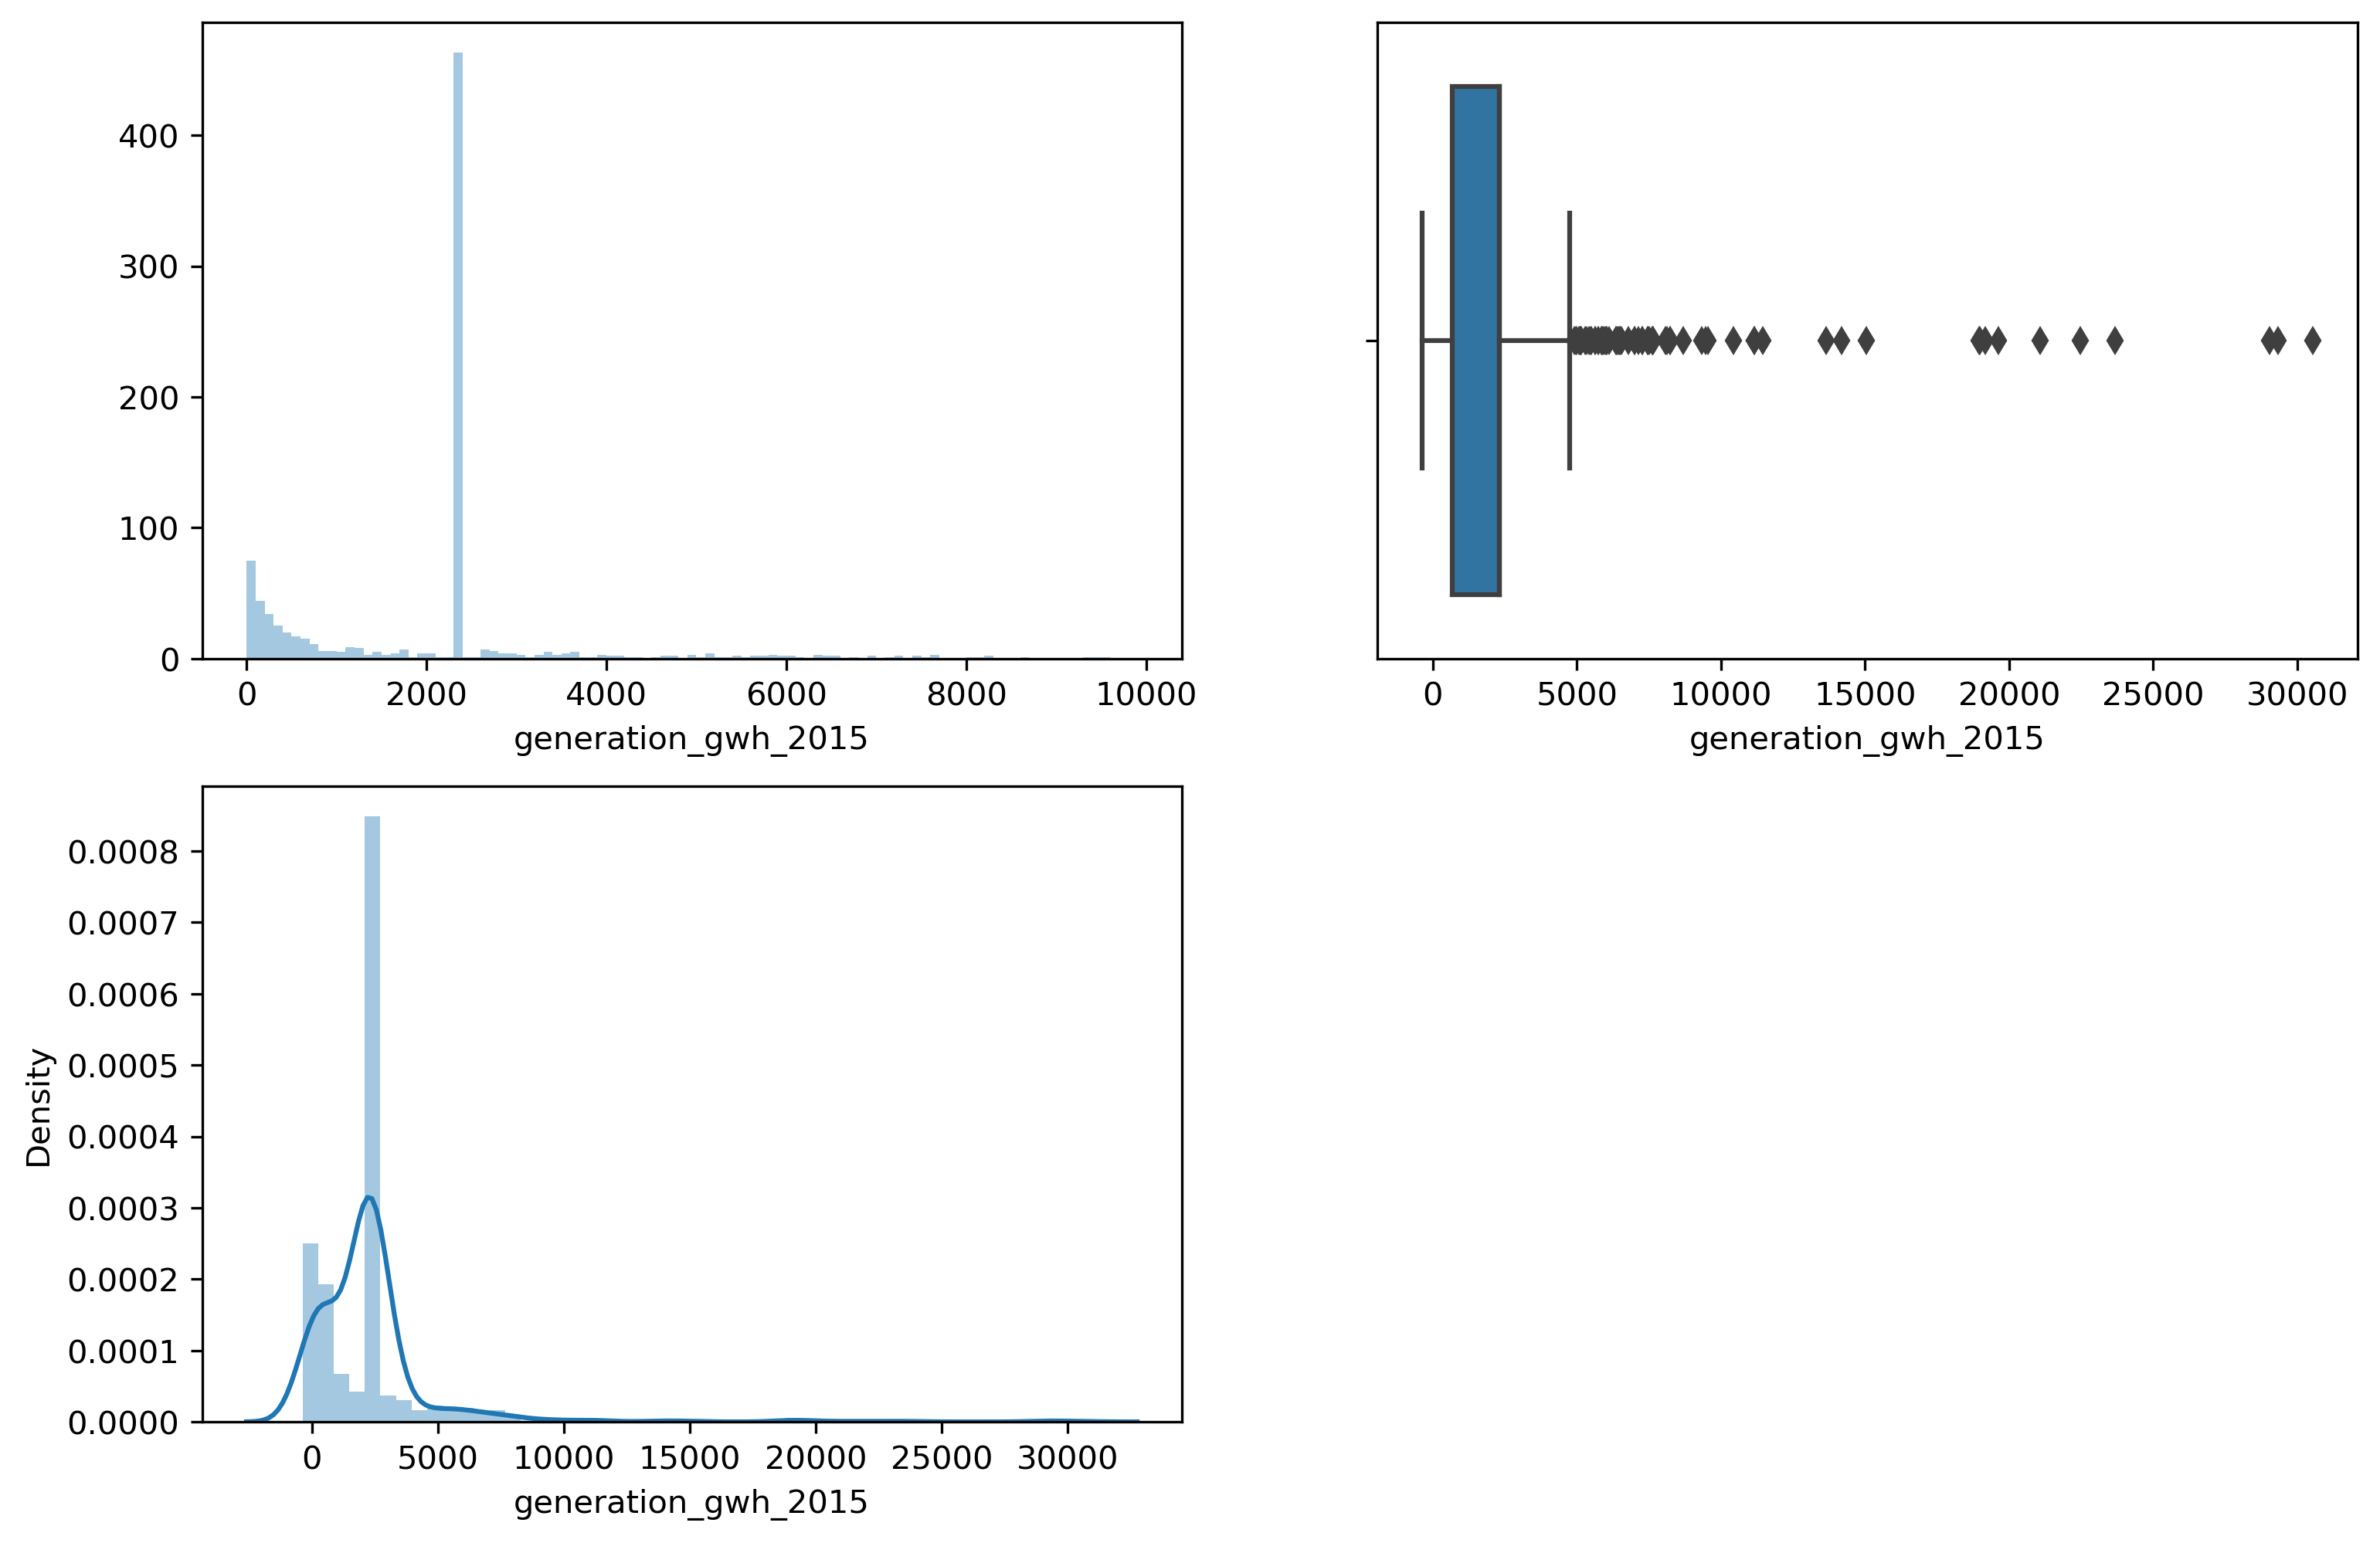

In [27]:
plt.figure(figsize=(12,8),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['generation_gwh_2015'], kde=False, bins=range(0,10000,100));
plt.subplot(2,2,2)
sns.boxplot(data['generation_gwh_2015']);
plt.subplot(2,2,3)
sns.distplot(data['generation_gwh_2015']);

Here I can see that there are many outliers present in the boxplot and the distribution curve is also not normal.

#### Generation_gwh_2016:

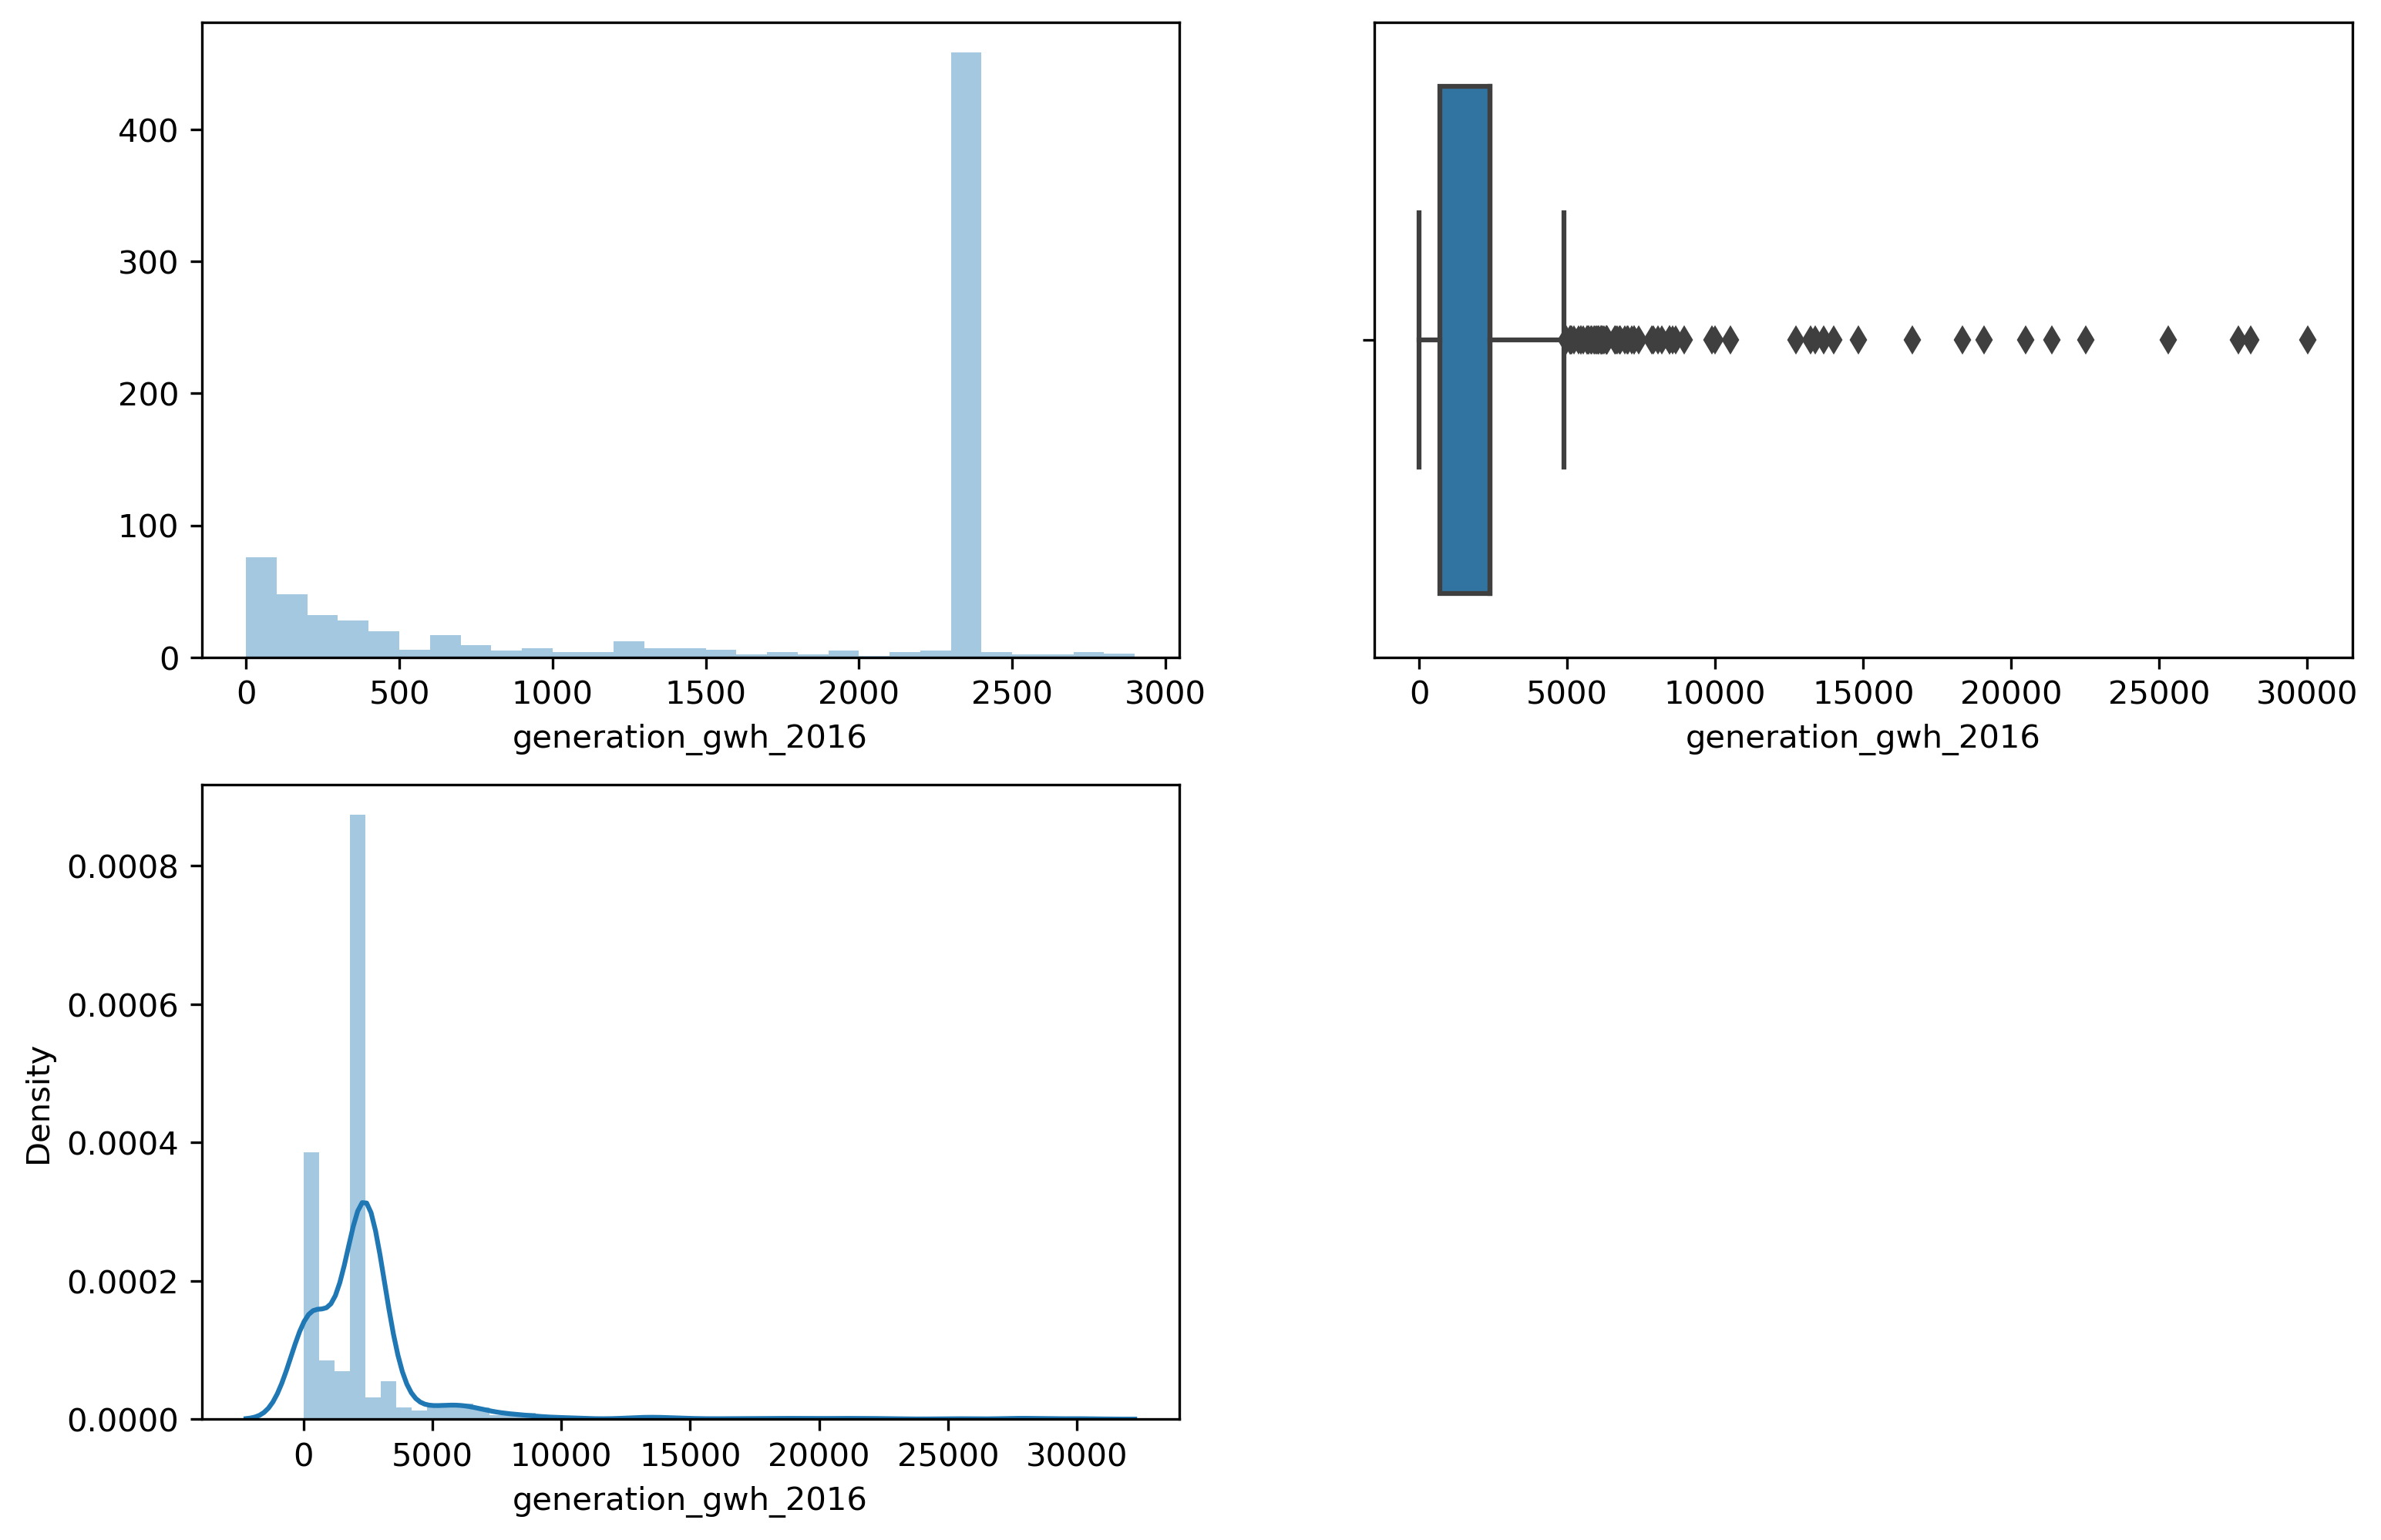

In [28]:
plt.figure(figsize=(12,8),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['generation_gwh_2016'], kde=False, bins=range(0,3000,100));
plt.subplot(2,2,2)
sns.boxplot(data['generation_gwh_2016']);
plt.subplot(2,2,3)
sns.distplot(data['generation_gwh_2016']);

Here I can see that there are many outliers present in the dataset which we can see in the boxplot and the distribution curve is also not normal.

#### Generation_gwh_2017:

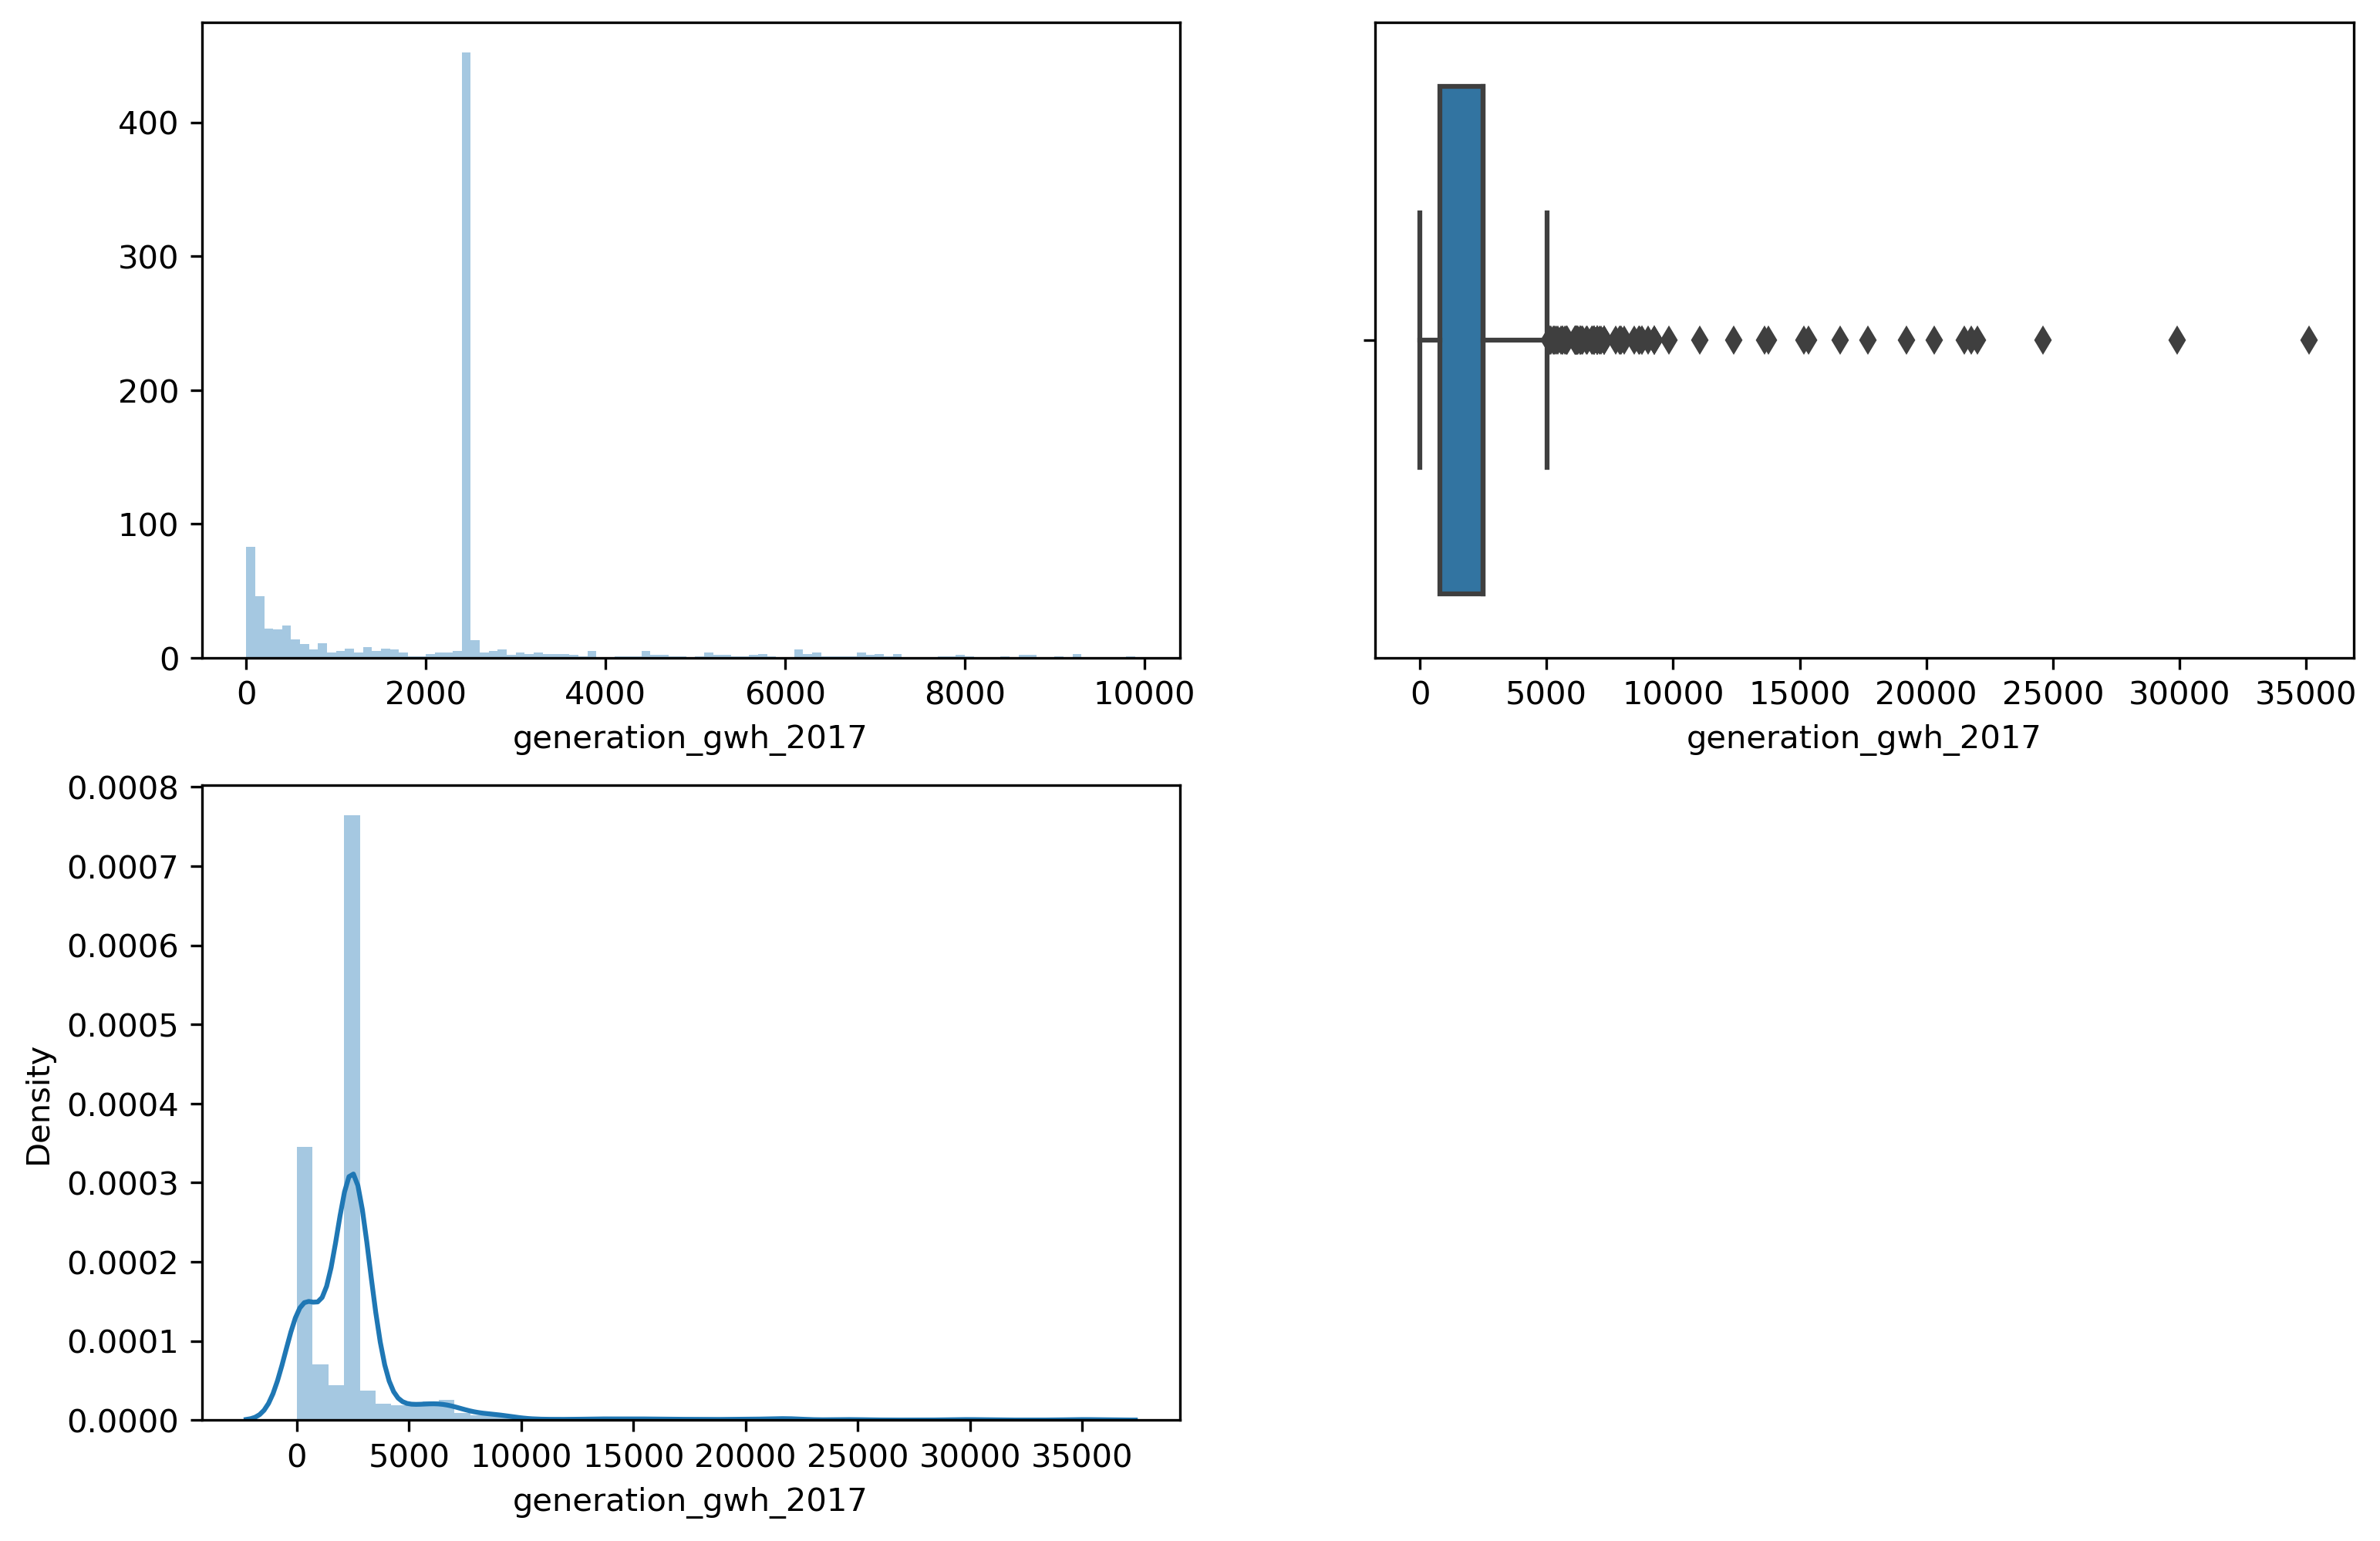

In [29]:
plt.figure(figsize=(12,8),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['generation_gwh_2017'], kde=False, bins=range(0,10000,100));
plt.subplot(2,2,2)
sns.boxplot(data['generation_gwh_2017']);
plt.subplot(2,2,3)
sns.distplot(data['generation_gwh_2017']);

Here I can see that there are many outliers present in the boxplot and the distribution curve is not normal

#### Generation_gwh_2018:

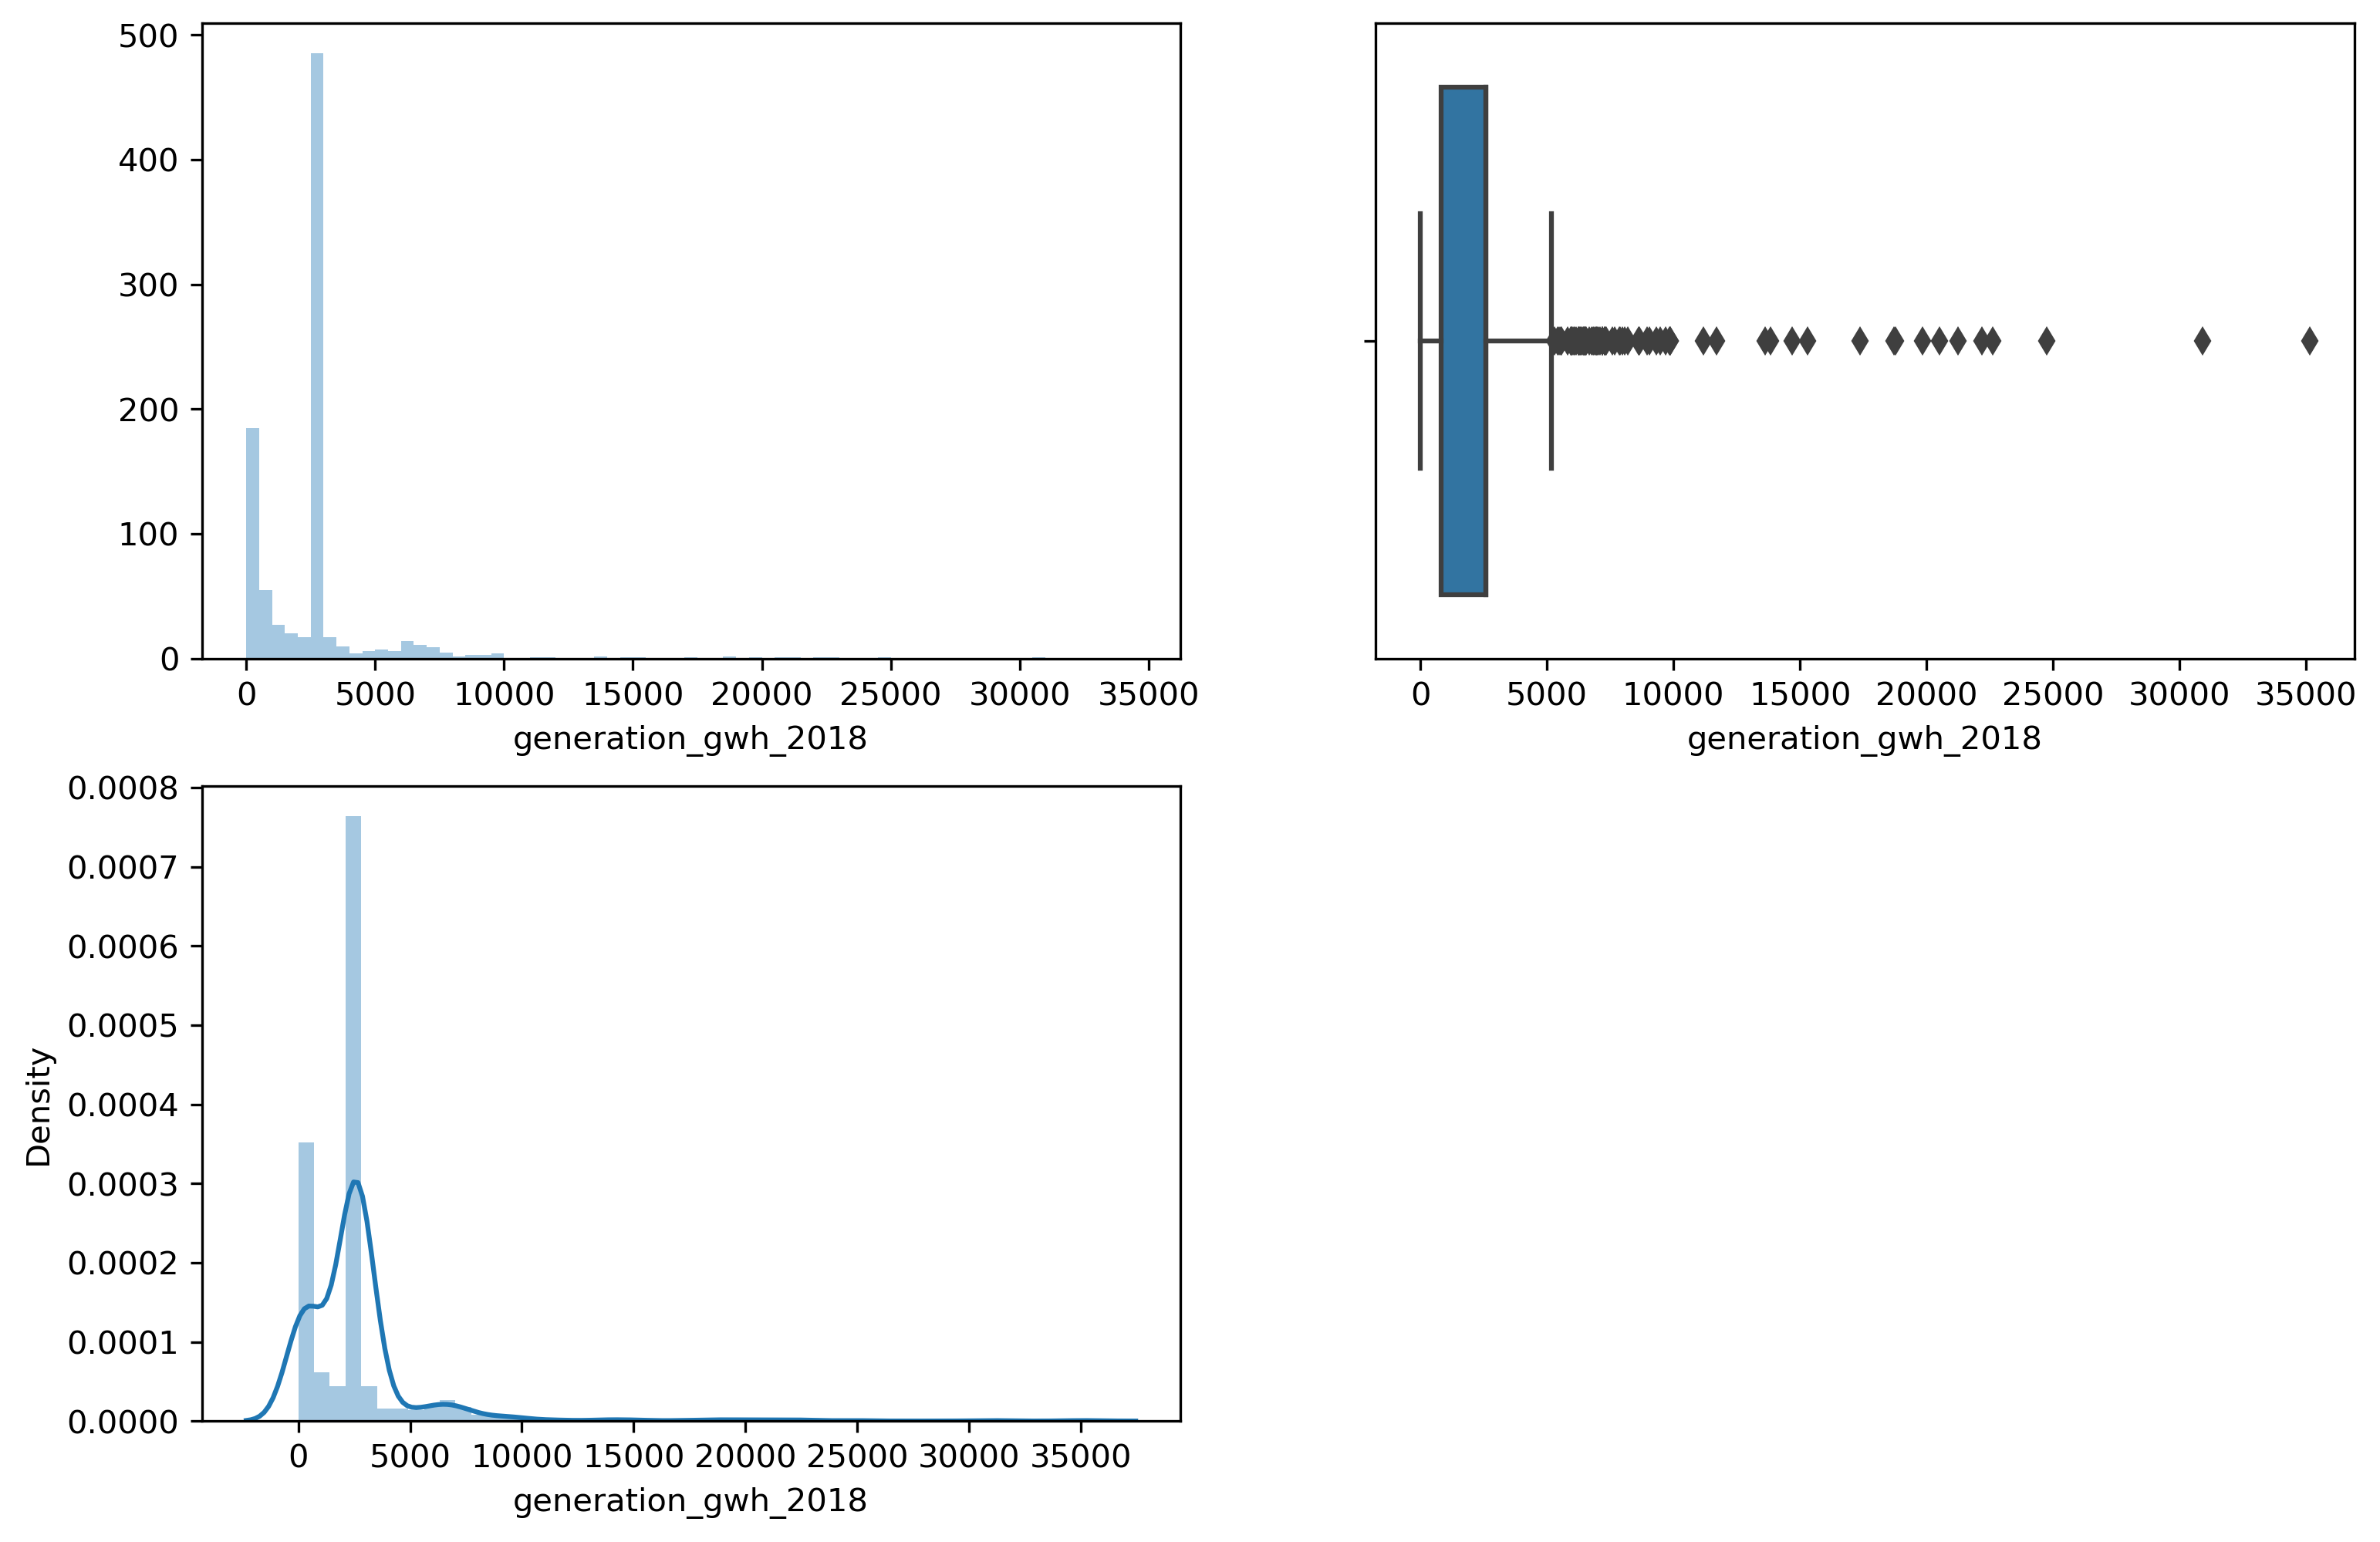

In [30]:
plt.figure(figsize=(12,8),dpi=300)
plt.subplot(2,2,1)
sns.distplot(data['generation_gwh_2018'], kde=False, bins=range(0, 35000, 500));
plt.subplot(2,2,2)
sns.boxplot(data['generation_gwh_2018']);
plt.subplot(2,2,3)
sns.distplot(data['generation_gwh_2018']);

Here I can see that there are many number of outliers present in the dataset that can be seen in the boxplot and the distribution curve is also not normal.

#### Generation_data_source:

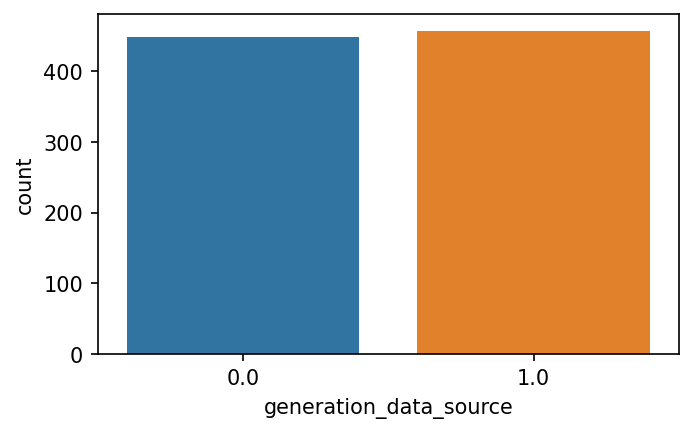

In [31]:
plt.figure(figsize=(5,3),dpi=150)
sns.countplot(data.generation_data_source);

Here I can see that the count is almost same in both categories but it shows that the count is more in category - 1.

### Bivariate Analysis:

Our predictions Columns are "Primary Fuel" and "capacity_mw". So, First I will analyse all the columns based on 'Primary Fuel' and then by 'Capacity_mw'

##### 1.  Finding relationships between all the varibales with "primary_fuel":

i. Relationship between "primary_fuel" and "latitude".

ii. Relationship between "primary_fuel" and "longitude".

<Figure size 5100x2700 with 0 Axes>

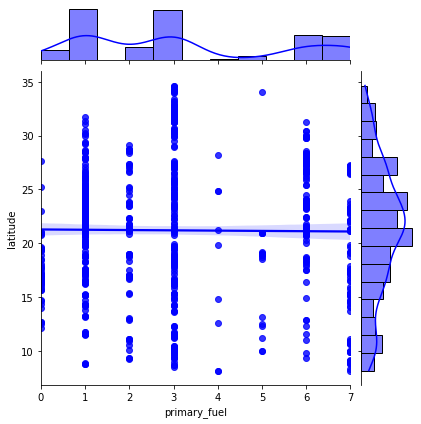

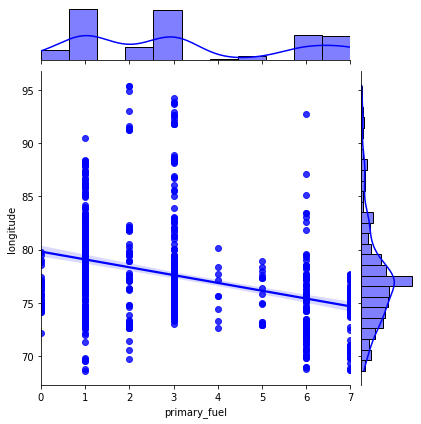

In [32]:
plt.figure(figsize=(17,9),dpi=300)
sns.jointplot(data=data, x='primary_fuel', y='latitude', kind='reg',color='blue');
sns.jointplot(data=data, x='primary_fuel', y='longitude', kind='reg',color='blue');

Documentation :-

1. Here I can see that as when the Latitude increases then also there is slight change in the Primary Fuel and also I can see that category 3rd has most influence. So, I can say that these two are least related to each other.
2. Here I can see that as when the Longitude increases then drastic change in the Primary Fuel can be seen. So, I can say that these two are related to each other.

iii. Relationship between "primary_fuel" and "capacity_mw".

iv. Relationship between "primary_fuel" and "commissioning_year".

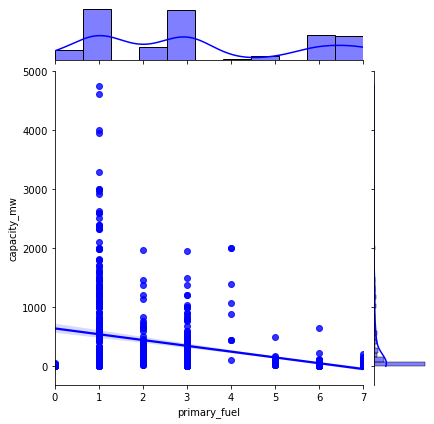

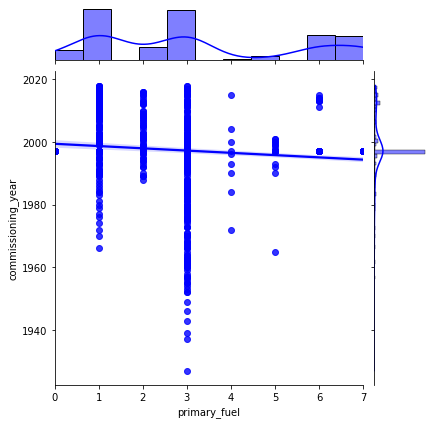

In [33]:
sns.jointplot(data=data, x='primary_fuel', y='capacity_mw', kind='reg',color='blue');
sns.jointplot(data=data, x='primary_fuel', y='commissioning_year', kind='reg',color='blue');

1. Here I can see that as when the 'capacity_mw' increases then, drastic change in the Primary Fuel can be seen. So, I can say that these two are related to each other.
2. Here I can see that as when the 'commissioning_year' increases then slight variation in the Primary Fuel can be seen. So, I can say that these two are related to each other.

v. Relationship between 'primary_fuel' and "source".

vi. Relationship between 'primary_fuel' and "geolocation_source".

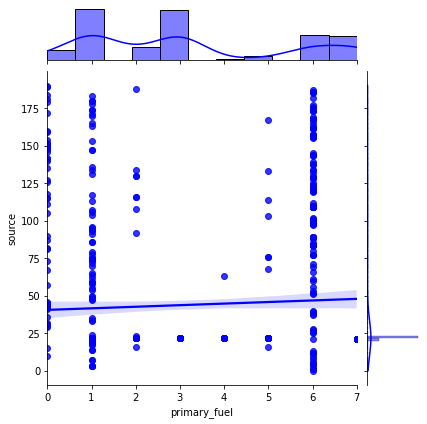

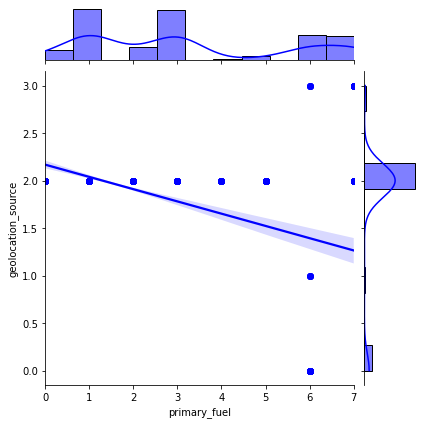

In [34]:
sns.jointplot(data=data, x='primary_fuel', y='source', kind='reg',color='blue');
sns.jointplot(data=data, x='primary_fuel', y='geolocation_source', kind='reg',color='blue');

Documentation :-

1. Here I can see that as when the 'source' increases then, slight change in the Primary Fuel can be seen. So, I can say that these two are related to each other.
2. Here I can see that as when the 'geolocation_source' increases then, drastic change in the Primary Fuel can be seen. So, I can say that these two are related to each other.

vii. Relationship between "primary_fuel" and "year_of_capacity_data".

viii. Relationship between "primary_fuel" and "generation_gwh_2014".

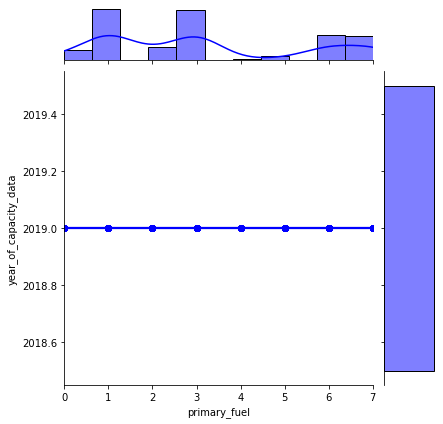

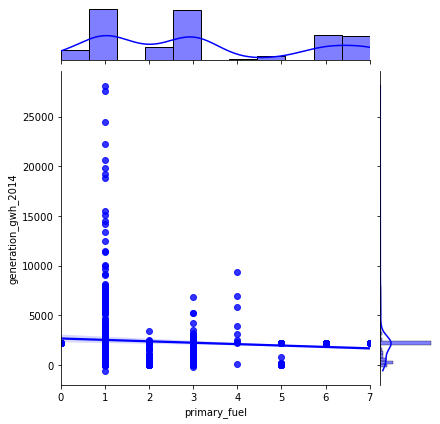

In [35]:
sns.jointplot(data=data, x='primary_fuel', y='year_of_capacity_data', kind='reg',color='blue');
sns.jointplot(data=data, x='primary_fuel', y='generation_gwh_2014', kind='reg',color='blue');

Documentation :-

1. Here I can see that as when the 'year_of_capacity_data' increases then, no change in the Primary Fuel can be seen. So, I can say that these two are not related to each other.
2. Here I can see that as when the 'generation_gwh_2014' increases then, slight change in the Primary Fuel can be seen. So, I can say that these two are related to each other.

ix.   Relationship between "primary_fuel" and "generation_gwh_2015".

x.    Relationship between "primary_fuel" and "generation_gwh_2016".

xi.   Relationship between "primary_fuel" and "generation_gwh_2017".

xii.  Relationship between "primary_fuel" and "generation_gwh_2018".

xiii. Relationship between "primary_fuel" and "generation_data_source".

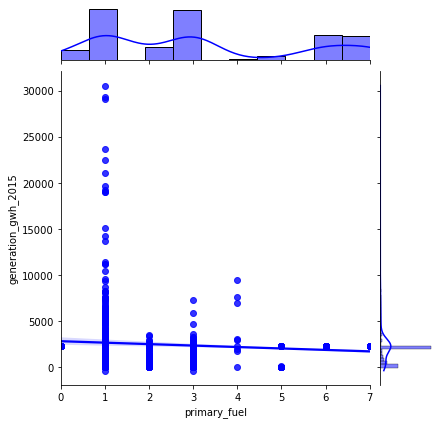

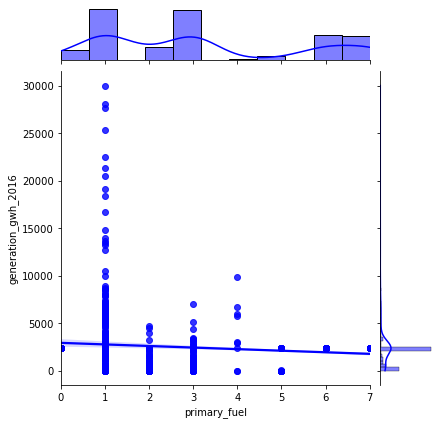

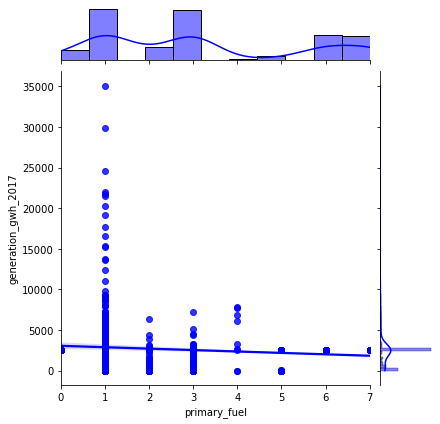

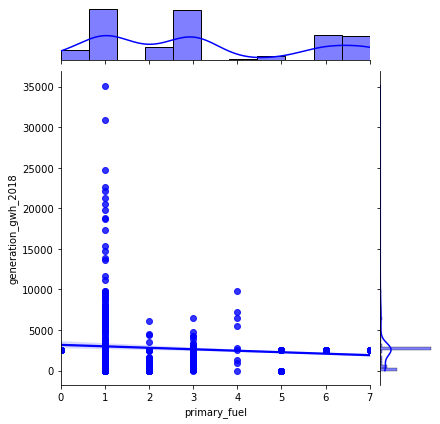

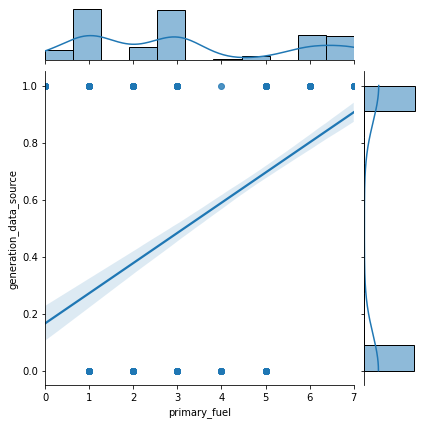

In [36]:
sns.jointplot(data=data, x='primary_fuel', y='generation_gwh_2015', kind='reg',color='blue');
sns.jointplot(data=data, x='primary_fuel', y='generation_gwh_2016', kind='reg',color='blue');
sns.jointplot(data=data, x='primary_fuel', y='generation_gwh_2017', kind='reg',color='blue');
sns.jointplot(data=data, x='primary_fuel', y='generation_gwh_2018', kind='reg',color='blue');
sns.jointplot(data=data, x='primary_fuel', y='generation_data_source', kind='reg');

Documentation :-

1. Here I can see that as when the 'generation_gwh_2015' increases then, slight change in the Primary Fuel can be seen. So, I can say that these two are related to each other.
2. Here I can see that as when the 'generation_gwh_2016' increases then, slight change in the Primary Fuel can be seen. So, I can say that these two are related to each other.
3. Here I can see that as when the 'generation_gwh_2017' increases then, slight change in the Primary Fuel can be seen. So, I can say that these two are related to each other.
4. Here I can see that as when the 'generation_gwh_2018' increases then, slight change in the Primary Fuel can be seen. So, I can say that these two are related to each other.
5. Here I can see that as when the 'generation_data_source' increases then, huge change in the Primary Fuel can be seen. So, I can say that these two are related to each other.

##### 2.  Finding relationships between all the varibales with "capacity_mw":

i.   Relationship between "capacity_mw" and "latitude".

ii.  Relationship between "capacity_mw" and "longitude".

iii. Relationship between "capacity_mw" and "primary_fuel".

iv.  Relationship between "capacity_mw" and "commissioning_year".

v.   Relationship between "capacity_mw" and "source".

vi.  Relationship between "capacity_mw" and "geolocation_source".

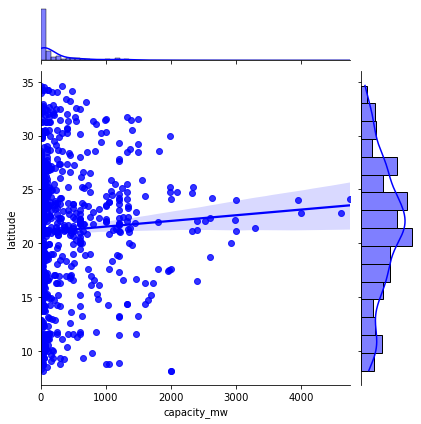

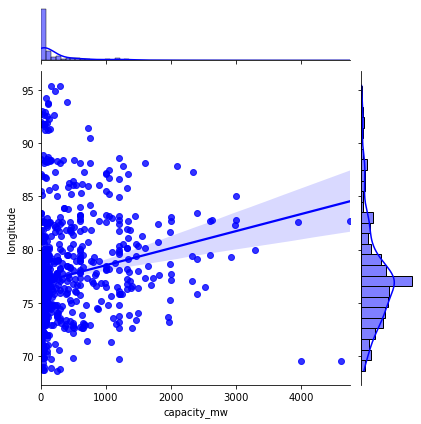

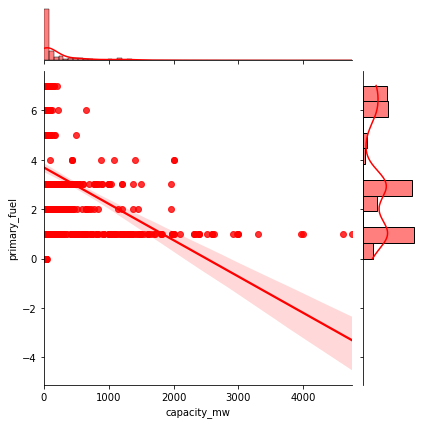

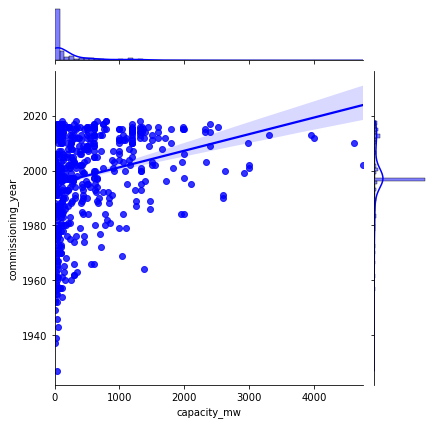

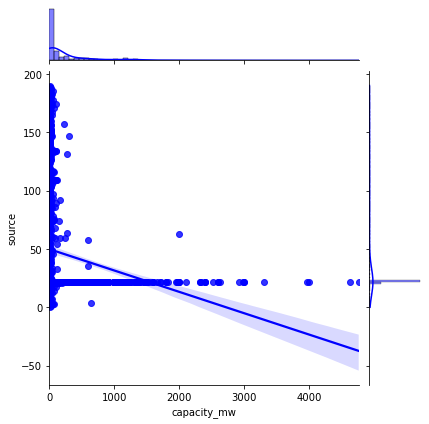

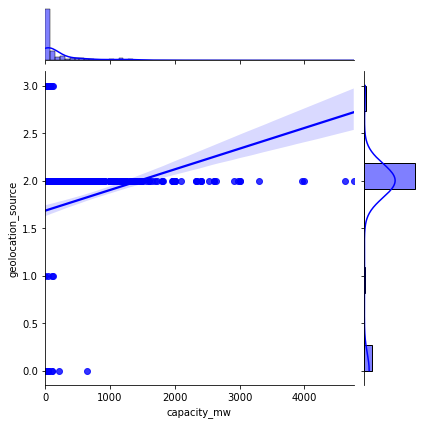

In [37]:
sns.jointplot(data=data, x='capacity_mw', y='latitude', kind='reg',color='blue');
sns.jointplot(data=data, x='capacity_mw', y='longitude', kind='reg',color='blue');
sns.jointplot(data=data, x='capacity_mw', y='primary_fuel', kind='reg',color='red');
sns.jointplot(data=data, x='capacity_mw', y='commissioning_year', kind='reg',color='blue');
sns.jointplot(data=data, x='capacity_mw', y='source', kind='reg',color='blue');
sns.jointplot(data=data, x='capacity_mw', y='geolocation_source', kind='reg',color='blue');

Documentation :-

1. Here I can see that as when the 'latitude' increases then, slight change in the 'capacity_mw' can be seen. So, I can say that these two are related to each other.
2. Here I can see that as when the 'longitude' increases then, huge change in the 'capacity_mw' can be seen. So, I can say that these two are related to each other.
3. Here I can see that as when the 'primary_fuel' increases then, huge decrease in the 'capacity_mw' can be seen. So, I can say that these two are related to each other. (these both are label columns)
4. Here I can see that as when the 'commissioning_year' increases then, increase in the 'capacity_mw'  can be seen. So, I can say that these two are related to each other.
5. Here I can see that as when the 'source' increases then, huge  in the 'capacity_mw' can be seen. So, I can say that these two are related to each other.
6. Here I can see that as when the 'geolocation_source' increases then, huge increase in the 'capacity_mw' can be seen. So, I can say that these two are related to each other.

vii. Relationship between "capacity_mw" and "year_of_capacity_data".

viii. Relationship between "capacity_mw" and "generation_gwh_2014".

ix. Relationship between "capacity_mw" and "generation_gwh_2015".

x. Relationship between "capacity_mw" and "generation_gwh_2016".

xi. Relationship between "capacity_mw" and "generation_gwh_2017".

xii. Relationship between "capacity_mw" and "generation_gwh_2018".

xiii. Relationship between "capacity_mw" and "generation_data_source".

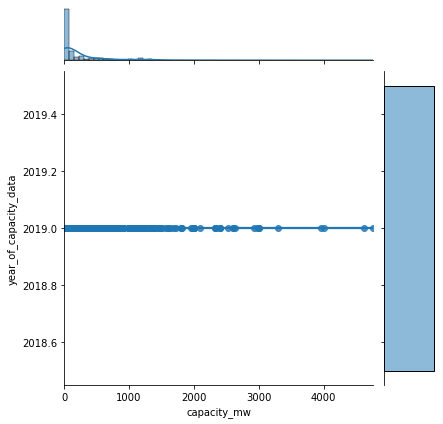

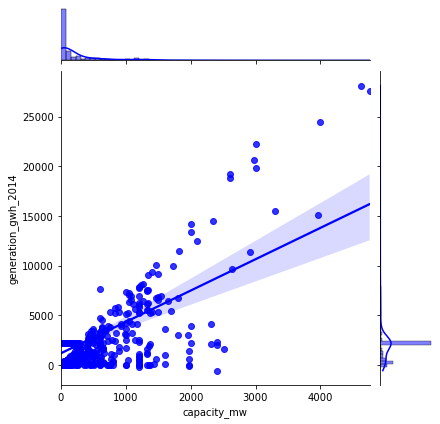

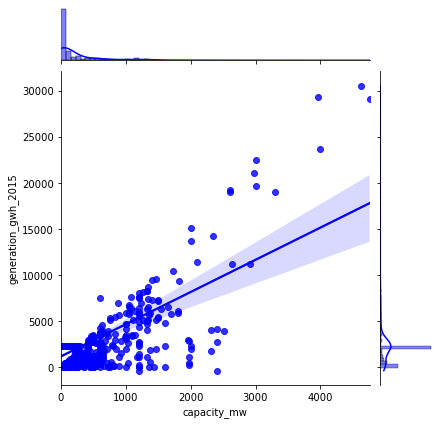

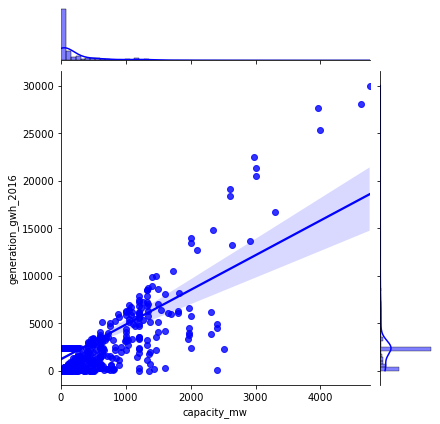

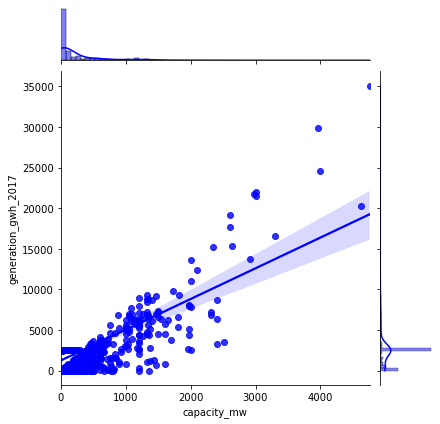

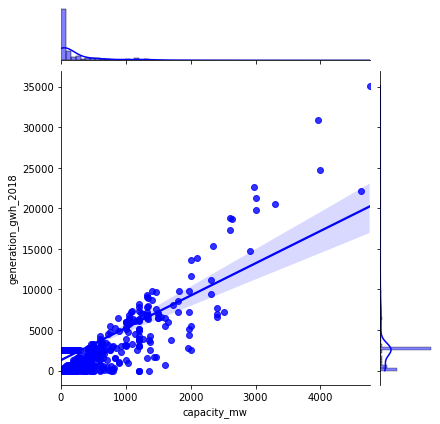

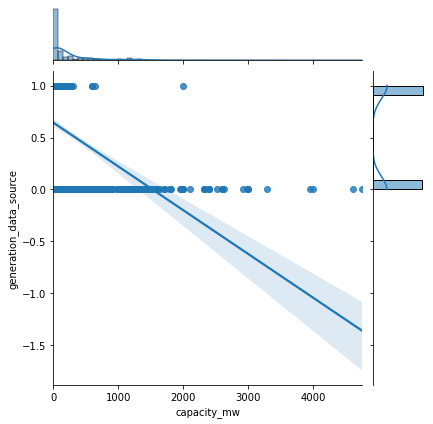

In [38]:
sns.jointplot(data=data, x='capacity_mw', y='year_of_capacity_data', kind='reg');
sns.jointplot(data=data, x='capacity_mw', y='generation_gwh_2014', kind='reg',color='blue');
sns.jointplot(data=data, x='capacity_mw', y='generation_gwh_2015', kind='reg',color='blue');

sns.jointplot(data=data, x='capacity_mw', y='generation_gwh_2016', kind='reg',color='blue');
sns.jointplot(data=data, x='capacity_mw', y='generation_gwh_2017', kind='reg',color='blue');
sns.jointplot(data=data, x='capacity_mw', y='generation_gwh_2018', kind='reg',color='blue');

sns.jointplot(data=data, x='capacity_mw', y='generation_data_source', kind='reg');


Documentation :-

1. Here I can see that as when the 'year_of_capacity_data' increases then, no change in the 'capacity_mw' can be seen. So, I can say that these two are not related to each other.
2. Here I can see that as when the 'generation_gwh_2014' increases then, huge increase in the 'capacity_mw' can be seen. So, I can say that these two are related to each other.
3. Here I can see that as when the 'generation_gwh_2015' increases then, huge increase in the 'capacity_mw' can be seen. So, I can say that these two are related to each other.
4. Here I can see that as when the 'generation_gwh_2016' increases then, huge increase in the 'capacity_mw' can be seen. So, I can say that these two are related to each other.
5. Here I can see that as when the 'generation_gwh_2017' increases then, huge increase in the 'capacity_mw' can be seen. So, I can say that these two are related to each other.
6. Here I can see that as when the 'generation_gwh_2018' increases then, huge increase in the 'capacity_mw' can be seen. So, I can say that these two are related to each other.
7. Here I can see that as when the 'generation_data_source' increases then, huge decrease in the 'capacity_mw' can be seen. So, I can say that these two are related to each other.

### Multivariate Analysis:

Finding Correlation between the variables:

In [39]:
corr_data = data.corr()
corr_data['capacity_mw'].sort_values(ascending = False)

capacity_mw               1.000000
generation_gwh_2018       0.774207
generation_gwh_2017       0.760903
generation_gwh_2016       0.744796
generation_gwh_2015       0.712645
generation_gwh_2014       0.686016
commissioning_year        0.274312
longitude                 0.196086
geolocation_source        0.183419
latitude                  0.051060
source                   -0.242122
primary_fuel             -0.380395
generation_data_source   -0.495833
year_of_capacity_data          NaN
Name: capacity_mw, dtype: float64

In [40]:
corr_data['primary_fuel'].sort_values(ascending = False)

primary_fuel              1.000000
generation_data_source    0.482339
source                    0.053613
latitude                 -0.010051
generation_gwh_2014      -0.119252
generation_gwh_2015      -0.124210
commissioning_year       -0.126681
generation_gwh_2016      -0.130423
generation_gwh_2017      -0.135813
generation_gwh_2018      -0.136560
longitude                -0.347980
capacity_mw              -0.380395
geolocation_source       -0.420263
year_of_capacity_data          NaN
Name: primary_fuel, dtype: float64

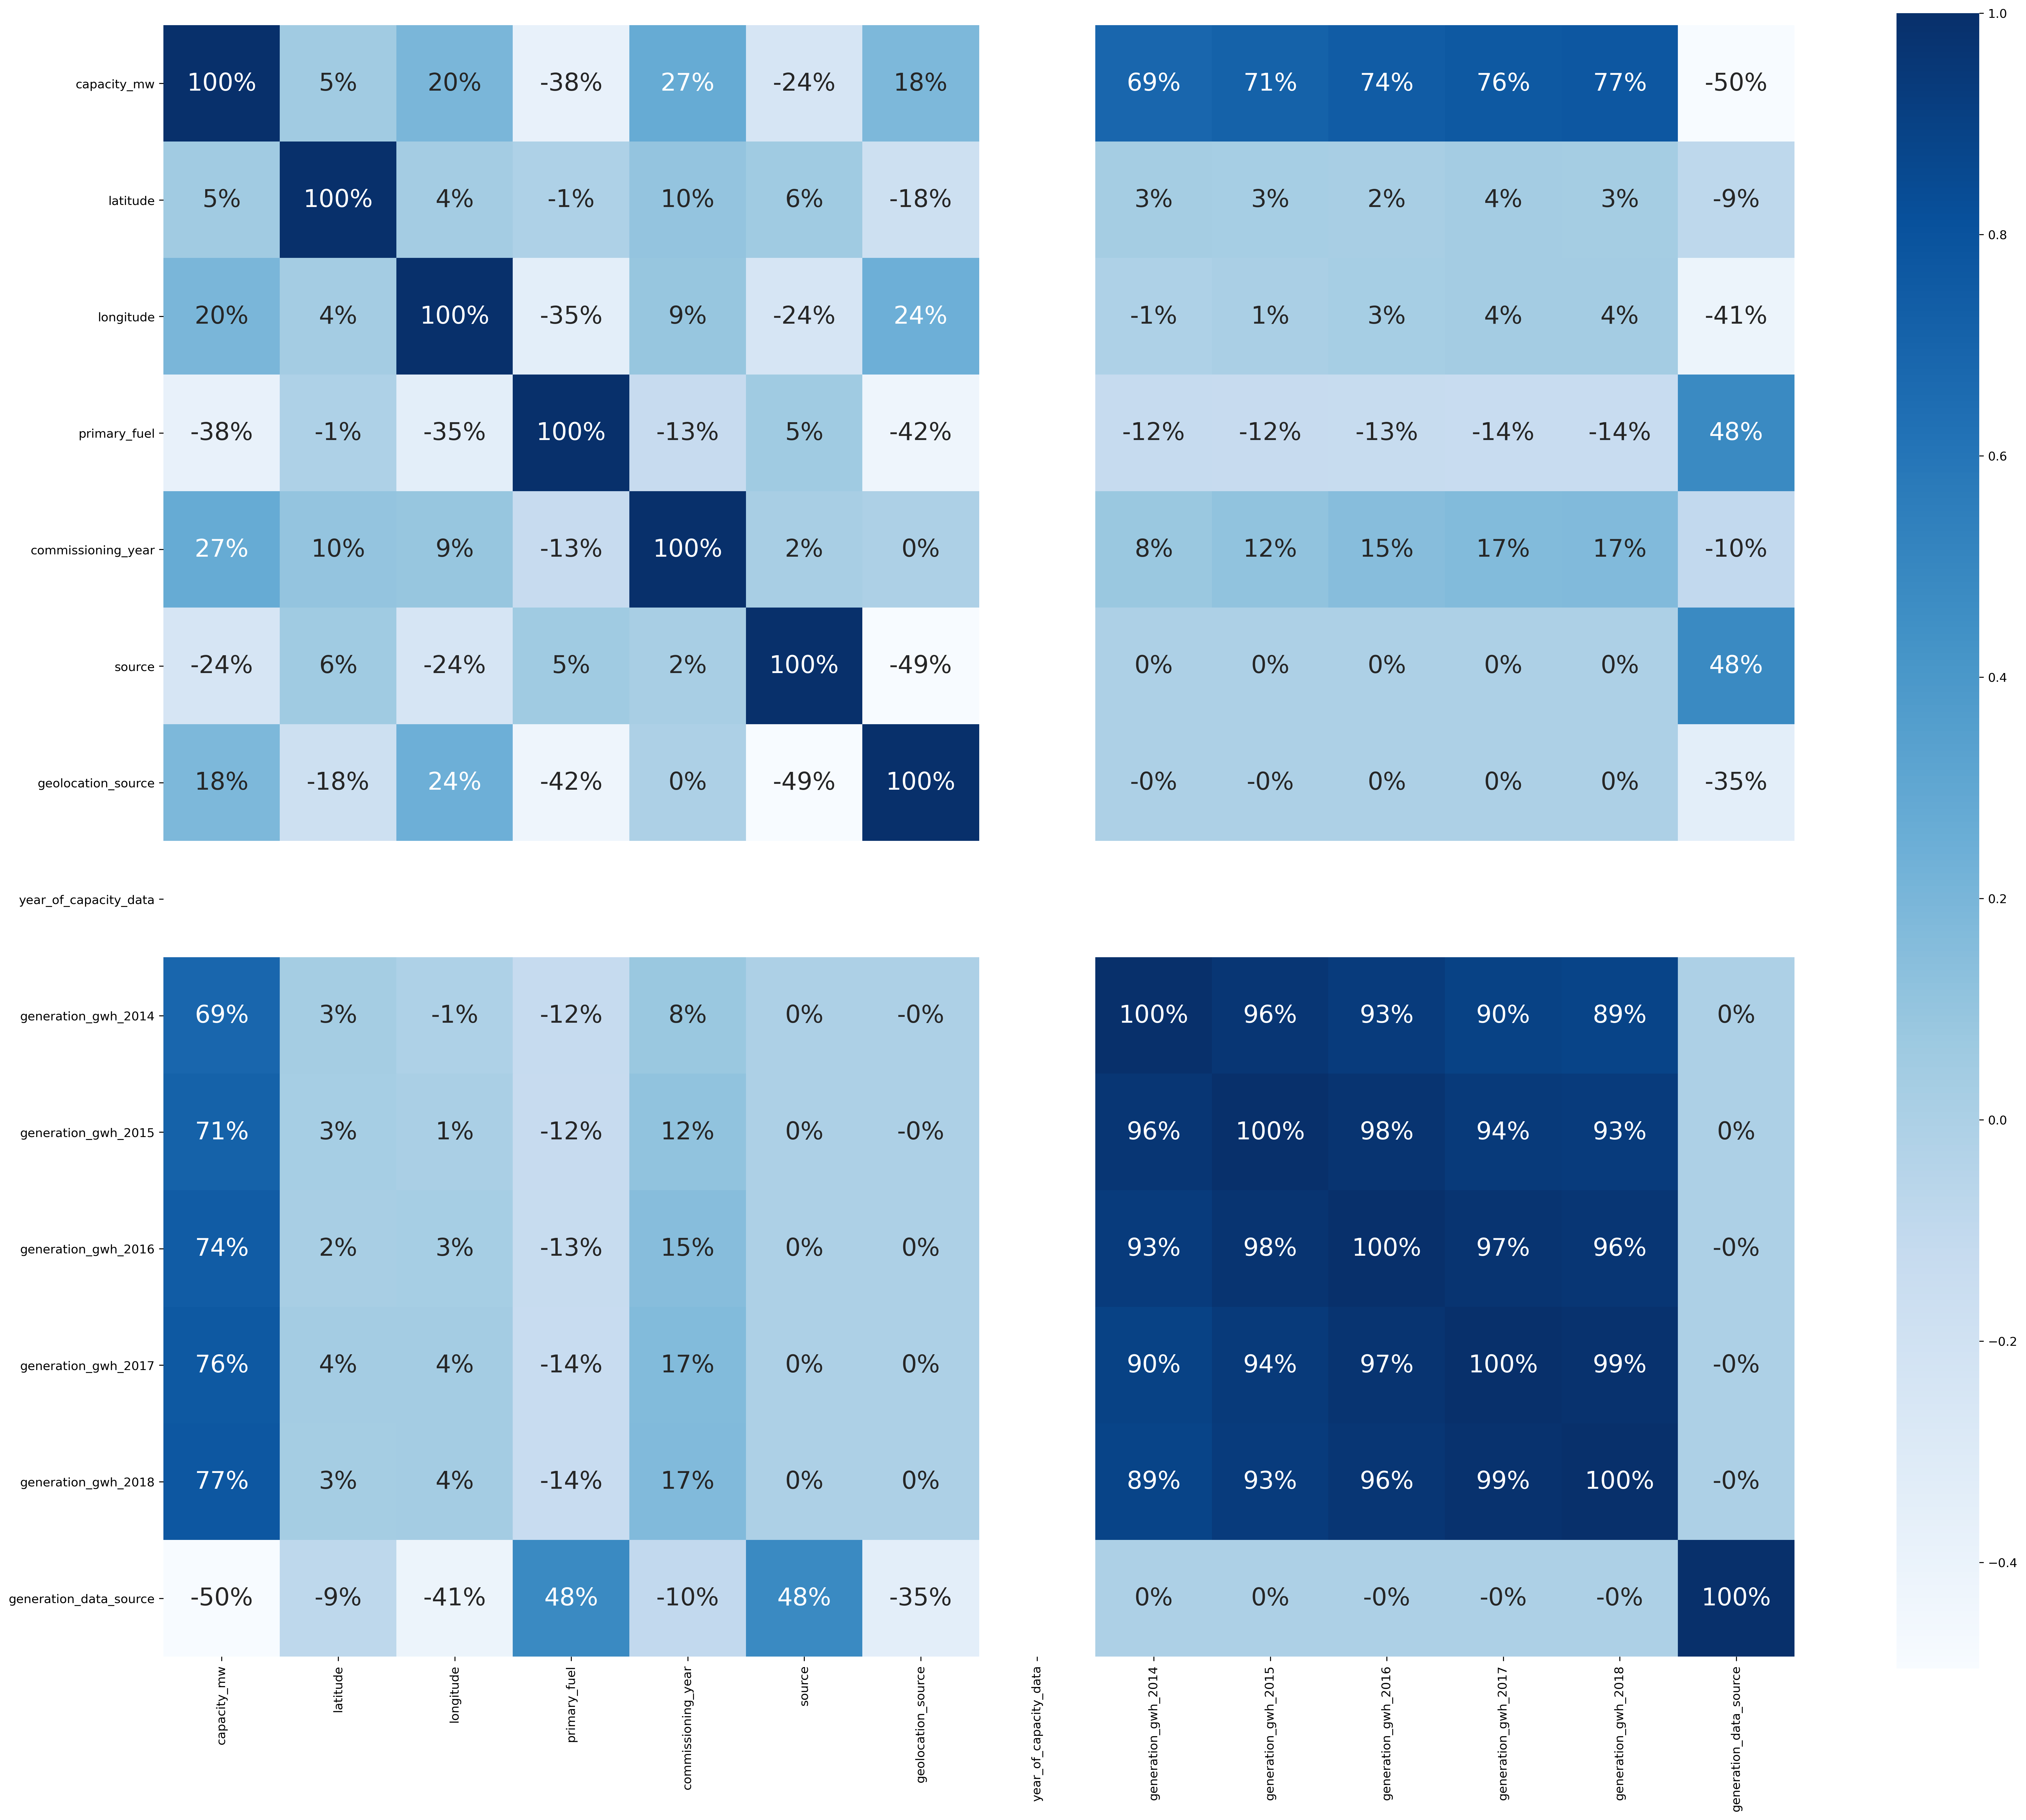

In [41]:
plt.figure(figsize =(30,25),dpi=300)
sns.heatmap(corr_data,annot = True,fmt = ".0%",cbar = True,square = True,annot_kws = {'size': 20}, cmap = 'Blues')
plt.show()

Documentation :-
    
I can see that many of the columns are with high correlation with each other and all these attributes have their own influence on the label and already I have dropped all the unrequired columns and also these columns have skewness including outliers which may affect our model further and so I'll be treating.

### Checking the data discription through statistical analysis of the data:

In [42]:
data.describe()

capacity_mw    latitude   longitude  primary_fuel  commissioning_year  \
count   907.000000  907.000000  907.000000    907.000000          907.000000   
mean    326.223755   21.194946   77.464986      3.206174         1997.090561   
std     590.085456    6.079239    4.812413      2.280652           13.016360   
min       0.000000    8.168900   68.644700      0.000000         1927.000000   
25%      16.725000   17.072000   74.388900      1.000000         1997.088224   
50%      59.200000   21.302700   76.979200      3.000000         1997.089807   
75%     385.250000   25.176450   79.206100      6.000000         2003.000000   
max    4760.000000   34.649000   95.408000      7.000000         2018.000000   

           source  geolocation_source  year_of_capacity_data  \
count  907.000000          907.000000                  907.0   
mean    43.847850            1.754135                 2019.0   
std     44.642818            0.700183                    0.0   
min      0.000000            0.000000                 2019.0   
25%     22.000000            2.000000                 2019.0   
50%     22.000000            2.000000                 2019.0   
75%     29.500000            2.000000                 2019.0   
max    190.000000            3.000000                 2019.0   

       generation_gwh_2014  generation_gwh_2015  generation_gwh_2016  \
count           907.000000           907.000000           907.000000   
mean           2212.554416          2313.541746          2394.975514   
std            2712.390323          2889.398966          2891.180028   
min            -567.806645          -372.615942             0.000000   
25%             634.702665           664.038125           703.619225   
50%            2212.512567          2313.537360          2394.755961   
75%            2213.043995          2313.724098          2395.051676   
max           28127.000000         30539.000000         30015.000000   

       generation_gwh_2017  generation_gwh_2018  generation_data_source  
count           907.000000           907.000000              907.000000  
mean           2497.620994          2594.673067                0.504961  
std            2931.621376          3031.848413                0.500251  
min               0.000000             0.000000                0.000000  
25%             804.900275           810.733240                0.000000  
50%            2497.096910          2594.322822                1.000000  
75%            2497.713676          2594.727663                1.000000  
max           35116.000000         35136.000000                1.000000

Documentation :-
    
1. I can see that there are no null-values in any of the columns

2. I can see that there are few columns which are with the continous data like "generation_gwh" are having mean value more than standard deviation. This is an issue for our model building and so we can drop the columns which are not required for us.

In [43]:
# Previously I have discussed that our column "year_of_capacity_data" is of no use for our model building and so we will drop that column.
data =data.drop(columns = ['year_of_capacity_data'])

In [44]:
data.shape

(907, 13)

In [45]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

### Detection of the outliers:

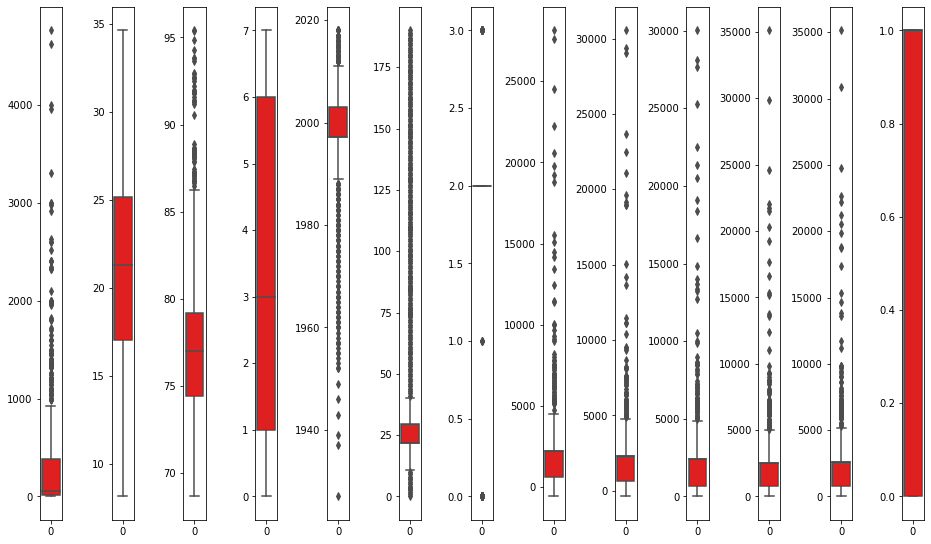

In [46]:
col_list = data.columns.values
ncol = 30
nrows = 12
plt.figure(figsize = (ncol,3*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = data[col_list[i]],color = 'red', orient = 'v')
    plt.tight_layout()

In [47]:
data.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

Documentation :-
    
I can see that most of the columns are having outliers and So, I have to treat them.

### Treating/Removing the outliers:

## Z - Score Method:

In [48]:
feature = data[['capacity_mw']]
feature1 = feature
feature1 = data[['source']]
feature2 = feature1
feature2 = data[['commissioning_year']]
feature3 = feature2
feature3 = data[['generation_gwh_2014']]
feature4 = feature3
feature4 = data[['generation_gwh_2015']]
feature5 = feature4
feature5 = data[['generation_gwh_2016']]
feature6 = feature5
feature6 = data[['generation_gwh_2017']]
feature7 = feature6
feature7 = data[['generation_gwh_2018']]
features = feature7

In [49]:
import scipy as stats
from scipy.stats import zscore

In [50]:
z=np.abs(zscore(features))

data_new = data[(z<1.5).all(axis = 1)]
data_new

capacity_mw  latitude  longitude  primary_fuel  commissioning_year  \
0            2.5   28.1839    73.2407           6.0         2011.000000   
1           98.0   24.7663    74.6090           1.0         1997.090003   
2           39.2   21.9038    69.3732           7.0         1997.088306   
3          135.0   23.8712    91.3602           2.0         2004.000000   
5          250.0   23.7689    68.6447           1.0         2005.000000   
..           ...       ...        ...           ...                 ...   
902       1600.0   16.2949    77.3568           1.0         2016.000000   
903          3.0   12.8932    78.1654           6.0         1997.090167   
904         25.5   15.2758    75.5811           7.0         1997.089601   
905         80.0   24.3500    73.7477           1.0         1997.089728   
906         16.5    9.9344    77.4768           7.0         1997.089759   

     source  geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0     109.0                 1.0          2210.048831          2313.913869   
1     174.0                 2.0          2212.826566          2313.645184   
2      21.0                 2.0          2213.089546          2313.792701   
3      22.0                 2.0           617.789264           843.747000   
5      22.0                 2.0          1153.421000          1208.852000   
..      ...                 ...                  ...                  ...   
902    22.0                 2.0           134.190337             0.994875   
903    77.0                 0.0          2212.301373          2313.483035   
904    21.0                 2.0          2212.526373          2313.572863   
905    59.0                 2.0          2212.871196          2313.669696   
906    21.0                 2.0          2212.271191          2313.490858   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0            2398.768784          2503.893113          2601.690646   
1            2394.835496          2497.677403          2594.622723   
2            2394.686900          2497.052518          2594.192311   
3             886.004428           663.774500           626.239128   
5            1175.765000          1147.913000           976.655000   
..                   ...                  ...                  ...   
902           233.596650           865.400000           686.500000   
903          2395.095061          2497.032336          2594.418517   
904          2394.978142          2497.017687          2594.342473   
905          2394.810425          2497.578833          2594.553881   
906          2395.105165          2496.750271          2594.269108   

     generation_data_source  
0                       1.0  
1                       1.0  
2                       1.0  
3                       0.0  
5                       0.0  
..                      ...  
902                     0.0  
903                     1.0  
904                     1.0  
905                     1.0  
906                     1.0  

[866 rows x 13 columns]

In [51]:
data.shape

(907, 13)

In [52]:
data_new.shape

(866, 13)

Here I can see some unusefull data have been dropped from the total.

#### Checking the data loss:

In [53]:
loss = (907-838)/907*100
loss

7.6074972436604185

Documentation :-
    
I can see that there is 7.6% data lost which is unaffective so we can continue with our model and we have succeeded in removing most of our outliers.

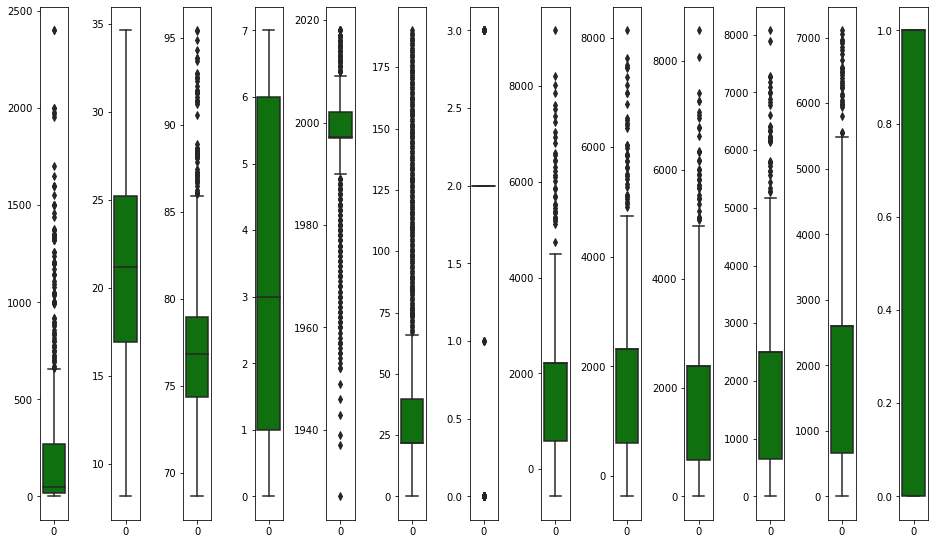

In [54]:
col_list = data_new.columns.values
ncol = 30
nrows = 12
plt.figure(figsize = (ncol,3*ncol))
for i in range (0, len(col_list)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(data = data_new[col_list[i]],color = 'green', orient = 'v')
    plt.tight_layout()

Documentation :-
    
I can see that there are some outliers still left. But, till some extent I have treated them which we can see in certain columns.

#### Checking for skewness:

data_new.skew()

In [55]:
data_new.skew().sort_values()

geolocation_source       -1.846058
commissioning_year       -1.417288
latitude                 -0.134029
generation_data_source   -0.115867
primary_fuel              0.404560
generation_gwh_2018       0.662037
generation_gwh_2017       0.820244
generation_gwh_2016       0.939219
generation_gwh_2015       1.050309
longitude                 1.220969
generation_gwh_2014       1.414444
source                    1.753385
capacity_mw               2.319139
dtype: float64

Documentation :-
    
I can see that there are many columns which are skewed. So, I'm treating them.

#### Removing skewness:

In [56]:
Attribute = ['geolocation_source']
Attribute1 = ['commissioning_year']
Attribute2 = ['longitude']
Attribute3 = ['source']
Attribute4 = ['capacity_mw']
Attribute5 = ['generation_gwh_2015']
Attribute6 = ['generation_gwh_2016']
Attribute7 = ['generation_gwh_2014']
Attribute8 = ['generation_gwh_2017']
Attribute9 = ['generation_gwh_2018']

In [57]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

In [58]:
Attributes = Attribute9 + Attribute8 + Attribute7 + Attribute6 + Attribute5 + Attribute4 + Attribute3 + Attribute2 + Attribute1 + Attribute
Attributes

['generation_gwh_2018',
 'generation_gwh_2017',
 'generation_gwh_2014',
 'generation_gwh_2016',
 'generation_gwh_2015',
 'capacity_mw',
 'source',
 'longitude',
 'commissioning_year',
 'geolocation_source']

In [59]:
data_new[Attributes] = scaler.fit_transform(data_new[Attributes].values)
data_new[Attributes]

generation_gwh_2018  generation_gwh_2017  generation_gwh_2014  \
0               0.475647             0.464141             0.348513   
1               0.471779             0.460697             0.350447   
2               0.471543             0.460351             0.350630   
3              -0.920732            -0.841990            -0.874391   
5              -0.597375            -0.415105            -0.429323   
..                   ...                  ...                  ...   
902            -0.860319            -0.651292            -1.353852   
903             0.471667             0.460340             0.350081   
904             0.471625             0.460332             0.350238   
905             0.471741             0.460643             0.350478   
906             0.471585             0.460183             0.350060   

     generation_gwh_2016  generation_gwh_2015  capacity_mw    source  \
0               0.467110             0.378667    -1.691124  1.540139   
1               0.464849             0.378486     0.283887  1.993680   
2               0.464763             0.378585    -0.227625 -0.484899   
3              -0.593466            -0.701816     0.460550 -0.417894   
5              -0.347931            -0.411366     0.796350 -0.417894   
..                   ...                  ...          ...       ...   
902            -1.354977            -1.571190     1.771786 -0.417894   
903             0.464998             0.378377    -1.608017  1.170420   
904             0.464931             0.378437    -0.469276 -0.484899   
905             0.464834             0.378502     0.171294  0.867117   
906             0.465004             0.378382    -0.713185 -0.484899   

     longitude  commissioning_year  geolocation_source  
0    -0.932693            1.300578           -1.503971  
1    -0.517735           -0.116355            0.254854  
2    -2.403637           -0.116502            0.254854  
3     2.168016            0.531235            0.254854  
5    -2.740755            0.633744            0.254854  
..         ...                 ...                 ...  
902   0.187322            1.930472            0.254854  
903   0.366876           -0.116341           -2.111971  
904  -0.250160           -0.116390            0.254854  
905  -0.773398           -0.116379            0.254854  
906   0.214698           -0.116376            0.254854  

[866 rows x 10 columns]

In [60]:
data_new.skew().sort_values()

generation_gwh_2018      -0.484558
generation_gwh_2017      -0.448149
generation_gwh_2016      -0.402621
source                   -0.182141
latitude                 -0.134029
generation_data_source   -0.115867
commissioning_year       -0.077500
geolocation_source       -0.060978
longitude                 0.000151
capacity_mw               0.017404
generation_gwh_2015       0.126102
generation_gwh_2014       0.357726
primary_fuel              0.404560
dtype: float64

Documentation :-

Here I have treated the skewness as the values are largely varied from before and now values reduced.

#### Data Preprocessing :
##### i. Classification :- 

## Separating the independent and target variables:

In [61]:
data_new.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source',
       'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016',
       'generation_gwh_2017', 'generation_gwh_2018', 'generation_data_source'],
      dtype='object')

In [62]:
X = data_new.drop("primary_fuel", axis=1)
y = data_new["primary_fuel"]

In [63]:
X

capacity_mw  latitude  longitude  commissioning_year    source  \
0      -1.691124   28.1839  -0.932693            1.300578  1.540139   
1       0.283887   24.7663  -0.517735           -0.116355  1.993680   
2      -0.227625   21.9038  -2.403637           -0.116502 -0.484899   
3       0.460550   23.8712   2.168016            0.531235 -0.417894   
5       0.796350   23.7689  -2.740755            0.633744 -0.417894   
..           ...       ...        ...                 ...       ...   
902     1.771786   16.2949   0.187322            1.930472 -0.417894   
903    -1.608017   12.8932   0.366876           -0.116341  1.170420   
904    -0.469276   15.2758  -0.250160           -0.116390 -0.484899   
905     0.171294   24.3500  -0.773398           -0.116379  0.867117   
906    -0.713185    9.9344   0.214698           -0.116376 -0.484899   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0             -1.503971             0.348513             0.378667   
1              0.254854             0.350447             0.378486   
2              0.254854             0.350630             0.378585   
3              0.254854            -0.874391            -0.701816   
5              0.254854            -0.429323            -0.411366   
..                  ...                  ...                  ...   
902            0.254854            -1.353852            -1.571190   
903           -2.111971             0.350081             0.378377   
904            0.254854             0.350238             0.378437   
905            0.254854             0.350478             0.378502   
906            0.254854             0.350060             0.378382   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0               0.467110             0.464141             0.475647   
1               0.464849             0.460697             0.471779   
2               0.464763             0.460351             0.471543   
3              -0.593466            -0.841990            -0.920732   
5              -0.347931            -0.415105            -0.597375   
..                   ...                  ...                  ...   
902            -1.354977            -0.651292            -0.860319   
903             0.464998             0.460340             0.471667   
904             0.464931             0.460332             0.471625   
905             0.464834             0.460643             0.471741   
906             0.465004             0.460183             0.471585   

     generation_data_source  
0                       1.0  
1                       1.0  
2                       1.0  
3                       0.0  
5                       0.0  
..                      ...  
902                     0.0  
903                     1.0  
904                     1.0  
905                     1.0  
906                     1.0  

[866 rows x 12 columns]

In [64]:
y

0      6.0
1      1.0
2      7.0
3      2.0
5      1.0
      ... 
902    1.0
903    6.0
904    7.0
905    1.0
906    7.0
Name: primary_fuel, Length: 866, dtype: float64

#### Scaling the data using the standard scaler :

In [65]:
from sklearn.preprocessing import  StandardScaler

In [66]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X_scaled

capacity_mw  latitude  longitude  commissioning_year    source  \
0      -1.691124  1.141351  -0.932694            1.300578  1.540139   
1       0.283887  0.586196  -0.517735           -0.116355  1.993680   
2      -0.227625  0.121211  -2.403637           -0.116502 -0.484899   
3       0.460550  0.440795   2.168016            0.531235 -0.417894   
4       0.796350  0.424178  -2.740755            0.633744 -0.417894   
..           ...       ...        ...                 ...       ...   
861     1.771786 -0.789899   0.187322            1.930472 -0.417894   
862    -1.608017 -1.342472   0.366876           -0.116341  1.170420   
863    -0.469276 -0.955442  -0.250160           -0.116390 -0.484899   
864     0.171294  0.518572  -0.773399           -0.116379  0.867117   
865    -0.713185 -1.823100   0.214697           -0.116376 -0.484899   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0             -1.503971             0.348513             0.378667   
1              0.254854             0.350447             0.378486   
2              0.254854             0.350630             0.378585   
3              0.254854            -0.874391            -0.701816   
4              0.254854            -0.429323            -0.411366   
..                  ...                  ...                  ...   
861            0.254854            -1.353852            -1.571190   
862           -2.111971             0.350081             0.378377   
863            0.254854             0.350238             0.378437   
864            0.254854             0.350478             0.378502   
865            0.254854             0.350060             0.378382   

     generation_gwh_2016  generation_gwh_2017  generation_gwh_2018  \
0               0.467110             0.464141             0.475647   
1               0.464849             0.460697             0.471779   
2               0.464763             0.460351             0.471543   
3              -0.593466            -0.841990            -0.920732   
4              -0.347931            -0.415105            -0.597375   
..                   ...                  ...                  ...   
861            -1.354977            -0.651292            -0.860319   
862             0.464998             0.460340             0.471667   
863             0.464931             0.460332             0.471625   
864             0.464834             0.460643             0.471741   
865             0.465004             0.460183             0.471585   

     generation_data_source  
0                  0.943838  
1                  0.943838  
2                  0.943838  
3                 -1.059504  
4                 -1.059504  
..                      ...  
861               -1.059504  
862                0.943838  
863                0.943838  
864                0.943838  
865                0.943838  

[866 rows x 12 columns]

#### Checking the multicollinearity through VIF:

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
vif = pd.DataFrame()
vif["features"] = X.columns
vif["vif_Factor"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]
vif

features  vif_Factor
0              capacity_mw    3.763232
1                 latitude    1.071294
2                longitude    1.294476
3       commissioning_year    1.200085
4                   source    1.282671
5       geolocation_source    1.335455
6      generation_gwh_2014    7.513004
7      generation_gwh_2015   13.547133
8      generation_gwh_2016   21.968560
9      generation_gwh_2017   35.191018
10     generation_gwh_2018   21.430698
11  generation_data_source    5.110200

Documentation :-

I can see that there are few columns which have VIF values >10 and I can also see that the columns with names "generation_gwh_2015" and "generation_gwh_2016" have almost equal VIF value and their correlation percentage are also almost equal so I can drop any of the columns.

In [70]:
X_scaled.shape

(866, 11)

In [69]:
X_scaled = X_scaled.drop("generation_gwh_2016", axis=1)

In [71]:
X_scaled

capacity_mw  latitude  longitude  commissioning_year    source  \
0      -1.691124  1.141351  -0.932694            1.300578  1.540139   
1       0.283887  0.586196  -0.517735           -0.116355  1.993680   
2      -0.227625  0.121211  -2.403637           -0.116502 -0.484899   
3       0.460550  0.440795   2.168016            0.531235 -0.417894   
4       0.796350  0.424178  -2.740755            0.633744 -0.417894   
..           ...       ...        ...                 ...       ...   
861     1.771786 -0.789899   0.187322            1.930472 -0.417894   
862    -1.608017 -1.342472   0.366876           -0.116341  1.170420   
863    -0.469276 -0.955442  -0.250160           -0.116390 -0.484899   
864     0.171294  0.518572  -0.773399           -0.116379  0.867117   
865    -0.713185 -1.823100   0.214697           -0.116376 -0.484899   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0             -1.503971             0.348513             0.378667   
1              0.254854             0.350447             0.378486   
2              0.254854             0.350630             0.378585   
3              0.254854            -0.874391            -0.701816   
4              0.254854            -0.429323            -0.411366   
..                  ...                  ...                  ...   
861            0.254854            -1.353852            -1.571190   
862           -2.111971             0.350081             0.378377   
863            0.254854             0.350238             0.378437   
864            0.254854             0.350478             0.378502   
865            0.254854             0.350060             0.378382   

     generation_gwh_2017  generation_gwh_2018  generation_data_source  
0               0.464141             0.475647                0.943838  
1               0.460697             0.471779                0.943838  
2               0.460351             0.471543                0.943838  
3              -0.841990            -0.920732               -1.059504  
4              -0.415105            -0.597375               -1.059504  
..                   ...                  ...                     ...  
861            -0.651292            -0.860319               -1.059504  
862             0.460340             0.471667                0.943838  
863             0.460332             0.471625                0.943838  
864             0.460643             0.471741                0.943838  
865             0.460183             0.471585                0.943838  

[866 rows x 11 columns]

In [72]:
y

0      6.0
1      1.0
2      7.0
3      2.0
5      1.0
      ... 
902    1.0
903    6.0
904    7.0
905    1.0
906    7.0
Name: primary_fuel, Length: 866, dtype: float64

#### Model Building:

Train_Test_Split:

In [73]:
from sklearn.model_selection import  train_test_split, cross_val_score

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [75]:
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import  RandomForestClassifier , GradientBoostingClassifier

Here, I will use "forloop" for models to get trained in one flow.

#### Training:

In [76]:
models = {"LogisticRegression" : LogisticRegression(),
          "K-Nearest Neighbors": KNeighborsClassifier(),
          "Decision Tree"      : DecisionTreeClassifier(),
          "Random Forest"      : RandomForestClassifier(),
          "Gradient Boosting"  : GradientBoostingClassifier()}

for name, model in models.items():
    model.fit(X_train,y_train)
    print(name + " is trained now.")

LogisticRegression is trained now.
K-Nearest Neighbors is trained now.
Decision Tree is trained now.
Random Forest is trained now.
Gradient Boosting is trained now.


#### Testing:

In [77]:
for name, model in models.items():
    print(name + ": {:,.2f}%".format(model.score(X_test,y_test)*100))

LogisticRegression: 70.38%
K-Nearest Neighbors: 74.23%
Decision Tree: 79.62%
Random Forest: 83.08%
Gradient Boosting: 84.62%


Documentation :-
    
I can see that "Gradient Boosting" model is with good percentage(84.62%) among the other models , so I can select this model for hyper parameter tuning.

#### Hyperparameter tuning:
##### GridSearch CV:

In [78]:
from sklearn.model_selection import GridSearchCV

In [79]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,20],
             'max_depth':[2,4,6]}

#### Hyperparameter tuning for "Gradient Boosting Classifier":

In [80]:
GCV=GridSearchCV(GradientBoostingClassifier(),parameters,cv=5)

In [81]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [82]:
parameters = {'criterion': ['mse','mae'], 'max_features': ['auto', 'sqrt', 'log2']}

GradientBoosting = GradientBoostingClassifier()
Classifier = GridSearchCV(GradientBoosting,parameters)
Classifier.fit(X_train,y_train)

print(Classifier.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


Documentation :-
    
I can see that our best parameters are selected and now I will use these in our testing

In [83]:
GradientBoosting = GradientBoostingClassifier(criterion = 'mse', max_features = 'auto')
GradientBoosting.fit(X_train,y_train)
GradientBoosting.score(X_train,y_train)

pred_decision = GradientBoosting.predict(X_test)
GradientBoostingS = r2_score(y_test,pred_decision)
print('R2 Score:', GradientBoostingS*100)

GradientBoostingScore = cross_val_score(GradientBoosting,X,y,cv = 5)
GradientBoostingC = GradientBoostingScore.mean()
print("Cross Val Score:",GradientBoostingC*100)

R2 Score: 88.26236800669463
Cross Val Score: 86.26137798152946


Here, my model is with R2 Score as 88.262% and CV Score as 86.261% .

In [84]:
conclusion = pd.DataFrame([GradientBoosting.predict(X_test)[:],pred_decision[:]],index = ["Predicted","Original"])
conclusion

0    1    2    3    4    5    6    7    8    9    ...  250  251  \
Predicted  6.0  5.0  6.0  3.0  3.0  7.0  1.0  0.0  3.0  2.0  ...  0.0  0.0   
Original   6.0  5.0  6.0  3.0  3.0  7.0  1.0  0.0  3.0  2.0  ...  0.0  0.0   

           252  253  254  255  256  257  258  259  
Predicted  3.0  6.0  1.0  7.0  1.0  6.0  7.0  6.0  
Original   3.0  6.0  1.0  7.0  1.0  6.0  7.0  6.0  

[2 rows x 260 columns]

##### ii. Regression: 

In [85]:
X_scaled

capacity_mw  latitude  longitude  commissioning_year    source  \
0      -1.691124  1.141351  -0.932694            1.300578  1.540139   
1       0.283887  0.586196  -0.517735           -0.116355  1.993680   
2      -0.227625  0.121211  -2.403637           -0.116502 -0.484899   
3       0.460550  0.440795   2.168016            0.531235 -0.417894   
4       0.796350  0.424178  -2.740755            0.633744 -0.417894   
..           ...       ...        ...                 ...       ...   
861     1.771786 -0.789899   0.187322            1.930472 -0.417894   
862    -1.608017 -1.342472   0.366876           -0.116341  1.170420   
863    -0.469276 -0.955442  -0.250160           -0.116390 -0.484899   
864     0.171294  0.518572  -0.773399           -0.116379  0.867117   
865    -0.713185 -1.823100   0.214697           -0.116376 -0.484899   

     geolocation_source  generation_gwh_2014  generation_gwh_2015  \
0             -1.503971             0.348513             0.378667   
1              0.254854             0.350447             0.378486   
2              0.254854             0.350630             0.378585   
3              0.254854            -0.874391            -0.701816   
4              0.254854            -0.429323            -0.411366   
..                  ...                  ...                  ...   
861            0.254854            -1.353852            -1.571190   
862           -2.111971             0.350081             0.378377   
863            0.254854             0.350238             0.378437   
864            0.254854             0.350478             0.378502   
865            0.254854             0.350060             0.378382   

     generation_gwh_2017  generation_gwh_2018  generation_data_source  
0               0.464141             0.475647                0.943838  
1               0.460697             0.471779                0.943838  
2               0.460351             0.471543                0.943838  
3              -0.841990            -0.920732               -1.059504  
4              -0.415105            -0.597375               -1.059504  
..                   ...                  ...                     ...  
861            -0.651292            -0.860319               -1.059504  
862             0.460340             0.471667                0.943838  
863             0.460332             0.471625                0.943838  
864             0.460643             0.471741                0.943838  
865             0.460183             0.471585                0.943838  

[866 rows x 11 columns]

#### Separating the independent and target variables for Regression :

In [86]:
X_reg = X_scaled.drop("capacity_mw", axis = 1)
y_reg = X_scaled["capacity_mw"]

#### Checking the random_state:

In [87]:
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.svm import SVR

In [88]:
maxAccu=0
maxRS=0
for i in range(1,300):
    X_reg_train,X_reg_test,y_reg_train,y_reg_test = train_test_split(X_reg,y_reg,test_size=.30, random_state=i)
    mod = LinearRegression()
    mod.fit(X_reg_train, y_reg_train)
    pred = mod.predict(X_reg_test)
    acc=r2_score(y_reg_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2 score is ",maxAccu," on Random_state ",maxRS)

Maximum r2 score is  0.7899366758205306  on Random_state  111


Documentation :-
    
I can see that we have the maximum r2 Score is 78.993% at the random_state  = 111

In [89]:
X_reg_train,X_reg_test,y_reg_train,y_reg_test=train_test_split(X_reg,y_reg,test_size=.30,random_state=maxRS)

Documentation :-
    
I can see that the data is into 70% training and 30% testing.

#### Linear Rgeression:

In [90]:
# Checking r2score for Linear Regression
LR = LinearRegression()
LR.fit(X_reg_train,y_reg_train)

# prediction
predLR=LR.predict(X_reg_test)
print('R2_score:',metrics.r2_score(y_reg_test,predLR))

R2_score: 0.7899366758205306


Documentation :-
    
The R2 Score in Linear Regression is 78.993%

In [91]:
# Mean Absolute Error (MAE)

print(metrics.mean_absolute_error(y_reg_test, predLR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_reg_test, predLR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_reg_test, predLR)))

0.3626945146211155
0.2156700822582286
0.46440293093199636


#### RandomForest Regressor:

In [92]:
# Checking R2 score for Random Forest Regressor:

RFR=RandomForestRegressor()
RFR.fit(X_reg_train,y_reg_train)

# prediction
predRFR=RFR.predict(X_reg_test)
print('R2_Score:',metrics.r2_score(y_reg_test,predRFR))

R2_Score: 0.8146221419923393


Documentation :-
    
I can see that accuracy R2 Score is 81.462%

In [93]:
# Mean Absolute Error (MAE)

print(metrics.mean_absolute_error(y_reg_test, predRFR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_reg_test, predRFR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_reg_test, predRFR)))

0.3234085143804573
0.19032574125699708
0.4362633851894943


#### Decision tree Regressor:

In [94]:
# Checking R2 score for Decision Tree Regressor
DTR=DecisionTreeRegressor()
DTR.fit(X_reg_train,y_reg_train)

# prediction
predDTR=DTR.predict(X_reg_test)
print('R2_Score:',metrics.r2_score(y_reg_test,predDTR))

R2_Score: 0.5847080935346238


Documentation :-
    
I can see that accuracy R2 Score is 58.47%

In [95]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_reg_test, predDTR))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_reg_test, predDTR))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_reg_test, predDTR)))

0.46561441067825715
0.426376379496131
0.6529750221073781


#### KNN Regressor:

In [96]:
# Checking R2 score for KNN regressor

knn=KNN()
knn.fit(X_reg_train,y_reg_train)

#prediction
predknn=knn.predict(X_reg_test)
print('R2_Score:',metrics.r2_score(y_reg_test,predknn))

R2_Score: 0.7644018744808834


In [97]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_reg_test, predknn))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_reg_test, predknn))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_reg_test, predknn)))

0.36081058448606407
0.24188642786201514
0.49181950740288366


Documentation :-
    
I can see that accuracy R2 Score is 76.44%

#### Support Vector regressor:

In [98]:
# Checking R2 score for SVR regressor
svr=SVR()
svr.fit(X_reg_train,y_reg_train)

#prediction
predsvr=svr.predict(X_reg_test)
print('R2_Score:',metrics.r2_score(y_reg_test,predsvr))

R2_Score: 0.8112414543984068


In [99]:
# Mean Absolute Error (MAE)
print(metrics.mean_absolute_error(y_reg_test, predsvr))

# Mean Squared Error (MSE)
print(metrics.mean_squared_error(y_reg_test, predsvr))

# Root Mean Squared Error (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_reg_test, predsvr)))

0.32004183056650615
0.1937966621058449
0.44022342294094813


Documentation :-
    
I can see that accuracy R2 Score is 81.12%

#### Checking the Cross Validation Score :

In [101]:
# Checking cv score for Linear Regression
print(cross_val_score(LR,X_reg,y_reg,cv=10).mean())

0.7217596672312157


In [102]:
# Checking cv score for Random Forest Regression
print(cross_val_score(RFR,X_reg,y_reg,cv=5).mean())

0.7704059511777055


In [103]:
# Checking cv score for Decision Tree Regression
print(cross_val_score(DTR,X_reg,y_reg,cv=5).mean())

0.6196074299240802


In [104]:
# Checking cv score for KNN Regression
print(cross_val_score(knn,X_reg,y_reg,cv=5).mean())

0.7343771083907319


In [105]:
# Checking cv score for SVR Regression
print(cross_val_score(svr,X_reg,y_reg,cv=5).mean())

0.7530613548533789


I can see that the CV Score is highest for "Random Forest Regressor" and so I can take this model for 
Regularization.

#### Hyper parameter tuning:

In [106]:
from sklearn.model_selection import GridSearchCV

In [107]:
parameters = {'criterion':['mse', 'mae'],
             'max_features':['auto', 'sqrt', 'log2'],
             'n_estimators':[0,20],
             'max_depth':[2,4,6]}

In [108]:
GCV=GridSearchCV(RandomForestRegressor(),parameters,cv=5)

In [109]:
GCV.fit(X_reg_train,y_reg_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': [2, 4, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [0, 20]})

In [110]:
print (" variance : ", GCV.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((GCV.predict(X_reg_test) - y_reg_test) ** 2))

 variance :  0.7520572889309276
Residual sum of squares: 0.19


Documentation :-

I can observe that our model accuracy was 81.46% before then after cross validation it got to 77.04% and now after hyper parameter tuning it has become 75.20% but even then our model is with good accuracy .

#### Conclusion:

In [111]:
a = np.array(y_reg_test)
predicted = np.array(RFR.predict(X_reg_test))
data_new_com = pd.DataFrame({"original":a, "predicted": predicted}, index = range(len(a)))
data_new_com

original  predicted
0   -0.766295  -1.332258
1    0.675393  -0.593510
2   -1.469945  -0.875395
3    1.530115   1.632248
4   -1.357875  -1.134310
..        ...        ...
255 -0.539559  -0.997838
256 -1.357875  -1.794591
257  1.692836   1.303778
258 -0.291295  -0.212411
259 -0.605607  -0.928666

[260 rows x 2 columns]

#### Saving the model:

In [112]:
import pickle
filename='Global_data.pkl'
pickle.dump(RandomForestRegressor,open(filename,'wb'))